# Tumour Grading Project (3D classification) - Shiza Charania
To check out the steps I went through for this project: (https://shizacharania.notion.site/UHN-Probabilistic-Brain-Tumour-Mapping-Project-de63cccf5a5e4c6f9f6581aad70ad428)

In [54]:
# getting the dataset from my google drive
# !gdown --id 1Sh8GVag7_6Hf99DEuMqcEOjCfMInZe1L

In [55]:
"""
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=8888 --no-browser \
  --NotebookApp.port_retries=0
"""

"\njupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com'   --port=8888 --no-browser   --NotebookApp.port_retries=0\n"

### getting data from [REMBRANDT](https://wiki.cancerimagingarchive.net/display/Public/REMBRANDT) dataset

In [56]:
# unzipping all the NiFTI files
# !unzip /content/skullstripped_T1CE_nifti_tumour_grading.zip
# !unzip /Users/Administrator/Desktop/tumour_grading.zip

In [57]:
# getting the file paths for gr2 images, gr3 images, and gr4 images - examples:
# /Users/Administrator/Desktop/tumour_grading
# grade 2: /content/skullstripped_T1CE_nifti_tumour_grading/grade2/grade2_AXIAL_T1_GD_10_brain.nii
# grade 3: /content/skullstripped_T1CE_nifti_tumour_grading/grade3/grade3_AXIAL_T1_GD_10_brain.nii
# grade 4: /content/skullstripped_T1CE_nifti_tumour_grading/grade4/grade4_AXIAL_PRE_GD_5_brain.nii

In [58]:
import os # this library will help get the file path

# roots of the file path of different tumour grades
grade2_rootpath = "/Users/Administrator/Desktop/tumour_grading/grade2"
grade3_rootpath = "/Users/Administrator/Desktop/tumour_grading/grade3"
grade4_rootpath = "/Users/Administrator/Desktop/tumour_grading/grade4"

# finds all the files with the designated root path parameter
grade2_filepaths = os.listdir(grade2_rootpath)
grade3_filepaths = os.listdir(grade3_rootpath)
grade4_filepaths = os.listdir(grade4_rootpath)

# there's an extra item that is in the list, so remove it
grade2_filepaths.remove('.DS_Store')
grade3_filepaths.remove('.DS_Store')
grade4_filepaths.remove('.DS_Store')

# ensure there's a right amount
print("There are " + str(len(grade2_filepaths)) + " grade 2 files")
print(grade2_filepaths)
print("There are " + str(len(grade3_filepaths)) + " grade 3 files")
print(grade3_filepaths)
print("There are " + str(len(grade4_filepaths)) + " grade 4 files")
print(grade4_filepaths)

There are 105 grade 2 files
['1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1_brain.nii', '1.000000-AXIAL_T1_POST_GD-70447_AXIAL_T1_POST_GD_1_brain.nii', '10.000000-AXIAL_T1_GD-17825_AXIAL_T1_GD_10_brain.nii', '10.000000-AXIAL_T1_GD-25930_AXIAL_T1_GD_10_brain.nii', '10.000000-AXIAL_T1_POST_GD-18359_AXIAL_T1_POST_GD_10_brain.nii', '10.000000-AXIAL_T1_POST_GD-34996_AXIAL_T1_POST_GD_10_brain.nii', '10.000000-AXIAL_T1_POST_GD-75369_AXIAL_T1_POST_GD_10_brain.nii', '10.000000-AXIAL_T1_POST_GD-97432_AXIAL_T1_POST_GD_10_brain.nii', '102.000000-AX_T1_PRE_GD_FLAIR-46487_AX_T1_PRE_GD_FLAIR_102_brain.nii', '104.000000-AX_T1_POST_GD_FLAIR-41258_AX_T1_POST_GD_FLAIR_104_brain.nii', '107.000000-AXIAL_FLAIR_RF2_150-39540_AXIAL_FLAIR_RF2_150_107_brain.nii', '11.000000-AXIAL_T1_POST_GD-12707_AXIAL_T1_POST_GD_11_brain.nii', '3.000000-AXIAL_FLAIR-00085_AXIAL_FLAIR_3_brain.nii', '3.000000-AXIAL_FLAIR-00404_AXIAL_FLAIR_3_brain.nii', '3.000000-AXIAL_FLAIR-00448_AXIAL_FLAIR_3_brain.nii', '3.000000-AXIAL_FLA

In [59]:
# grade 2 = 0
# grade 3 = 1
# grade 4 = 2
# because there are 3 classes, cross-entropy loss requires there to be labels from 0-2 instead of 2-4

In [60]:
# making a file path that can be used to view the images
filepaths = []
labels = []

for afilepath in grade2_filepaths:
  filepaths.append(grade2_rootpath + "/" + afilepath)
  labels.append(0)

for afilepath in grade3_filepaths:
  filepaths.append(grade3_rootpath + "/" + afilepath)
  labels.append(1)

for afilepath in grade4_filepaths:
  filepaths.append(grade4_rootpath + "/" + afilepath)
  labels.append(2)

In [61]:
# check that the filepaths and labels are valid
print(filepaths)
print(labels)

print("There are " + str(len(filepaths)) + " files and " + str(len(labels)) + " labels in total.")
print(len(filepaths) == len(labels))

['/Users/Administrator/Desktop/tumour_grading/grade2/1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1_brain.nii', '/Users/Administrator/Desktop/tumour_grading/grade2/1.000000-AXIAL_T1_POST_GD-70447_AXIAL_T1_POST_GD_1_brain.nii', '/Users/Administrator/Desktop/tumour_grading/grade2/10.000000-AXIAL_T1_GD-17825_AXIAL_T1_GD_10_brain.nii', '/Users/Administrator/Desktop/tumour_grading/grade2/10.000000-AXIAL_T1_GD-25930_AXIAL_T1_GD_10_brain.nii', '/Users/Administrator/Desktop/tumour_grading/grade2/10.000000-AXIAL_T1_POST_GD-18359_AXIAL_T1_POST_GD_10_brain.nii', '/Users/Administrator/Desktop/tumour_grading/grade2/10.000000-AXIAL_T1_POST_GD-34996_AXIAL_T1_POST_GD_10_brain.nii', '/Users/Administrator/Desktop/tumour_grading/grade2/10.000000-AXIAL_T1_POST_GD-75369_AXIAL_T1_POST_GD_10_brain.nii', '/Users/Administrator/Desktop/tumour_grading/grade2/10.000000-AXIAL_T1_POST_GD-97432_AXIAL_T1_POST_GD_10_brain.nii', '/Users/Administrator/Desktop/tumour_grading/grade2/102.000000-AX_T1_PRE_GD_FLAIR-46487

In [62]:
print(filepaths[0])
print(filepaths[28])

/Users/Administrator/Desktop/tumour_grading/grade2/1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1_brain.nii
/Users/Administrator/Desktop/tumour_grading/grade2/3.000000-AXIAL_FLAIR-52527_AXIAL_FLAIR_3_brain.nii


### making NiFTI files numpy arrays

In [63]:
"""
my approach to visualize 3d images:
- use simpleitk (sitk)
   - i need to load the images into sitk format and then convert it into a numpy array

- from a numpy array, i need to do 2 tasks
    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices

look into basics of simpleitk - how to read the file and then convert it into np.array()
look into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio
look into what fatemeh did: https://youtu.be/rBIetBho0x4
"""

'\nmy approach to visualize 3d images:\n- use simpleitk (sitk)\n   - i need to load the images into sitk format and then convert it into a numpy array\n\n- from a numpy array, i need to do 2 tasks\n    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that\n    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices\n\nlook into basics of simpleitk - how to read the file and then convert it into np.array()\nlook into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio\nlook into what fatemeh did: https://youtu.be/rBIetBho0x4\n'

In [64]:
!pip install SimpleITK

You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [65]:
import SimpleITK as sitk

In [66]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [67]:
# import matplotlib.pyplot as plt
import numpy

In [68]:
print(numpy.zeros(100))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [69]:
# make NiFTI into numpy arrays
img_nparrays = []

for filepath in filepaths:
  img = sitk.ReadImage(filepath) # returns a <class 'SimpleITK.SimpleITK.Image'>
  # print(type(img))
  img = sitk.GetArrayFromImage(img)
  img_nparrays.append(img)
print(len(img_nparrays))
print(len(labels))

228
228


In [70]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


(3, 256, 256)
<class 'numpy.ndarray'>


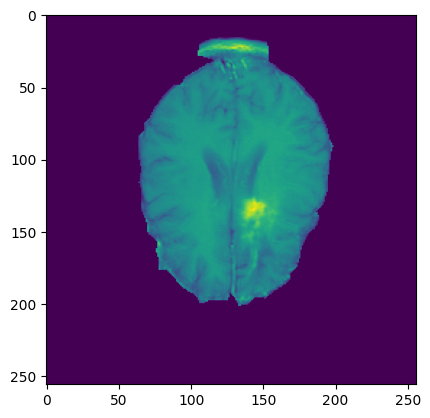

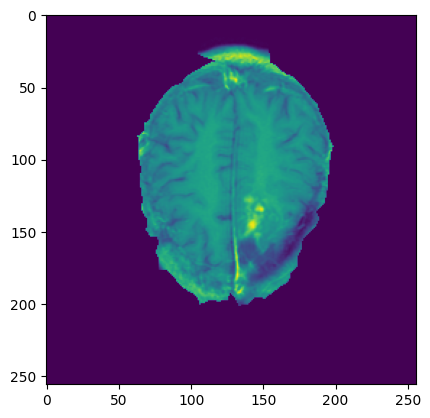

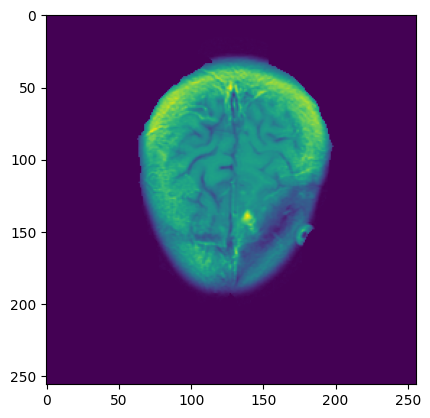

0


In [71]:
# i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
import matplotlib.pyplot as plt
import numpy as np

testing_img = img_nparrays[5]
print(testing_img.shape)
print(type(testing_img))

# print(testing_img[:, :, :])

# visualize a volume thorough its 2d slices
for i in range(testing_img.shape[0]):
  brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()
print(labels[0])

# print(testing_img[2, :, :].shape)

### resizing number of slices in volumes

In [72]:
count = 0
low_count = 0
big_img_nparrays = []
big_img_labels = []

# find the amount of images that don't have more than 256 slices or are the wrong size (we need to eliminate volumes with very low)
for i in range(len(img_nparrays)):
  img = img_nparrays[i]
  if img.shape[0] < 32 or img.shape[1] != 256:
    print("V THIS IS NOT VALID")
    print((img_nparrays[i].shape))
    low_count += 1
    continue
  print((img_nparrays[i].shape))
  big_img_nparrays.append(img)
  big_img_labels.append(labels[i])
  count += 1

print(count) # total amount of images
print(low_count) # not valid images
print(len(img_nparrays)) # total amount of images
print(len(big_img_nparrays)) # number of valid images
labels = big_img_labels
print(len(labels))

(56, 256, 256)
(58, 256, 256)
V THIS IS NOT VALID
(2, 256, 256)
(56, 256, 256)
(56, 256, 256)
V THIS IS NOT VALID
(3, 256, 256)
(58, 256, 256)
(58, 256, 256)
V THIS IS NOT VALID
(34, 512, 512)
V THIS IS NOT VALID
(68, 512, 512)
(68, 256, 256)
(55, 256, 256)
(54, 256, 256)
(52, 256, 256)
(54, 256, 256)
(56, 256, 256)
(54, 256, 256)
(53, 256, 256)
(54, 256, 256)
(51, 256, 256)
(58, 256, 256)
(48, 256, 256)
(58, 256, 256)
(56, 256, 256)
(56, 256, 256)
(59, 256, 256)
(60, 256, 256)
(54, 256, 256)
(50, 256, 256)
(57, 256, 256)
(55, 256, 256)
(55, 256, 256)
(57, 256, 256)
(58, 256, 256)
(55, 256, 256)
(53, 256, 256)
(58, 256, 256)
(56, 256, 256)
(51, 256, 256)
(52, 256, 256)
(60, 256, 256)
(49, 256, 256)
(56, 256, 256)
(57, 256, 256)
(56, 256, 256)
(56, 256, 256)
V THIS IS NOT VALID
(30, 256, 256)
(58, 256, 256)
(58, 256, 256)
(60, 256, 256)
(57, 256, 256)
(57, 256, 256)
(54, 256, 256)
(54, 256, 256)
(54, 256, 256)
(53, 256, 256)
(50, 256, 256)
(54, 256, 256)
V THIS IS NOT VALID
(27, 256, 25

In [73]:
# no slicing through cropping - need to resize volumes

# same_size_arrays = []

# for i in range(len(img_nparrays)):
#   img = img_nparrays[i]
#   if (img.shape[0] == 3):
#     continue
#   print(img.shape)
#   brain_slice = img[:min_slices, :, :]
#   print(brain_slice.shape)
#   print()
#   same_size_arrays.append(brain_slice)

In [74]:
# print(len(same_size_arrays))

In [75]:
# testing_img = same_size_arrays[4]
# print(testing_img.shape)
# print(type(testing_img))

# # print(testing_img[:, :, :])

# for i in range(testing_img.shape[0]):
#   brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
#   plt.imshow(brain_slice)
#   plt.show()
#   plt.close()

In [76]:
# # i took out slices from the ends of the images because I thought/assumed that in the images, the first and last slices of only have sparse information
# #  that's the problem - I ASSUMED, so after making the algorithm, I realized that I shouldn’t have sliced the ends.
# # instead, the last slices are the ones that have sparse information. on the other hand, the first few slices have a lot of information
# # so now i gotta slice out from the last ones

# same_size_arrays2 = []

# for i in range(len(img_nparrays)):
#   img = img_nparrays[i]
#   # print(img.shape)

#   if (img.shape[0] == 3):
#     continue

#   take_out = (img.shape[0]-min_slices)/2;
#   # print(img.shape[0])
#   # print(take_out)
#   if (take_out % 1 == 0):
#     # print("yes")
#     start = int(take_out)
#     end = int(img.shape[0]-take_out)
#     print(start, end)
#   if (take_out % 1 != 0):
#     # print("no")
#     start = int(take_out)
#     end = int(img.shape[0]-take_out)
#     print(start, end)

#   brain_slice = img[start:end, :, :]
#   print(brain_slice.shape)
#   same_size_arrays2.append(brain_slice)
# #   print("\nNEXT\n")
#   # print(img_nparrays[i].shape[0], start, end)

# # print(testing_img[10, 180, 175:181])
#   # print(brain_slice.shape)

In [77]:
# print(len(same_size_arrays2[0]))

In [78]:
# testing_img = same_size_arrays2[4]
# print(testing_img.shape)
# print(type(testing_img))

# # print(testing_img[:, :, :])

# for i in range(testing_img.shape[0]):
#   brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
#   plt.imshow(brain_slice)
#   plt.show()
#   plt.close()

In [79]:
# for one:
# img = img_nparrays[1]
# print(img.shape)

# take_out = (img.shape[0]-min_slices)/2;
# print(img.shape[0])
# print(take_out)
# if (take_out % 1 == 0):
#   # print("yes")
#   start = int(take_out)
#   end = int(img.shape[0]-take_out)
#   print(start, end)
# if (take_out % 1 != 0):
#   # print("no")
#   start = int(take_out)
#   end = int(img.shape[0]-take_out)
#   print(start, end)

# brain_slice = img[start:end, :, :]
# print(brain_slice.shape)
# #   print("\nNEXT\n")
#   # print(img_nparrays[i].shape[0], start, end)

# # print(testing_img[10, 180, 175:181])
#   # print(brain_slice.shape)


In [80]:
def find_scale_slices(size):
  return 32/size # using 32 as the amount of slices to resize to

In [81]:
def find_scale_otherdims(size):
  return 96/size # using 32 as the amount of slices to resize to

In [82]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [83]:
from scipy.ndimage import zoom
same_size_arrays = []

# resizing using the zoom function in scipy.ndimage
for i in range(len(big_img_nparrays)):
  img = big_img_nparrays[i]

  if (img.shape[0] == 3): # if dimensions are weird
    continue

  new_array = zoom(img, (find_scale_slices(img.shape[0]), find_scale_otherdims(img.shape[1]), find_scale_otherdims(img.shape[2])), order=0)
  same_size_arrays.append(new_array)
  print(new_array.shape)

(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)
(32, 96, 96)

198
(32, 96, 96)
<class 'numpy.ndarray'>


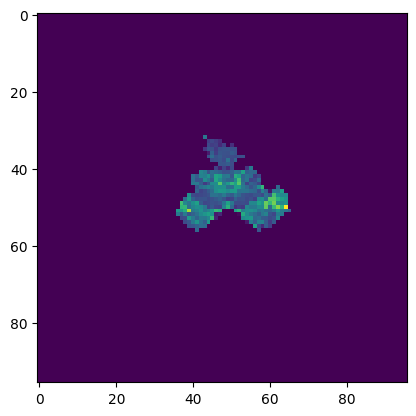

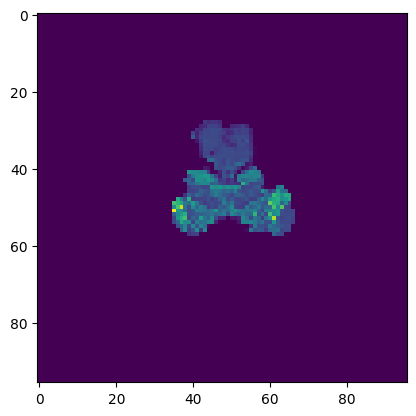

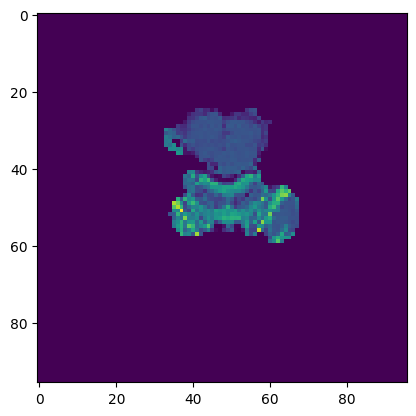

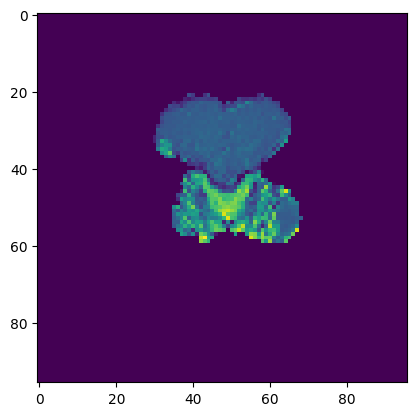

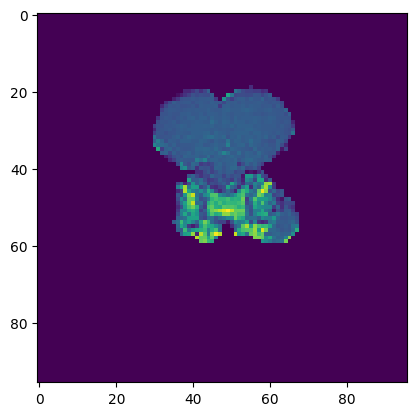

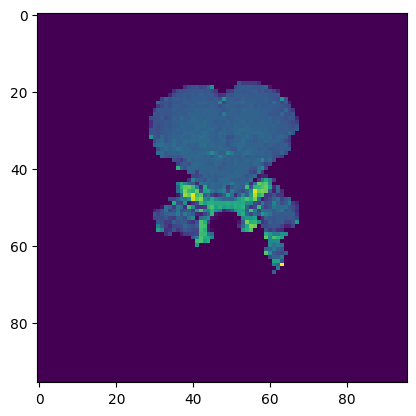

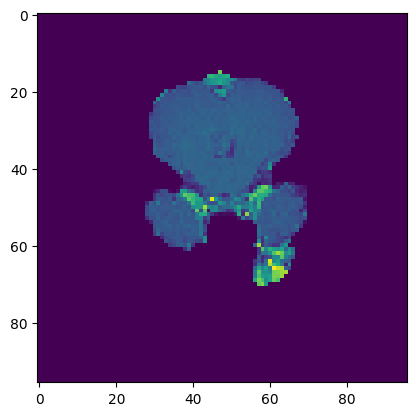

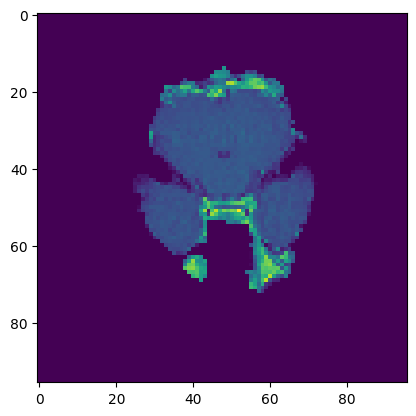

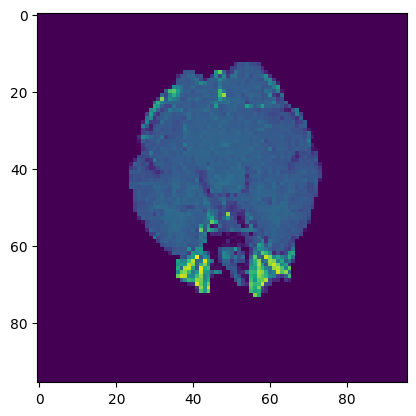

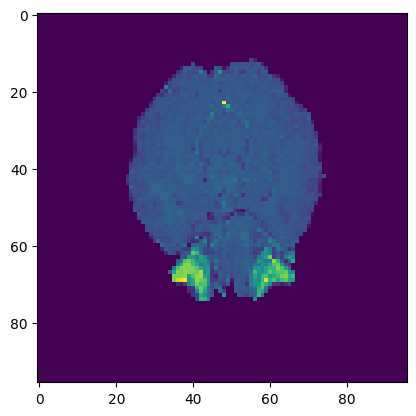

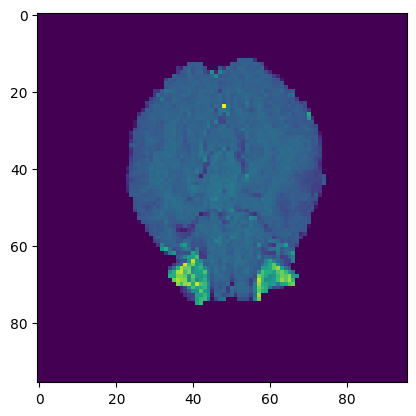

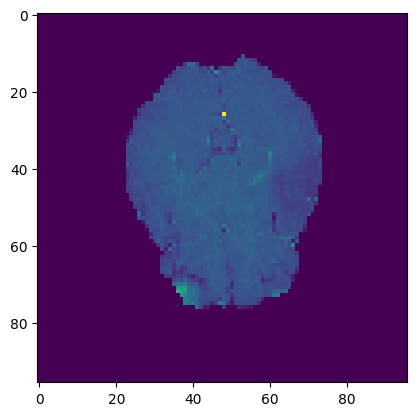

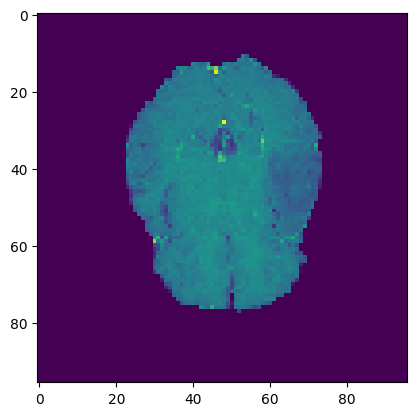

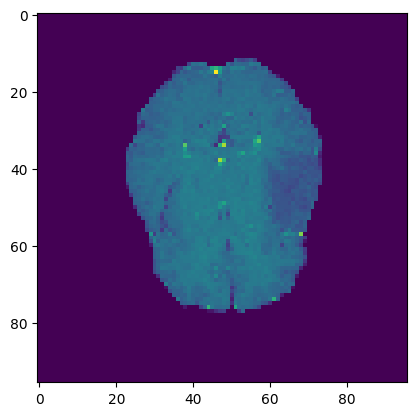

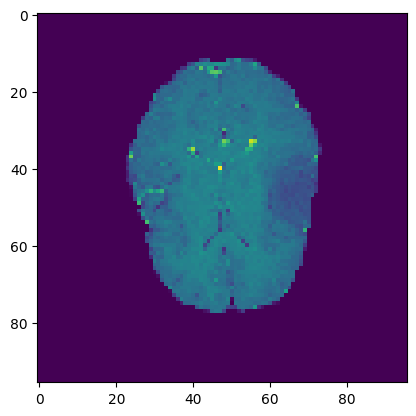

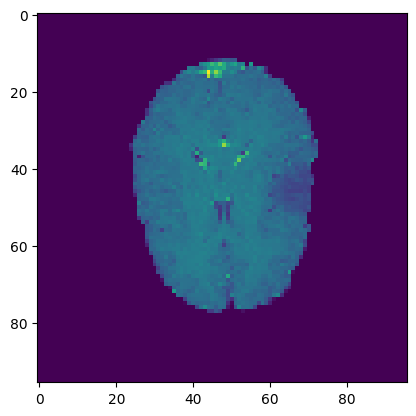

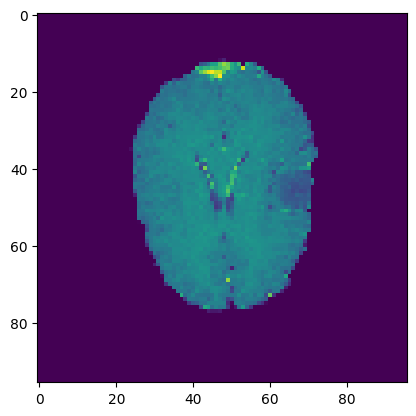

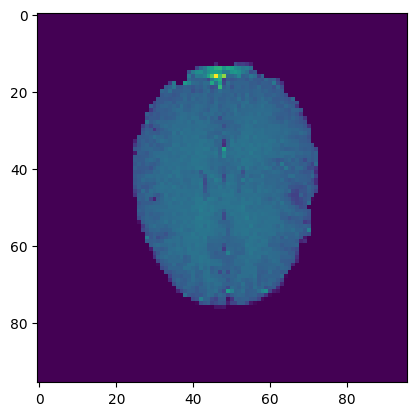

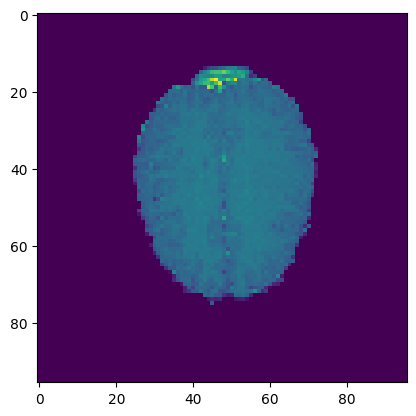

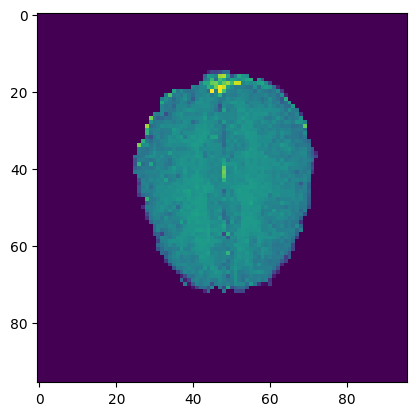

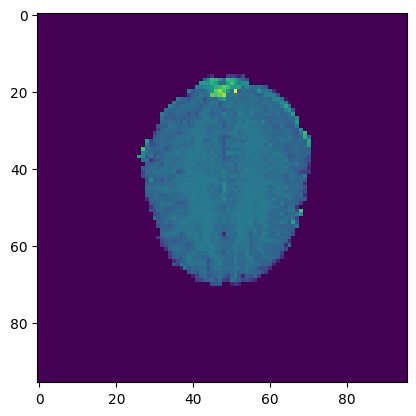

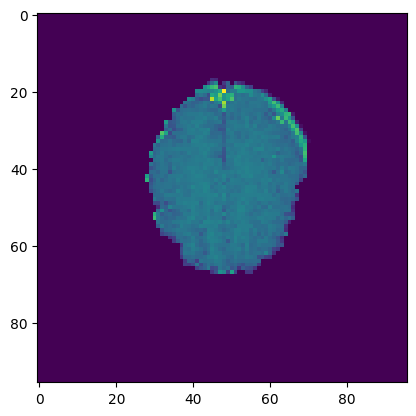

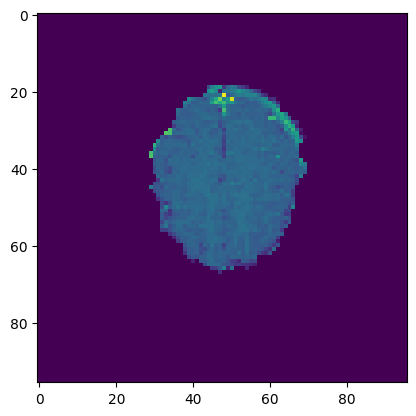

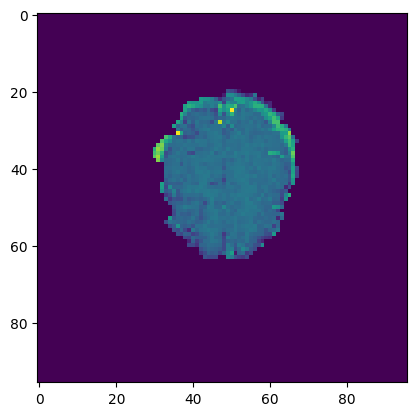

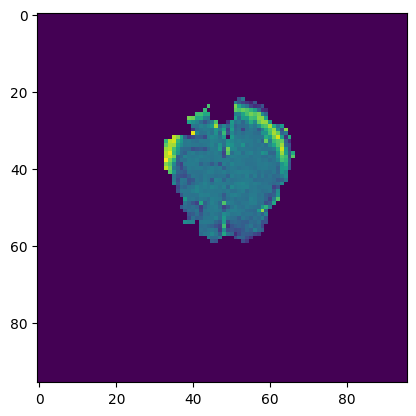

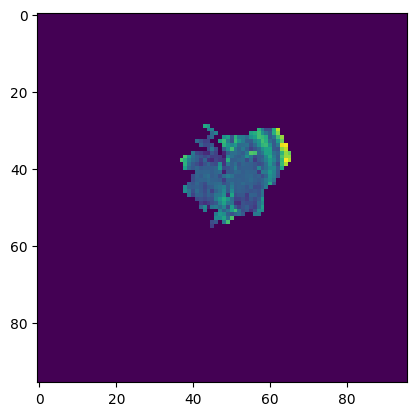

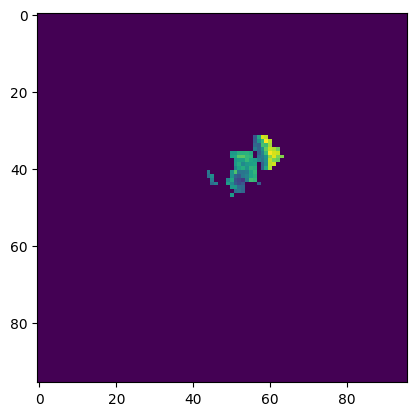

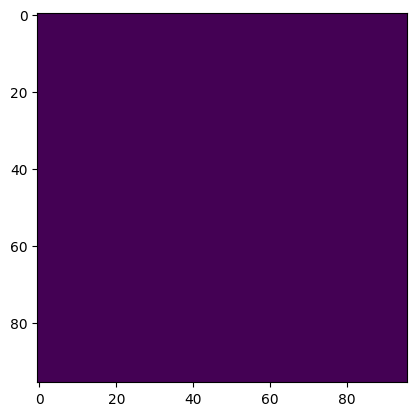

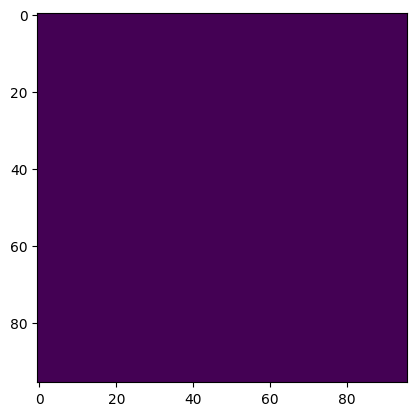

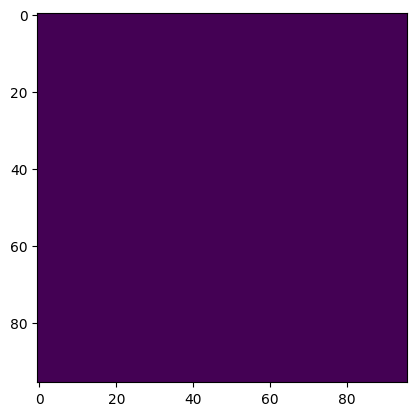

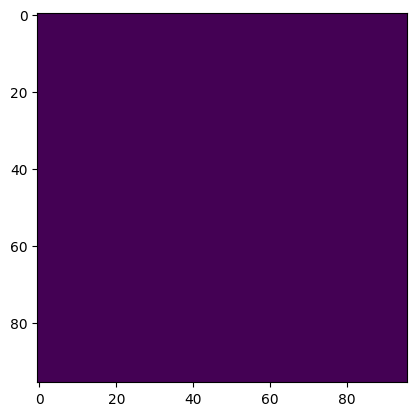

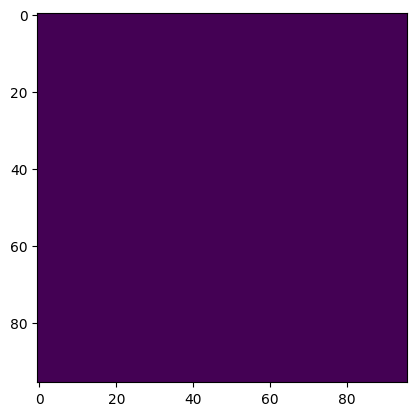

In [84]:
print(len(same_size_arrays)) # amount of images
testing_img = same_size_arrays[5] # look at one test image
print(testing_img.shape) # look at the shape of the testing image
print(type(testing_img)) # look at the type (numpy array)

# print(testing_img[:, :, :])

# visualizing the testing image to ensure there's 32 slices
for i in range(testing_img.shape[0]):
  brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()

### shuffling image volumes and labels

In [85]:
image_label_data = list(zip(same_size_arrays, labels)) # zip the image and labels together - so the indices after zipping are the same
check_images = []
check_labels = []
for i in image_label_data: # adding the original order of the images and labels into the lists
  check_images.append(i[0])
  check_labels.append(i[1])
# print(check_images[0][0][10])

import random # random library for the shuffling
shuffled_images = []
shuffled_labels = []
random.shuffle(image_label_data) # shuffle zip file
for i in image_label_data:
  shuffled_images.append(i[0])
  shuffled_labels.append(i[1])
# print(shuffled_images[0][0][10])

print(check_labels)
print(shuffled_labels) # if the labels are shuffling, it is safe to assume that so are the images

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1,

In [86]:
len_images = len(same_size_arrays)
print(len_images)

198


### making training, validation, and testing datasets

In [87]:
# I'm going to go with to go with the second paper's 60:20:20 split because it would also be easier given that I'm working with 20 images for now

In [88]:
v_t_datasize = int(len_images*0.2) # size of the testing/validation datasets
training_datasize = len_images - (v_t_datasize*2) # size of the training datasets
print(v_t_datasize, training_datasize) # amount of images in each dataset
print(v_t_datasize+v_t_datasize+training_datasize == 198) # check if they add up to the total amount of images

39 120
True


In [89]:
def make_dataset(start_idx, end_idx):
  image_dataset = shuffled_images[start_idx:end_idx]
  label_dataset = shuffled_labels[start_idx:end_idx]
  return image_dataset, label_dataset

In [90]:
# slicing through the dataset to get the images and labels needed for the training, validation, and testing
og_training_images, og_training_labels = make_dataset(0, training_datasize)
og_validation_images, og_validation_labels = make_dataset(training_datasize, training_datasize+v_t_datasize)
og_testing_images, og_testing_labels = make_dataset(training_datasize+v_t_datasize, len_images)

In [91]:
# checking length of training dataset
print(len(og_training_images))
print(og_training_images[0].shape)
print(len(og_training_labels))
print(og_training_labels)
print()

# checking length of validation dataset
print(len(og_validation_images))
print(og_validation_images[0].shape)
print(len(og_validation_labels))
print(og_validation_labels)
print()

# checking length of testing dataset
print(len(og_testing_images))
print(og_testing_images[0].shape)
print(len(og_testing_labels))
print(og_testing_labels)
print()
print(len(og_training_images)+len(og_validation_images)+len(og_testing_images))

120
(32, 96, 96)
120
[2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2]

39
(32, 96, 96)
39
[0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1]

39
(32, 96, 96)
39
[0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0]

198


### normalization and transformations on images

In [92]:
"""
size is not the same :(

find mean and standard deviation on the entire volume of one image - do we need size to be same for this?
^yes, but why?
 I should be taking the mean and standard deviation for each volume as a whole and then
 averaging that instead of taking it for each slice of each volume. Also, for normalization,
 the image size should be the same for all the scans with different volumes (which will also tie
into other preprocessing steps). Normalization is one part of preprocessing though

convert the array into a torch tensor
convert all pixel values into float32
make pixel value range from 0 to 1

if needed, volume reshaping (ndimage.zoom (resize first and then normalize))
create a new dataset with the preprocessed images

even if preprocessing works out well, you can't train a model based on images with different dimensions
"""

"\nsize is not the same :(\n\nfind mean and standard deviation on the entire volume of one image - do we need size to be same for this?\n^yes, but why?\n I should be taking the mean and standard deviation for each volume as a whole and then\n averaging that instead of taking it for each slice of each volume. Also, for normalization,\n the image size should be the same for all the scans with different volumes (which will also tie\ninto other preprocessing steps). Normalization is one part of preprocessing though\n\nconvert the array into a torch tensor\nconvert all pixel values into float32\nmake pixel value range from 0 to 1\n\nif needed, volume reshaping (ndimage.zoom (resize first and then normalize))\ncreate a new dataset with the preprocessed images\n\neven if preprocessing works out well, you can't train a model based on images with different dimensions\n"

In [93]:
def find_mean(volume):
  total_pixels = 96*96*32
  pixels_sum = 0
  # print(volume.shape)
  for i in range(32):
    current_slice = volume[i, :, :] # got the current slice
    current_slice_sum = current_slice.sum() # take sum of each slice
    # print(current_sum/256/256)
    pixels_sum += current_slice_sum # add the sum of all the slices
  # print(pixels_sum, total_pixels)
  return pixels_sum/total_pixels

In [94]:
print(find_mean(og_training_images[0]))
print(np.mean(og_training_images[0]))

21.216817220052082
21.216818


In [95]:
total_mean = 0
# find total mean for all training images
for i in og_training_images:
  total_mean += find_mean(i)
mean = total_mean/len(og_training_images)
print(mean)
print(np.mean(og_training_images))

40.917328135172546
40.917374


In [96]:
import math

def find_std(volume):
  total_pixels = 96*96*20
  squared_sum_error = 0
  # print(volume.shape)
  for i in range(20):
    current_slice = volume[i, :, :] # got the current slice
    squared_sum_error += ((current_slice-mean)**2).sum()
  return math.sqrt(squared_sum_error/total_pixels)

In [97]:
print(find_std(og_training_images[5]))
print(np.std(og_training_images[5]))

164.49993588524586
149.85365


In [98]:
total_std = 0
for i in og_training_images:
  total_std += find_std(i)
std = total_std/len(og_training_images)
print(std)
print(np.std(og_training_images))

108.62914540642218
111.08404


In [99]:
print("Mean: " + str(mean) + " ----- " + "Standard Deviation: " + str(std))

Mean: 40.917328135172546 ----- Standard Deviation: 108.62914540642218


In [100]:
# https://pytorch.org/vision/stable/transforms.html

# convert the numpy array into a torch tensor + make pixel value range from 0 to 1
  # Numpy arrays are mainly used in typical machine learning algorithms (such as k-means or Decision Tree in scikit-learn)
  # whereas pytorch tensors are mainly used in deep learning which requires heavy matrix computation.
  # also you can easily appply transforms and normalize through the torch package
  # ToTensor() - It converts the PIL image with a pixel range of [0, 255] to a PyTorch FloatTensor of shape (C, H, W) with a range [0.0, 1.0]
  # https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor
# convert all pixel values into float32
  # ConvertImageDtype(torch.float)
  # https://pytorch.org/vision/stable/generated/torchvision.transforms.ConvertImageDtype.html#torchvision.transforms.ConvertImageDtype
# normalize
  # Normalize()
  # https://pytorch.org/vision/stable/generated/torchvision.transforms.Normalize.html#torchvision.transforms.Normalize

# ^i can do this for every slice since it doesn't make a difference to the values (since ur changing individual pixels)

In [101]:
# trying out difference between numpy array and torch tensor

# print(same_size_arrays[0][0][0])
# import torch
# print(torch.tensor(same_size_arrays[0][0][0]))

In [102]:
import torch
import torchvision
import torchvision.transforms as transforms

In [103]:
def dataset_transform(tvt_images, emptytransformed_tvt_images):
  for i in tvt_images:
    # if I wanted to, I could resize using cv2.resize()
    transform = transforms.Compose([transforms.ToTensor(), # make torch tensor
                                    transforms.ConvertImageDtype(torch.float), # make float32
                                    transforms.Normalize(mean, std)]) # done in the same order as mentioned
    image = transform(i)
    emptytransformed_tvt_images.append(image) # add the normal image to emtpy list

    # horizontal flip of image
    replicate_img_mirror_y = transforms.RandomHorizontalFlip(p=1) # mirror across y (horizontal)
    mirror_y = replicate_img_mirror_y(image)
    emptytransformed_tvt_images.append(mirror_y)

    # vertical flip of image
    replicate_img_mirror_x = transforms.RandomVerticalFlip(p=1) # mirror across x (vertical)
    mirror_x = replicate_img_mirror_x(image)

    # 90 degrees rotation - need to make copy of image and then perform rotation on each slice
    rotatedimage1 = image.clone().detach()
    for i in range(rotatedimage1.shape[1]):
      # print(i)
      brain_slice = image[:, i, :] # second coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
      replicate_img_rotation1 = transforms.RandomRotation(degrees=[90,90], fill=0)
      # print(brain_slice.shape)
      brain_slice = brain_slice.unsqueeze(dim=0)
      a = replicate_img_rotation1(brain_slice)
      a = a.squeeze()
      rotatedimage1[:, i, :] = a

    # 270 degrees rotation - need to make copy of image and then perform rotation on each slice
    rotatedimage2 = image.clone().detach()
    for i in range(rotatedimage2.shape[1]):
      # print(i)
      brain_slice = image[:, i, :] # second coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
      replicate_img_rotation1 = transforms.RandomRotation(degrees=[270,270], fill=0)
      # print(brain_slice.shape)
      brain_slice = brain_slice.unsqueeze(dim=0)
      a = replicate_img_rotation1(brain_slice)
      a = a.squeeze()
      rotatedimage2[:, i, :] = a

    emptytransformed_tvt_images.append(mirror_x)
    emptytransformed_tvt_images.append(rotatedimage1)
    emptytransformed_tvt_images.append(rotatedimage2)

In [104]:
def data_augment_labels(tvt_labels, new_augmented_labels):
  for i in tvt_labels:
    for j in range(5):
      new_augmented_labels.append(i)

In [105]:
# data augmentation - i will not do for now because computations are alr heavy - otherwise i would probably add some rotaions and flipping

In [106]:
transformed_tr_images = [] # training images
training_images_transformed = dataset_transform(og_training_images, transformed_tr_images)

In [107]:
augmented_tr_labels = []
training_labels_augmented = data_augment_labels(og_training_labels, augmented_tr_labels)

In [108]:
transformed_v_images = [] # validation images
validation_images_transformed = dataset_transform(og_validation_images, transformed_v_images)

In [109]:
augmented_v_labels = []
validation_labels_augmented = data_augment_labels(og_validation_labels, augmented_v_labels)

In [110]:
transformed_te_images = [] # testing images
testing_images_transformed = dataset_transform(og_testing_images, transformed_te_images)

In [111]:
augmented_te_labels = []
testing_labels_augmented = data_augment_labels(og_testing_labels, augmented_te_labels)

In [112]:
# print(og_training_images[0])
# print(transformed_tr_images[0])

# print(og_validation_images[0])
# print(transformed_v_images[0])

# print(og_testing_images[0])
# print(transformed_te_images[0])

# ^I want to confirm that the reason why these pixels in the torch tensor are negative and not in the range of [0,1] is because
# after making it into a tensor, you are normalizing through standardization/z-score normalization, which doesn't have a specified range, so
# it probably went a bit out of the [0,1] range
# https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/#:~:text=The%20ImageDataGenerator%20class%20can%20be,traditionally%20referred%20to%20as%20normalization.
# https://www.geeksforgeeks.org/normalization-vs-standardization/
# https://pytorch.org/vision/stable/generated/torchvision.transforms.Normalize.html#torchvision.transforms.Normalize

In [113]:
# making sure length stayed the same after transformations
print(len(transformed_tr_images))
print(transformed_tr_images[0].shape)
print(len(augmented_tr_labels))
print()
print(len(transformed_v_images))
print(transformed_v_images[0].shape)
print(len(augmented_v_labels))
print()
print(len(transformed_te_images))
print(transformed_te_images[0].shape)
print(len(augmented_te_labels))

600
torch.Size([96, 32, 96])
600

195
torch.Size([96, 32, 96])
195

195
torch.Size([96, 32, 96])
195


In [114]:
def make_dataset(tvt_images, tvt_labels):
  return list(zip(tvt_images, tvt_labels))

In [115]:
# making sure the dataset lengths and items are correct
print(len(transformed_tr_images), len(augmented_tr_labels))
print(transformed_tr_images[0].shape)
print(augmented_tr_labels[0])
print(augmented_tr_labels)
print()
print(len(transformed_v_images), len(augmented_v_labels))
print(transformed_v_images[0].shape)
print(augmented_v_labels[0])
print(augmented_v_labels)
print()
print(len(transformed_te_images), len(augmented_te_labels))
print(transformed_te_images[0].shape)
print(augmented_te_labels[0])
print(augmented_te_labels)

600 600
torch.Size([96, 32, 96])
2
[2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

[2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 

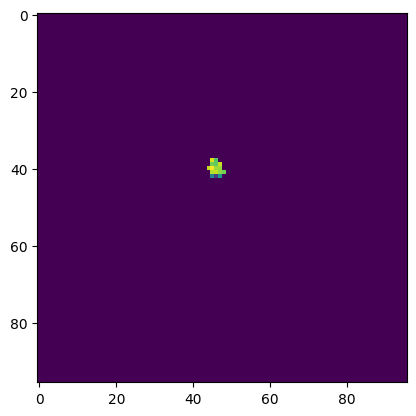

1


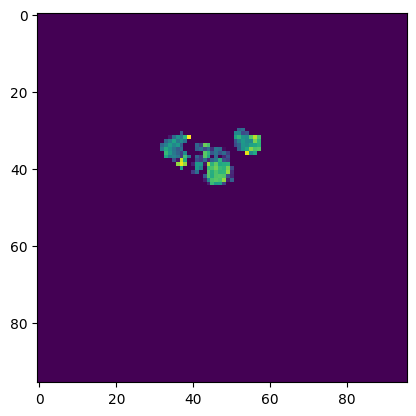

2


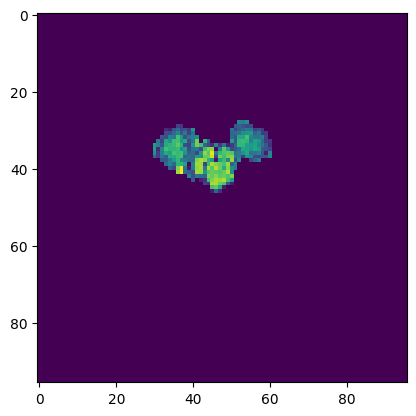

3


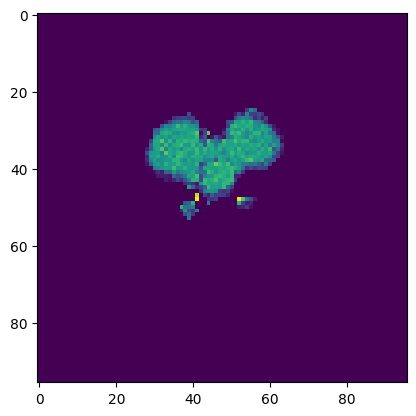

4


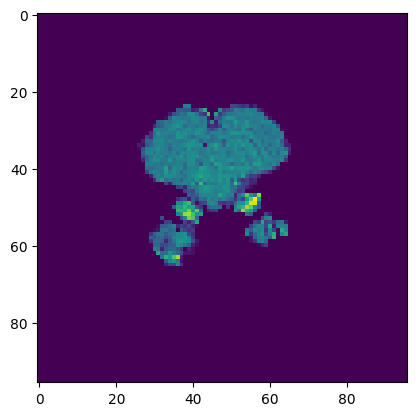

5


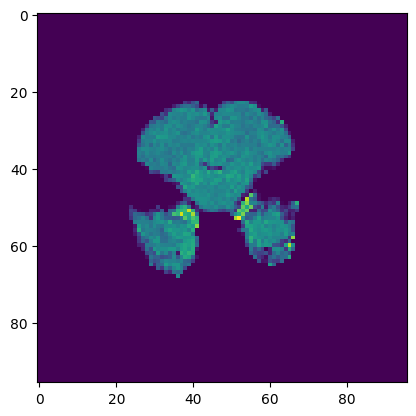

6


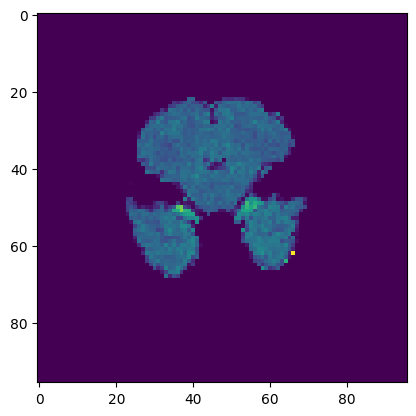

7


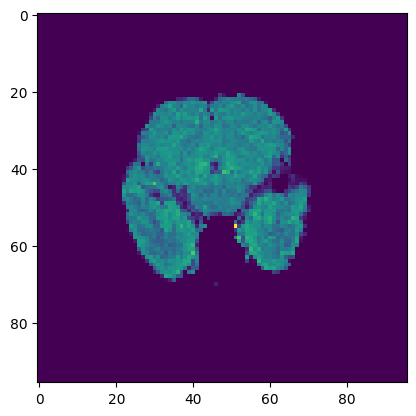

8


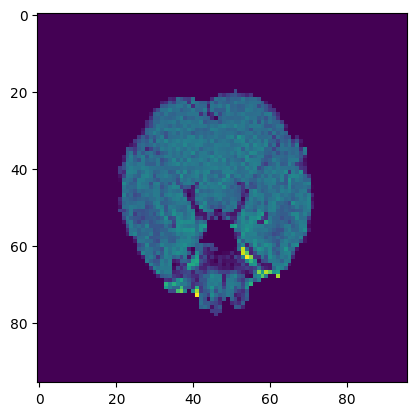

9


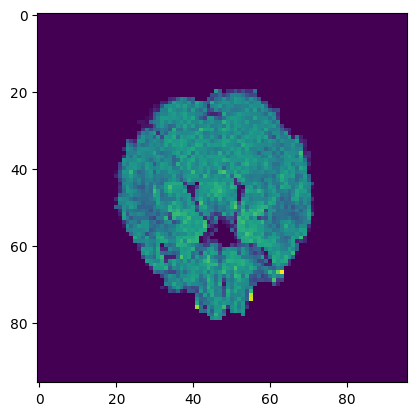

10


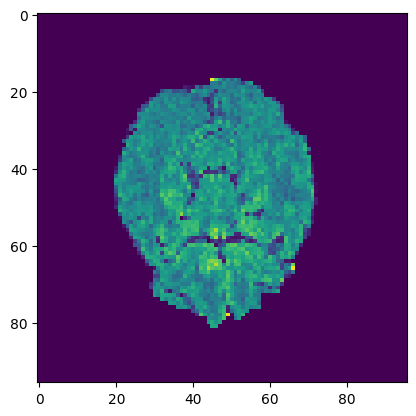

11


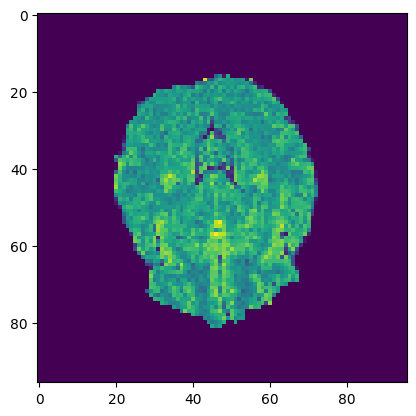

12


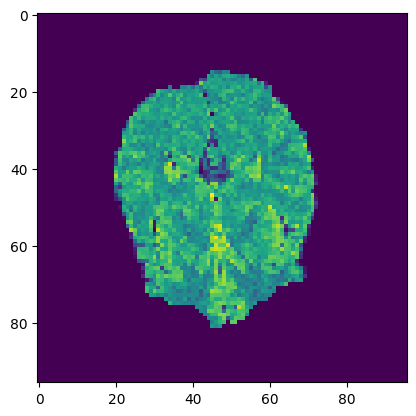

13


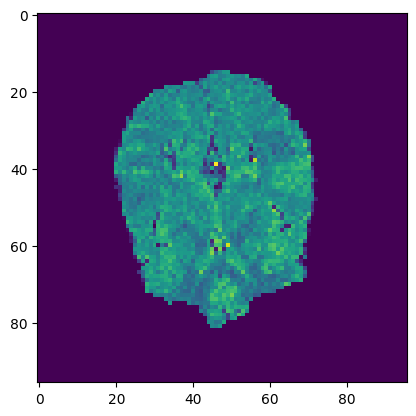

14


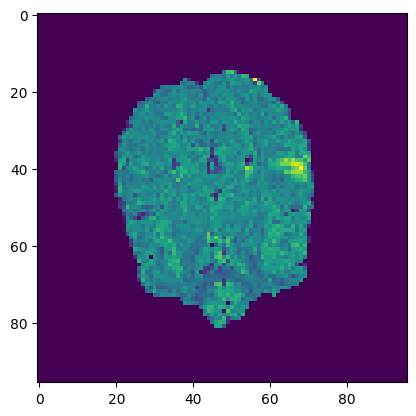

15


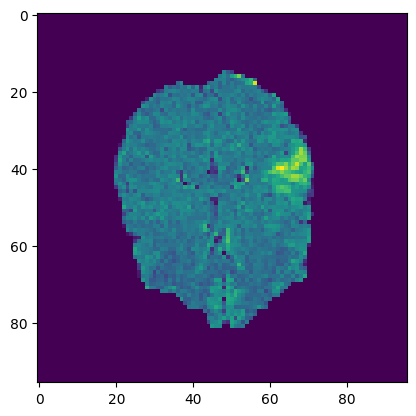

16


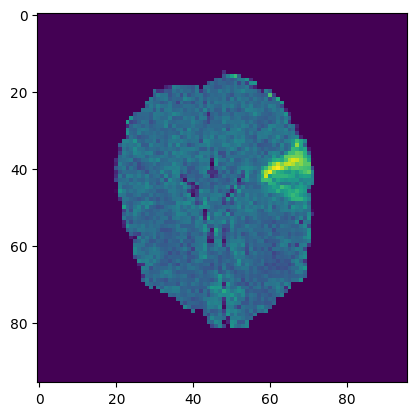

17


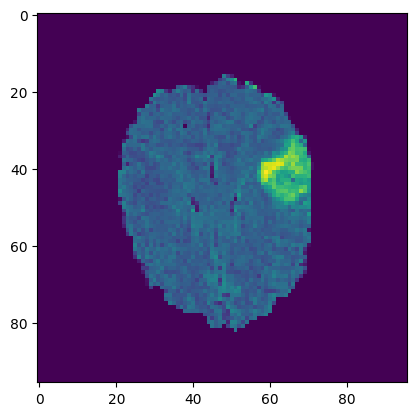

18


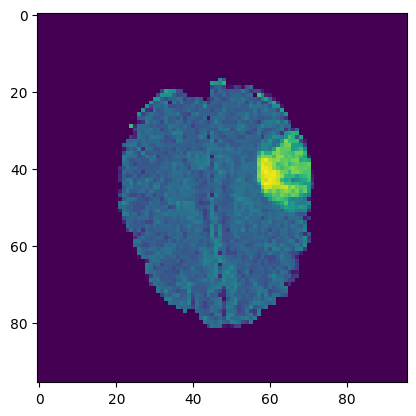

19


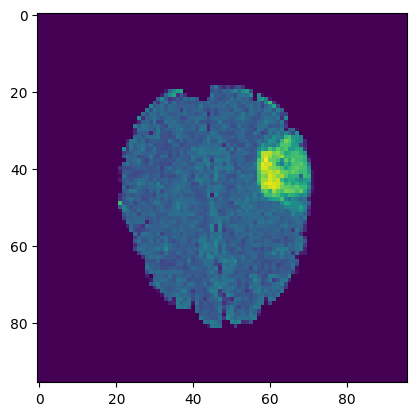

20


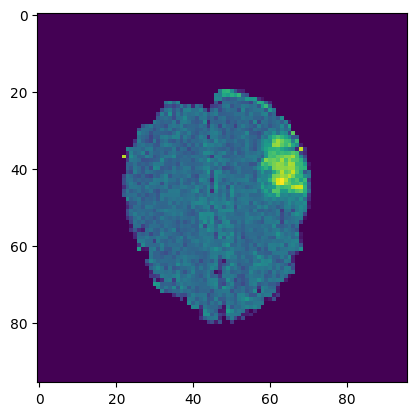

21


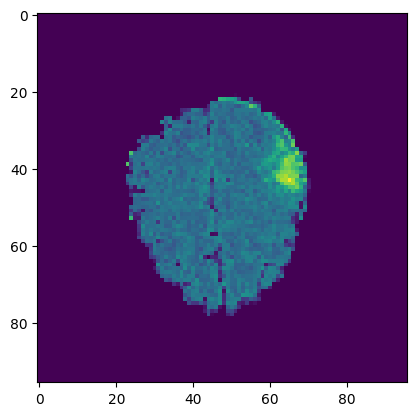

22


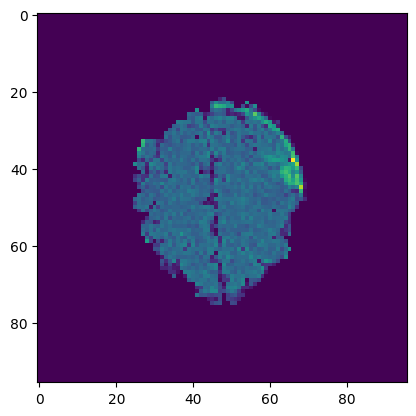

23


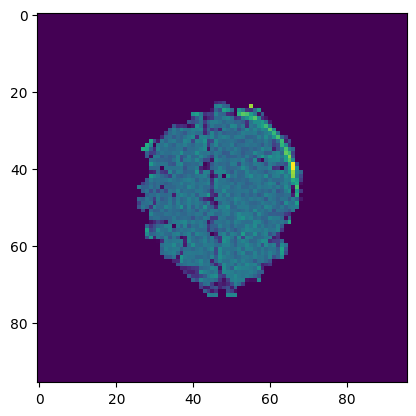

24


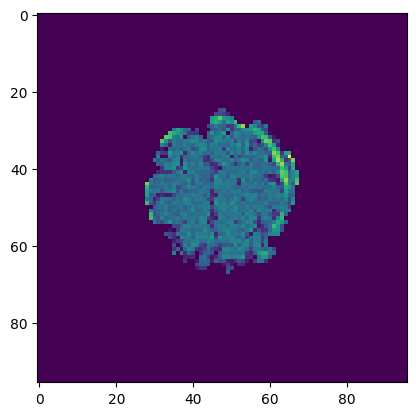

25


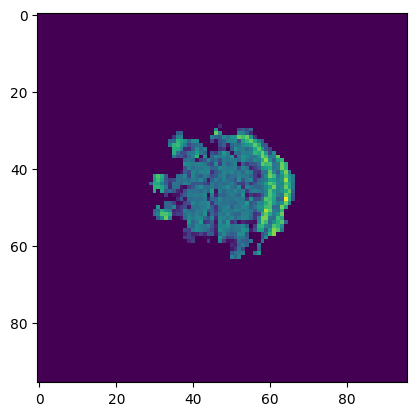

26


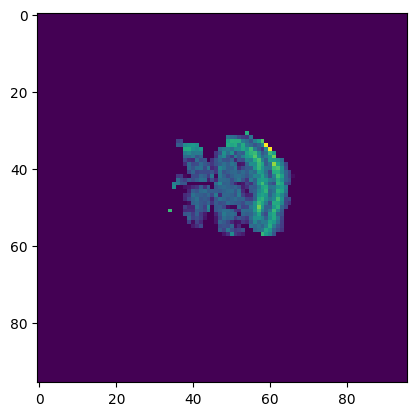

27


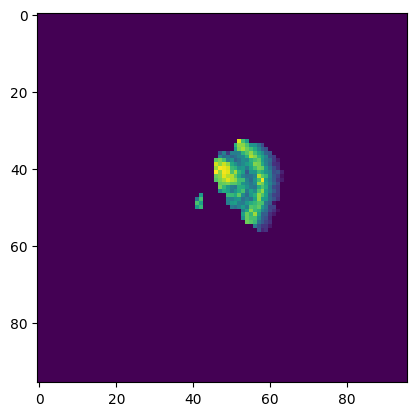

28


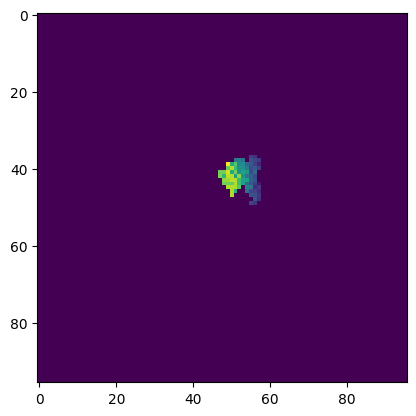

29


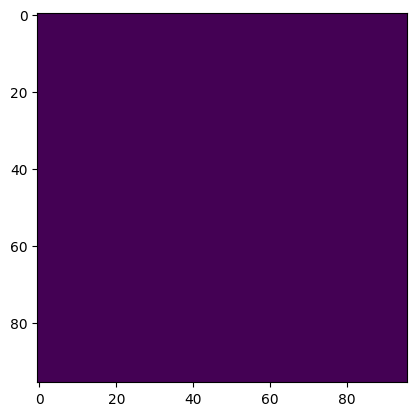

30


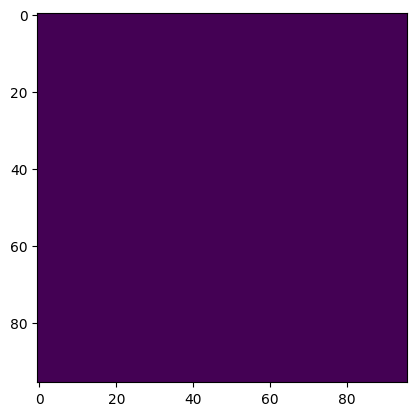

31


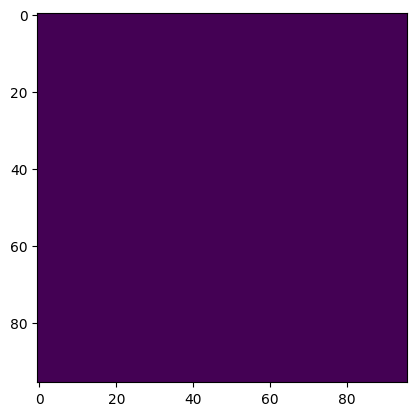

In [116]:
test = transformed_tr_images[49]
print(augmented_tr_labels)

for i in range(test.shape[1]):
  print(i)
  brain_slice = test[:, i, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()

[2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 

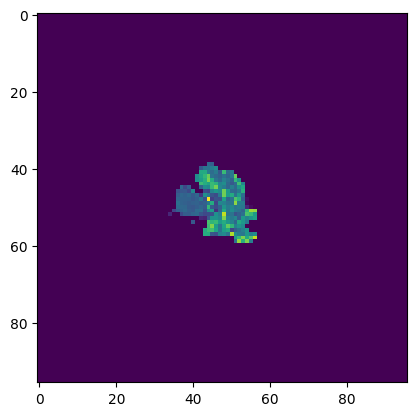

1


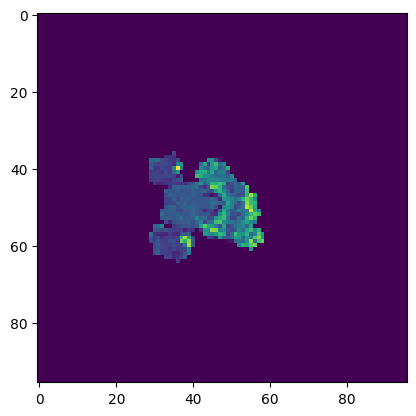

2


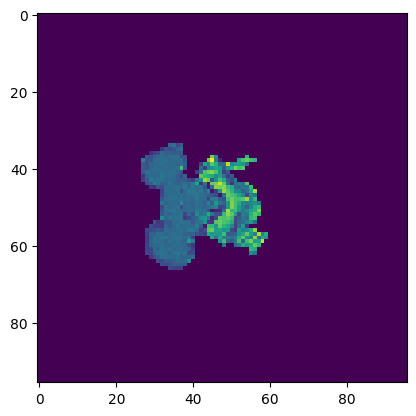

3


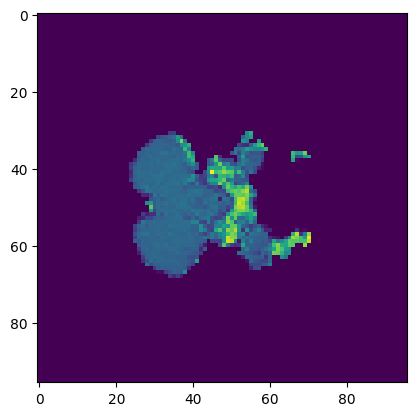

4


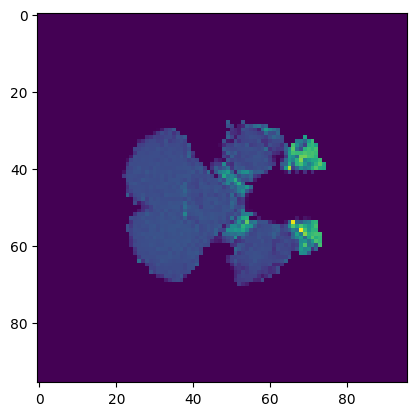

5


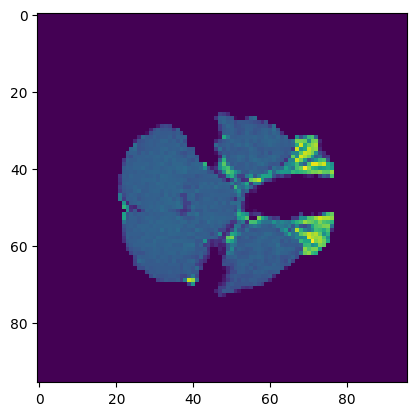

6


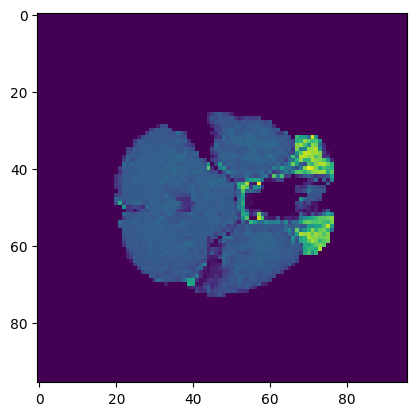

7


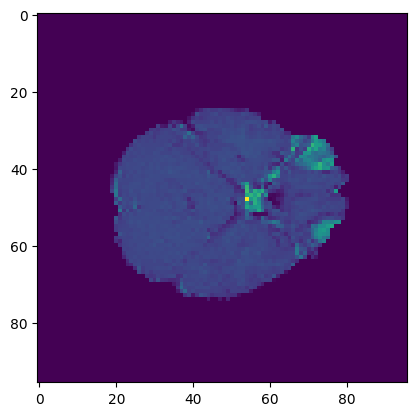

8


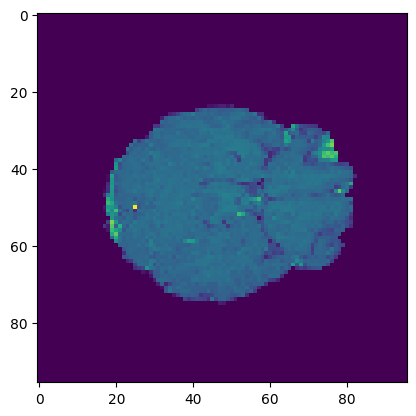

9


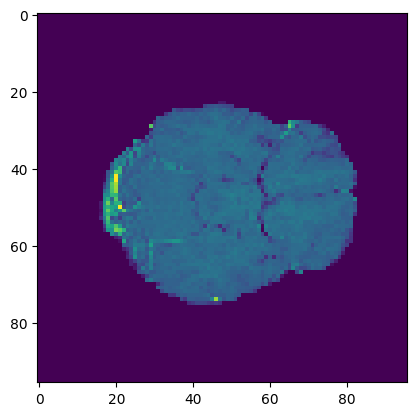

10


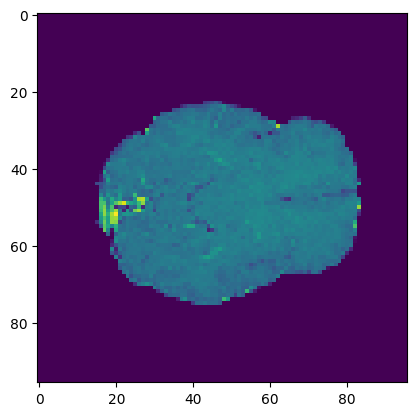

11


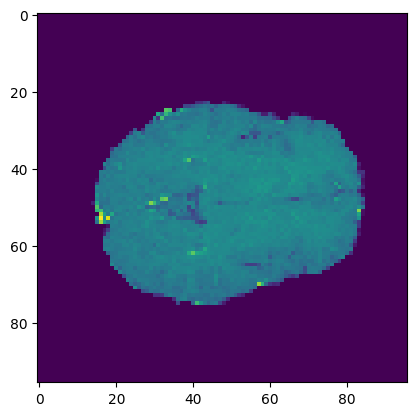

12


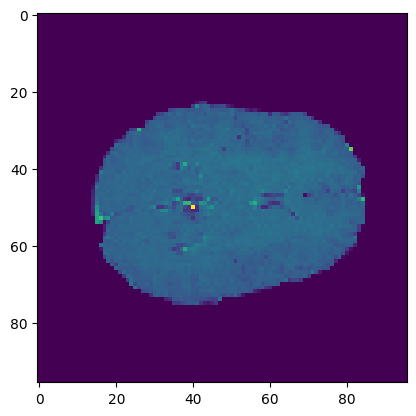

13


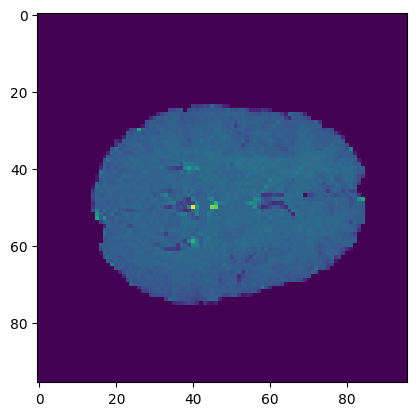

14


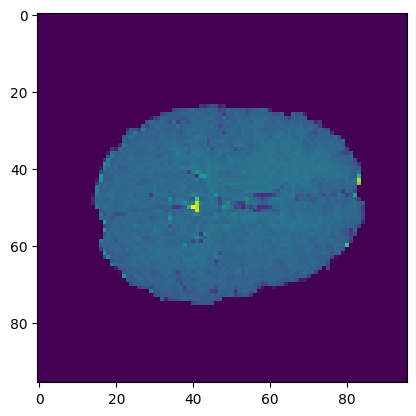

15


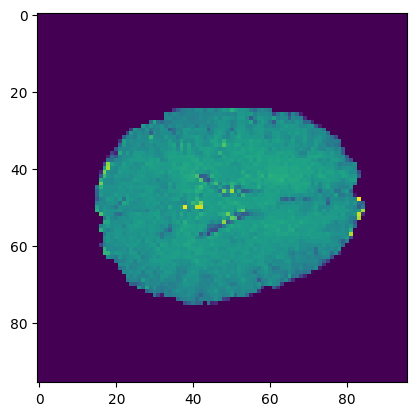

16


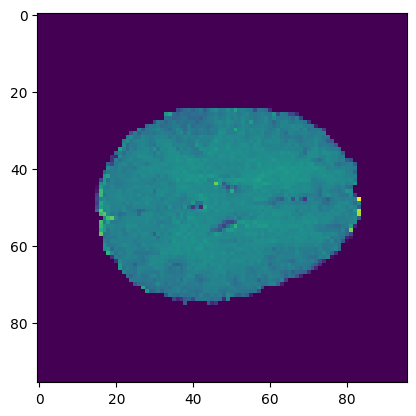

17


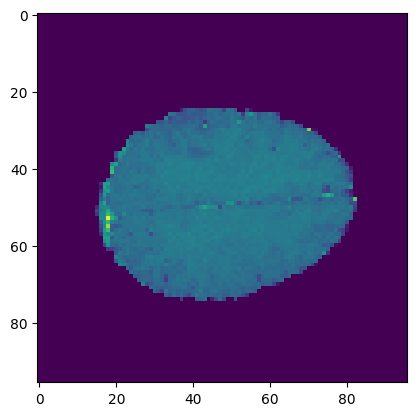

18


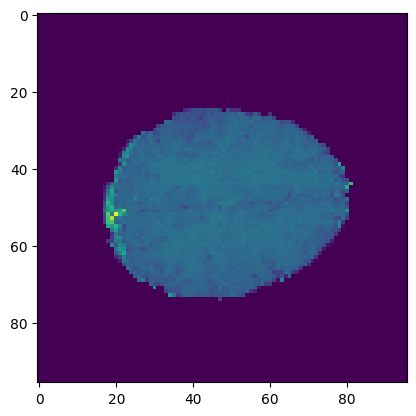

19


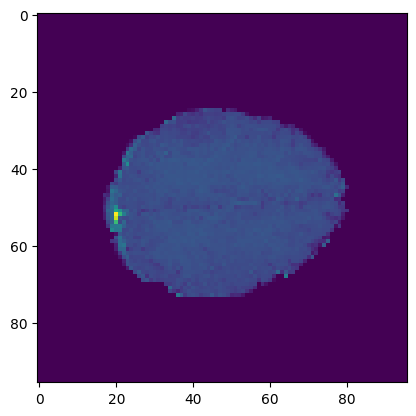

20


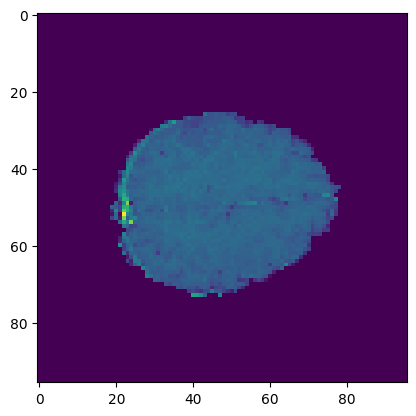

21


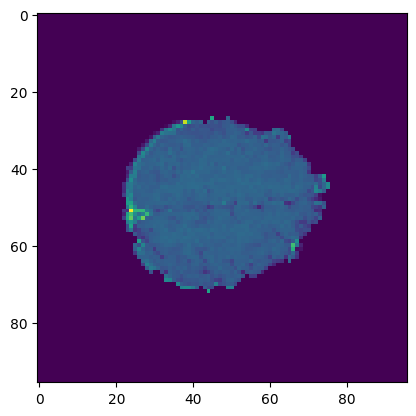

22


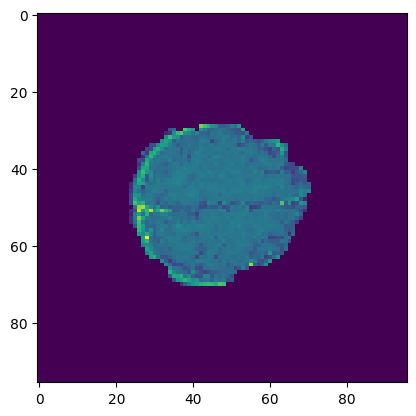

23


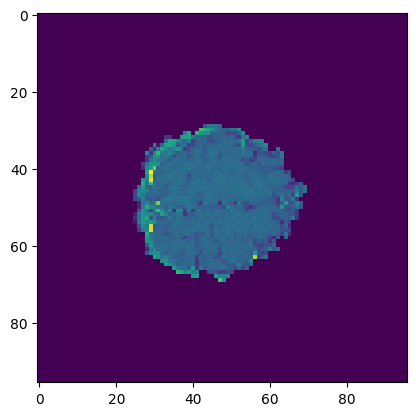

24


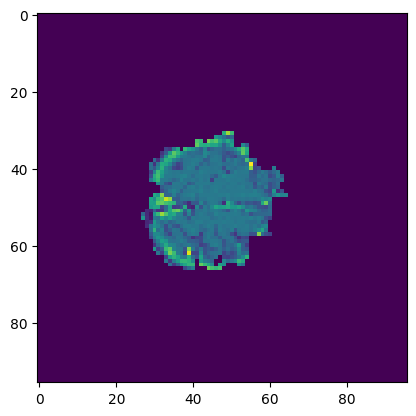

25


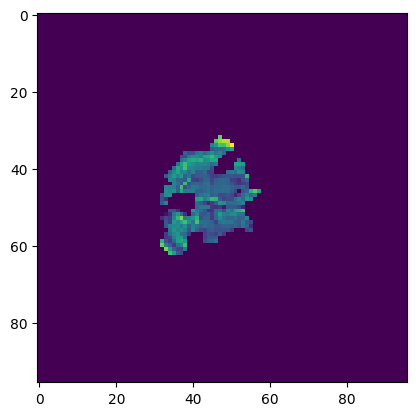

26


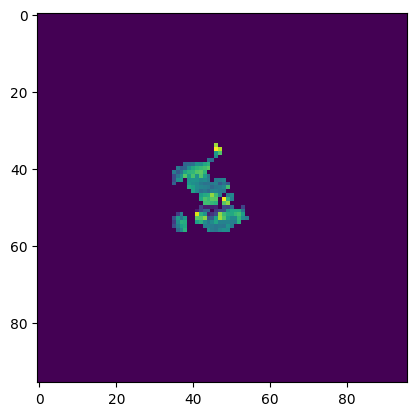

27


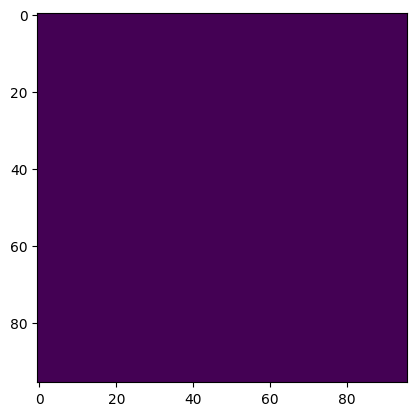

28


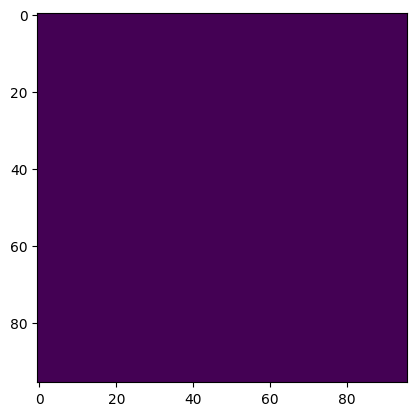

29


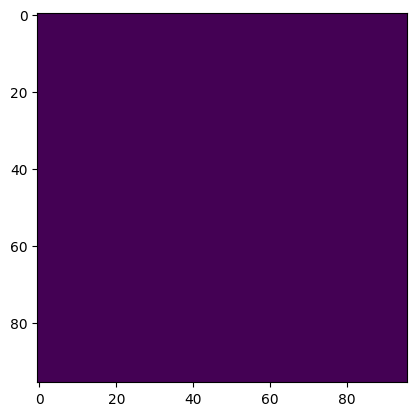

30


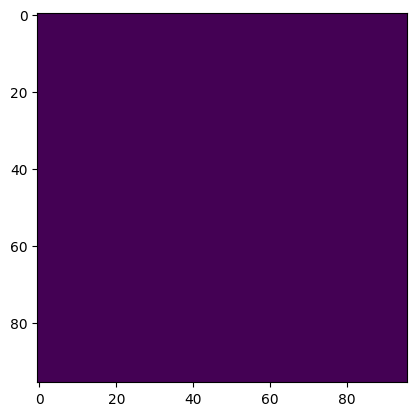

31


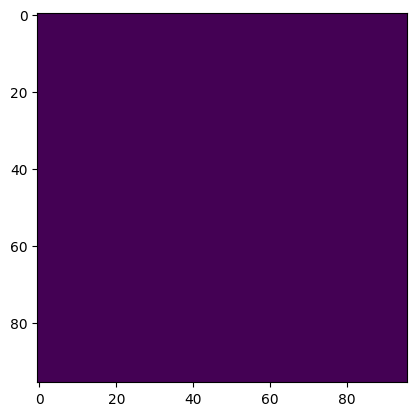

In [117]:
test = transformed_v_images[50]
print(augmented_tr_labels)

for i in range(test.shape[1]):
  print(i)
  brain_slice = test[:, i, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()

[2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 

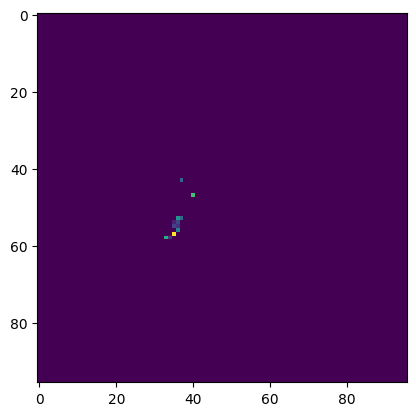

1


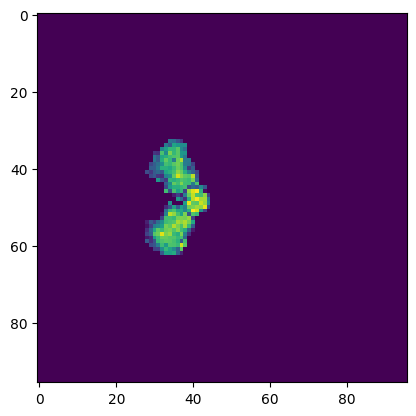

2


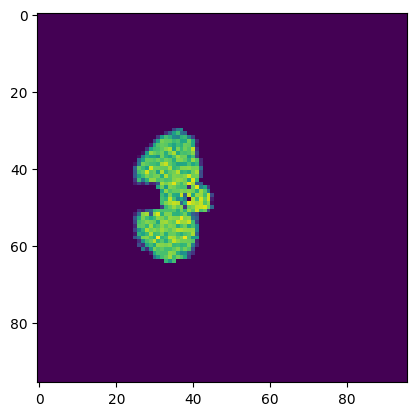

3


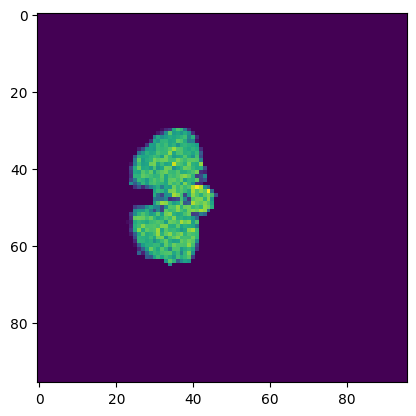

4


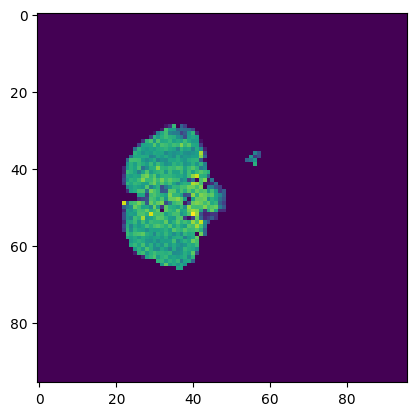

5


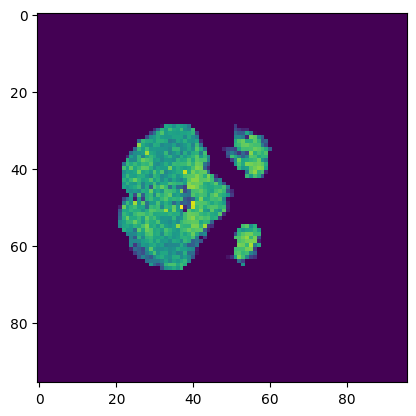

6


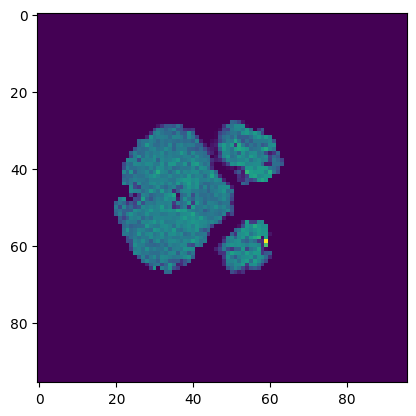

7


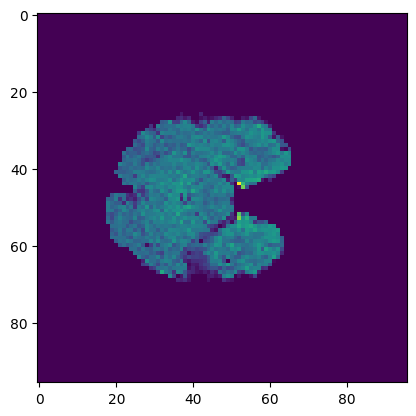

8


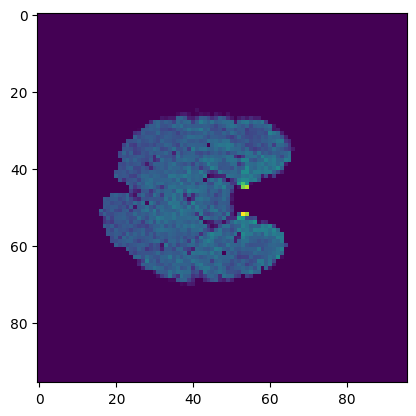

9


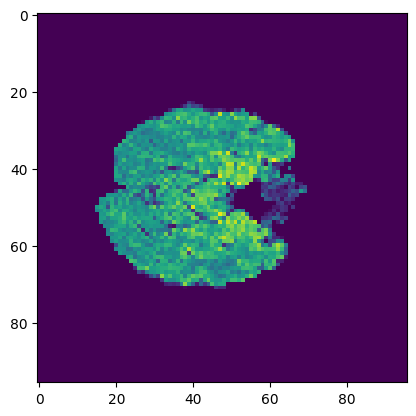

10


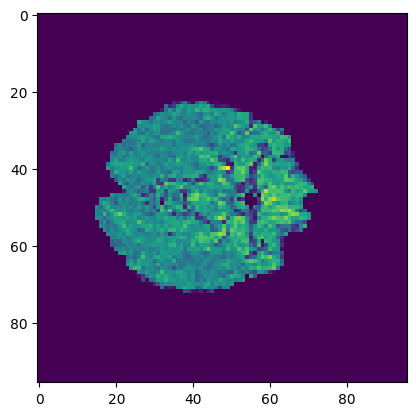

11


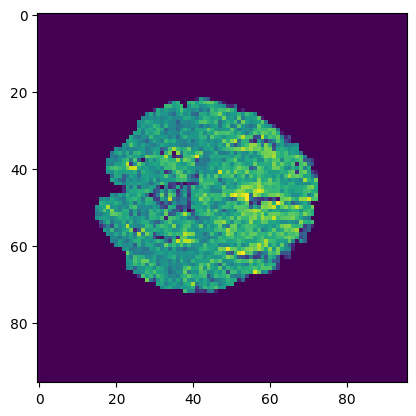

12


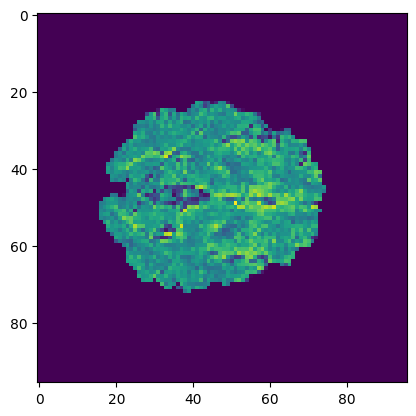

13


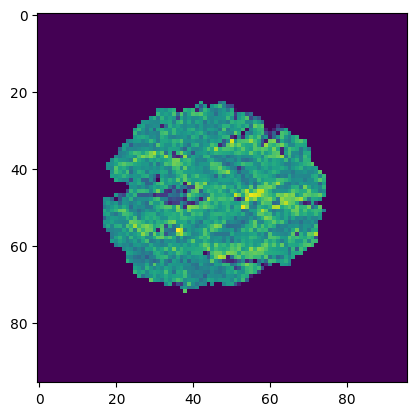

14


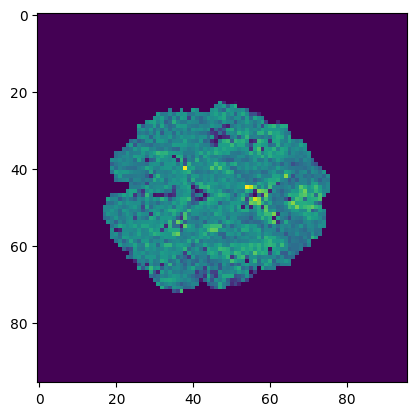

15


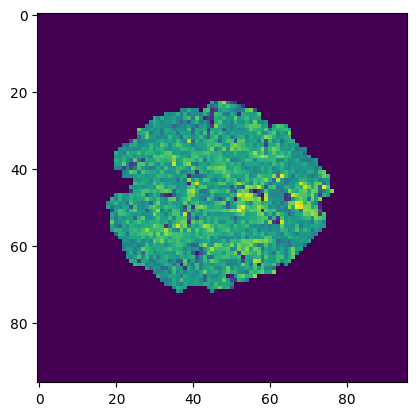

16


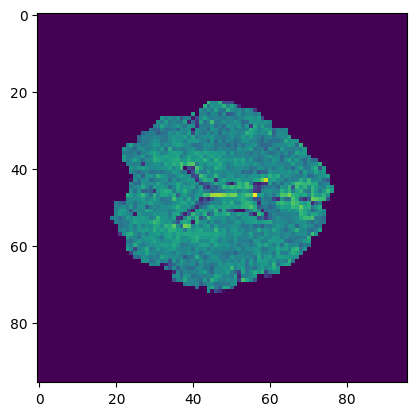

17


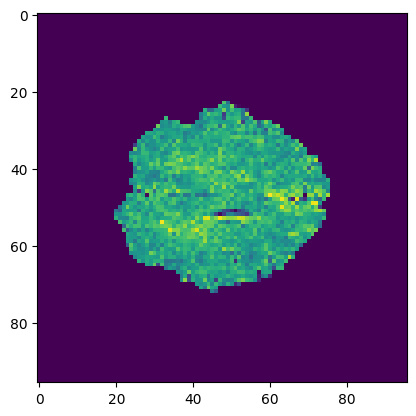

18


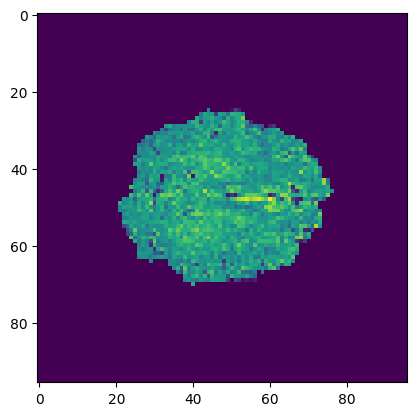

19


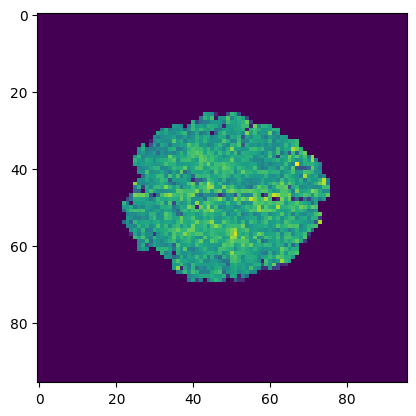

20


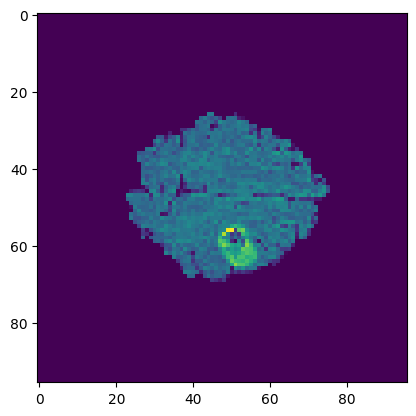

21


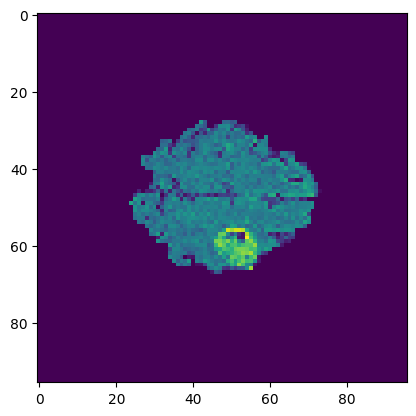

22


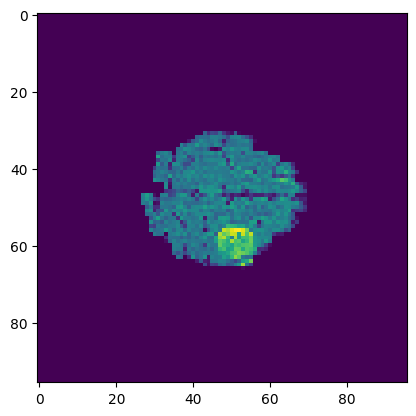

23


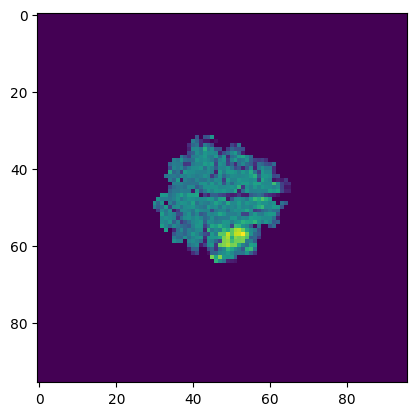

24


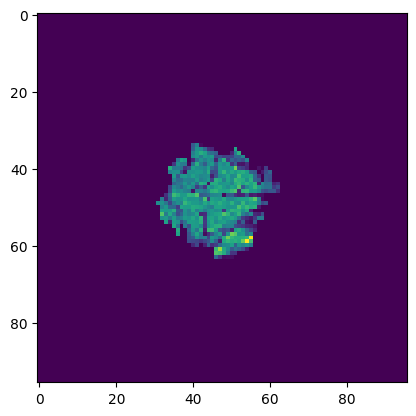

25


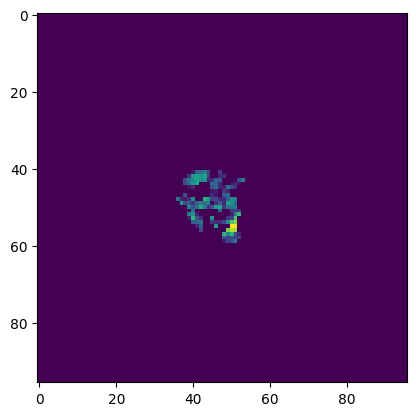

26


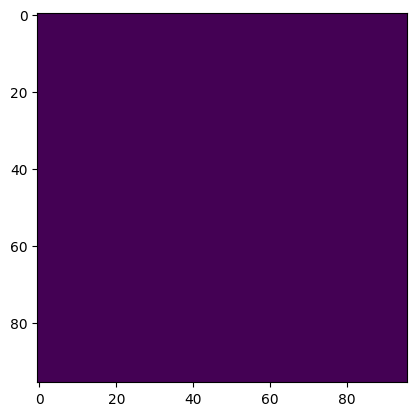

27


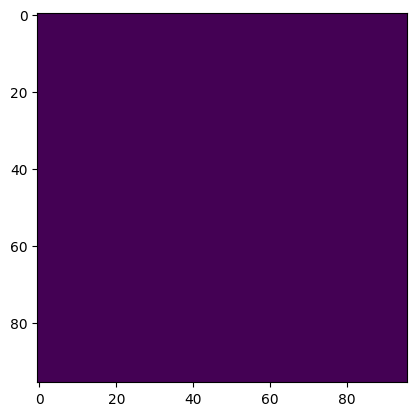

28


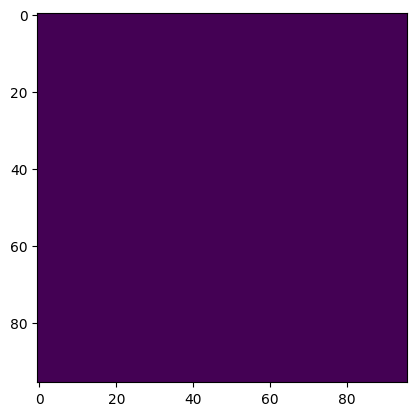

29


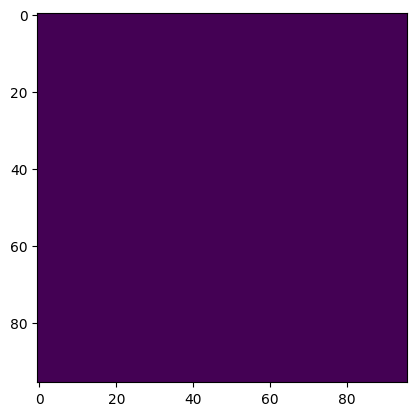

30


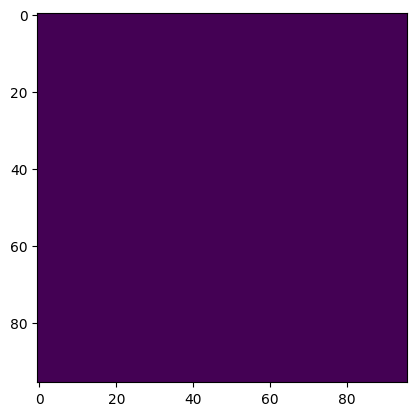

31


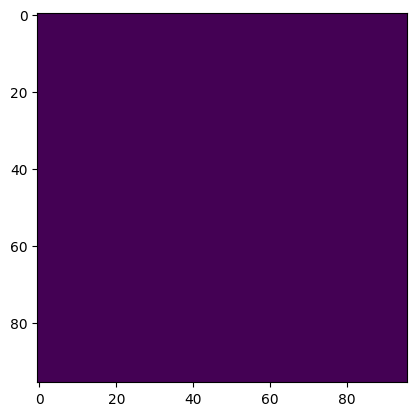

0


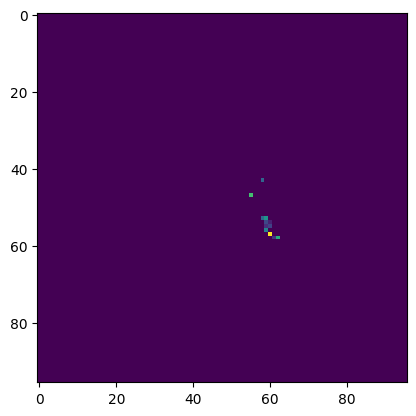

1


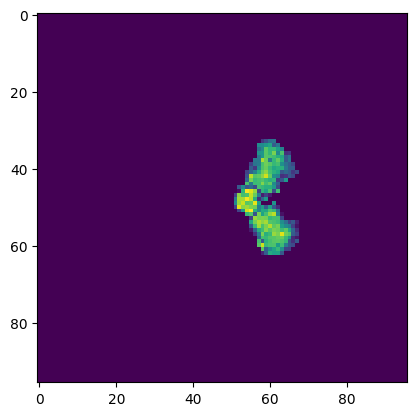

2


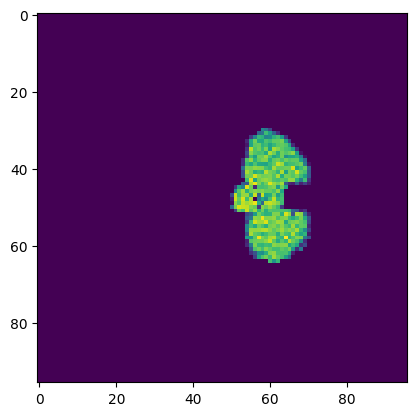

3


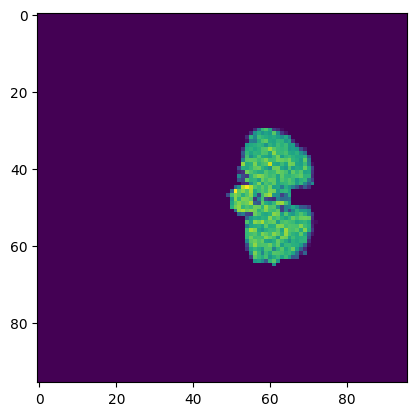

4


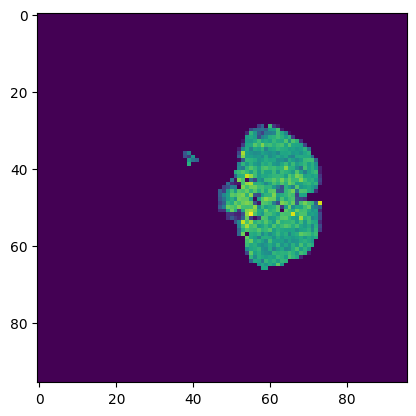

5


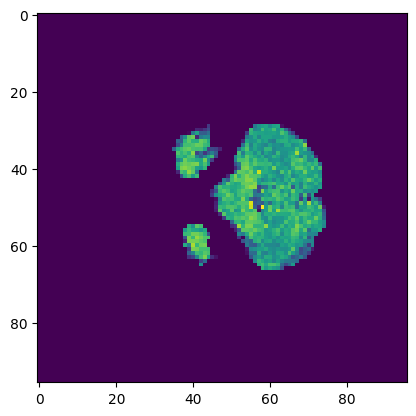

6


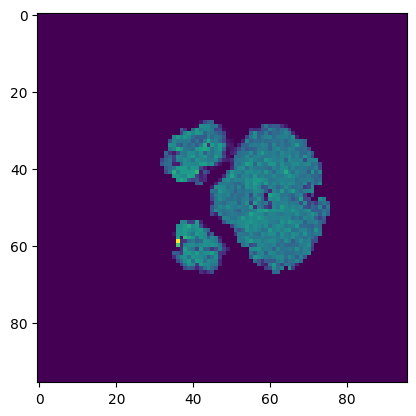

7


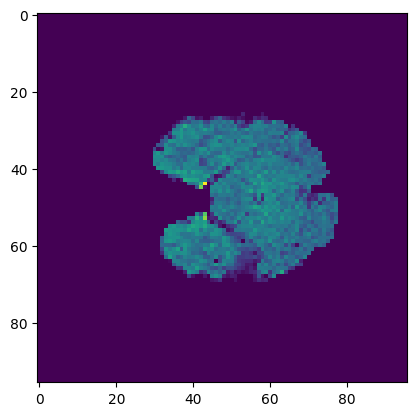

8


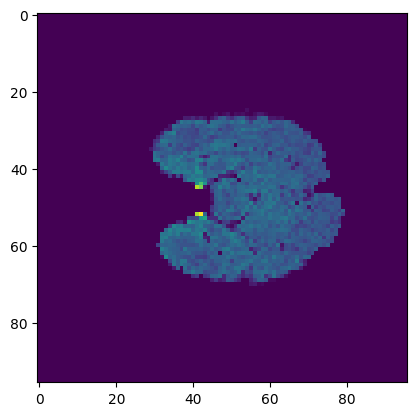

9


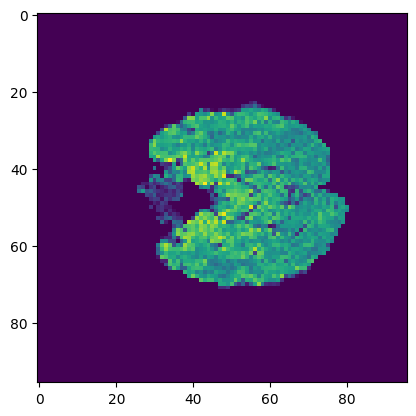

10


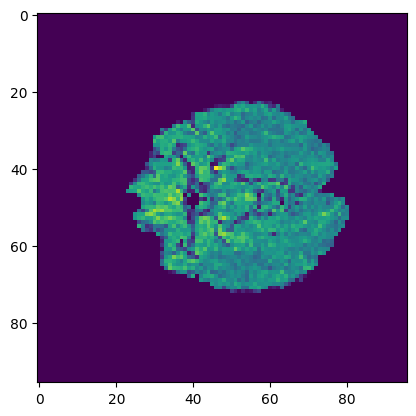

11


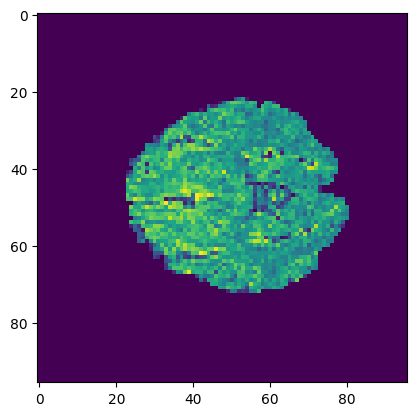

12


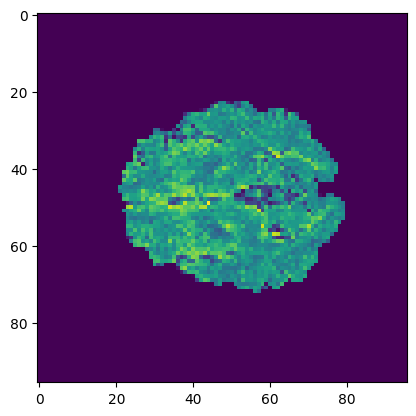

13


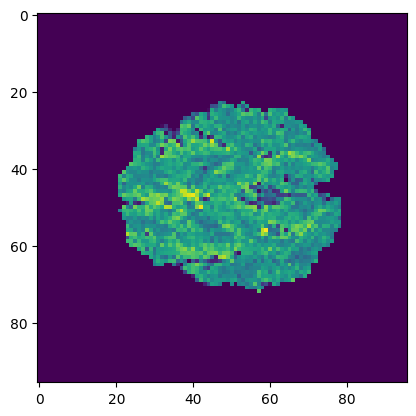

14


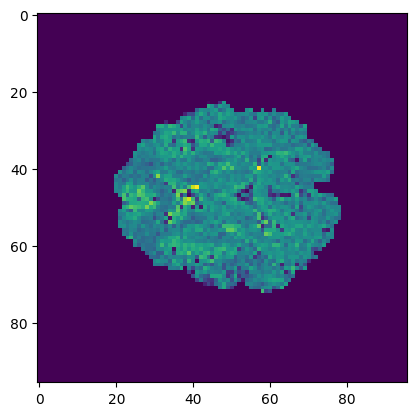

15


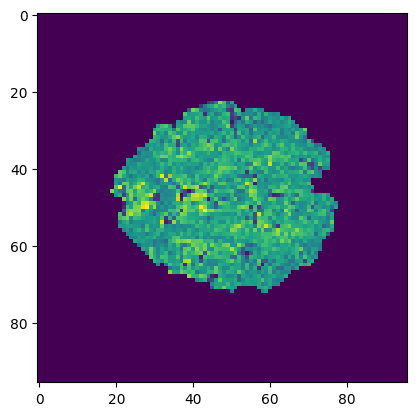

16


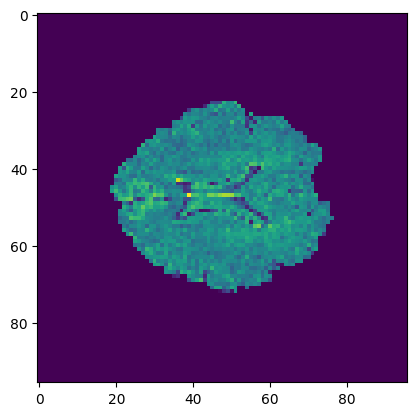

17


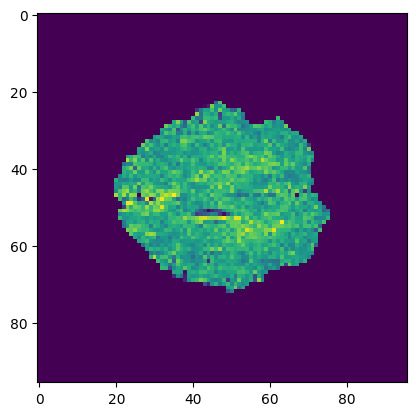

18


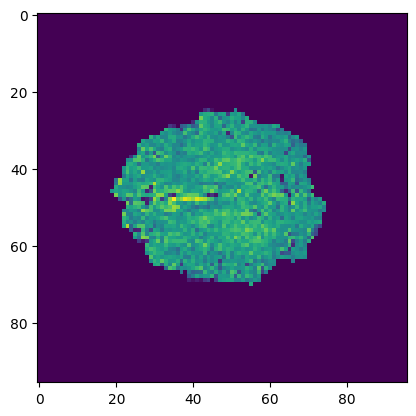

19


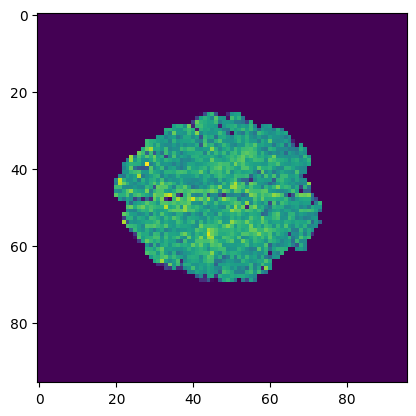

20


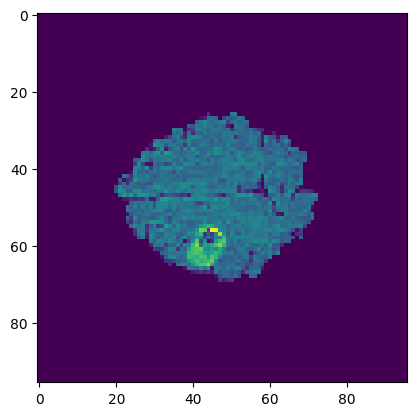

21


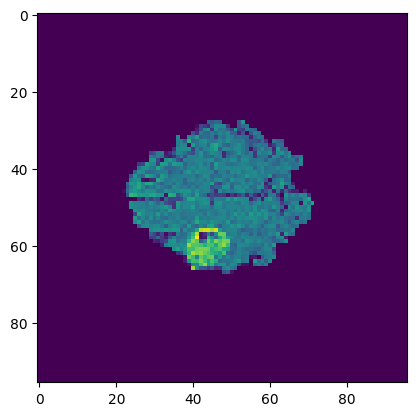

22


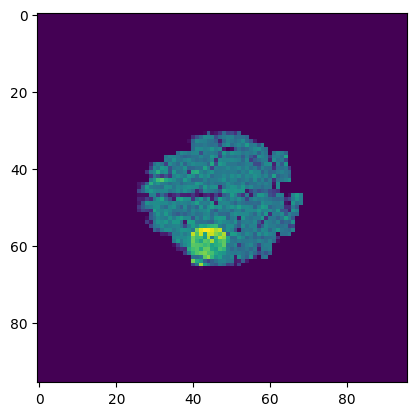

23


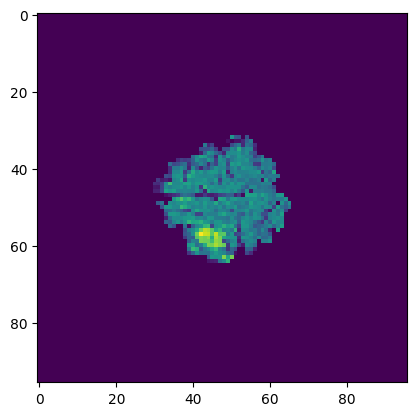

24


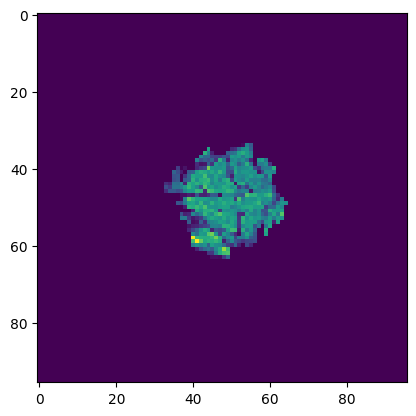

25


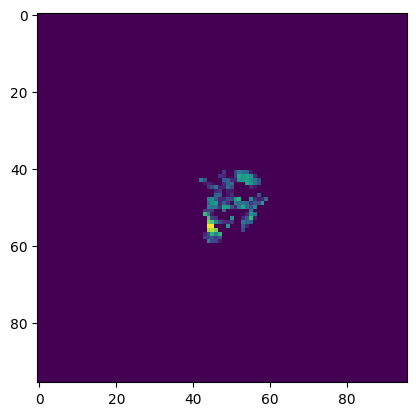

26


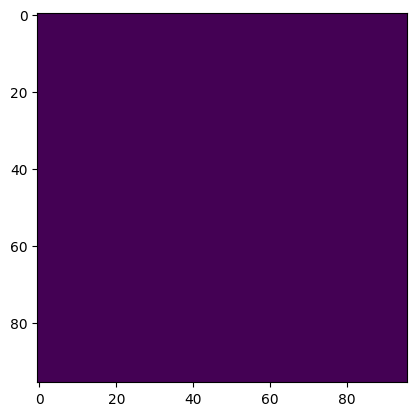

27


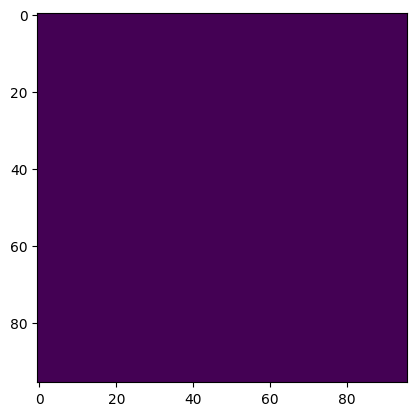

28


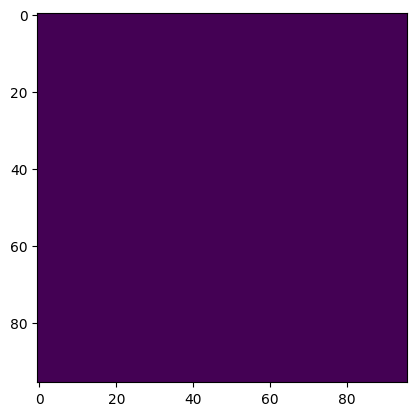

29


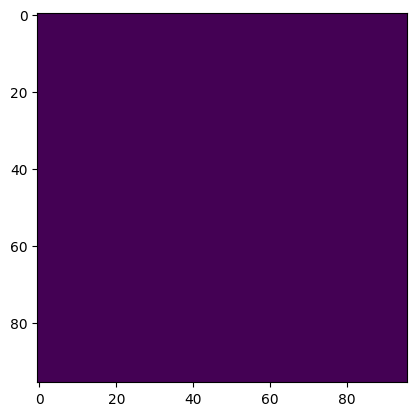

30


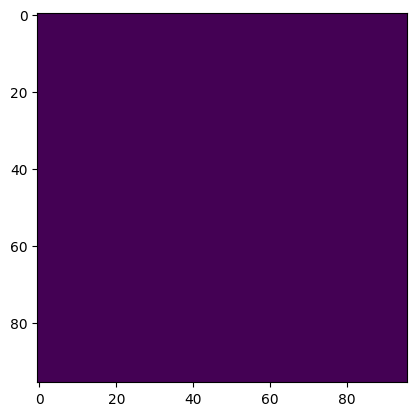

31


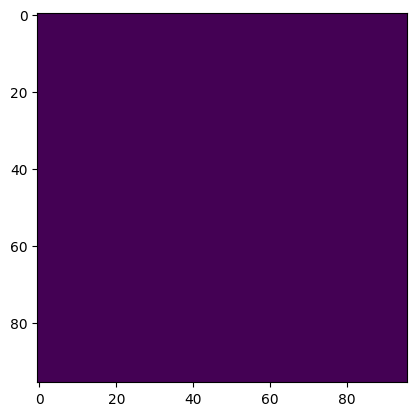

0


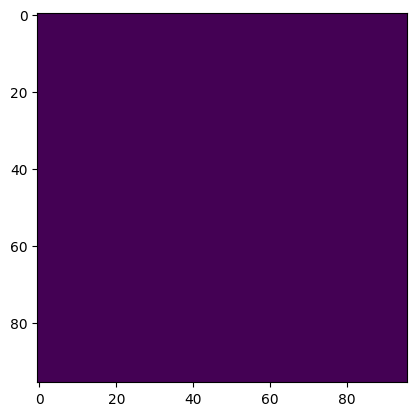

1


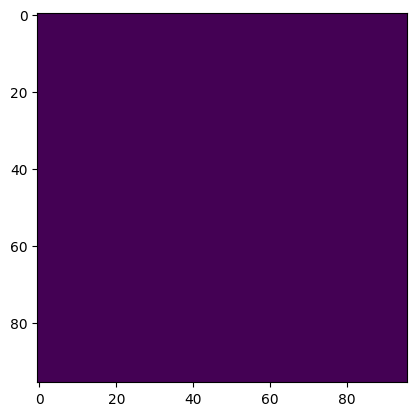

2


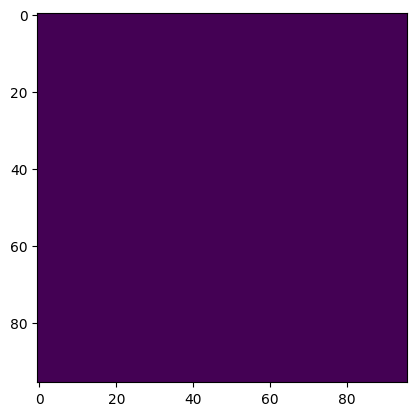

3


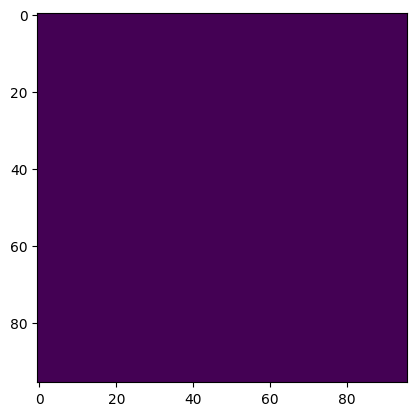

4


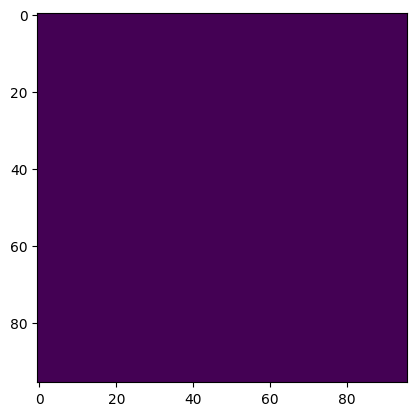

5


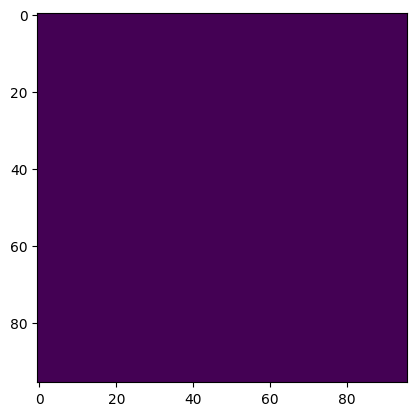

6


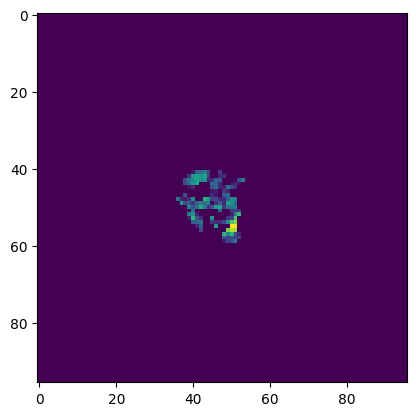

7


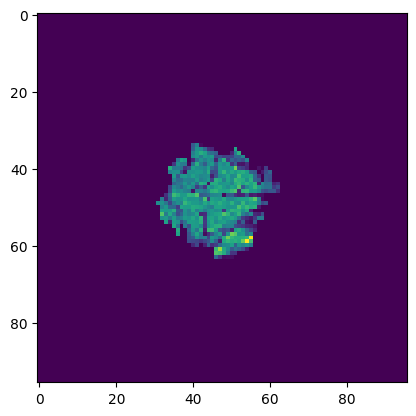

8


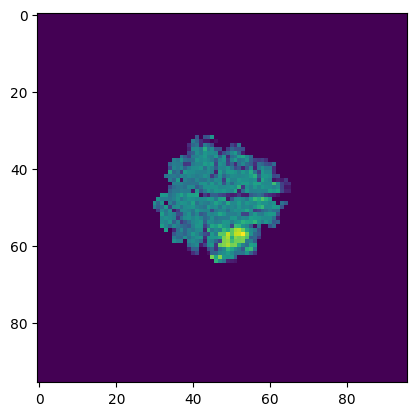

9


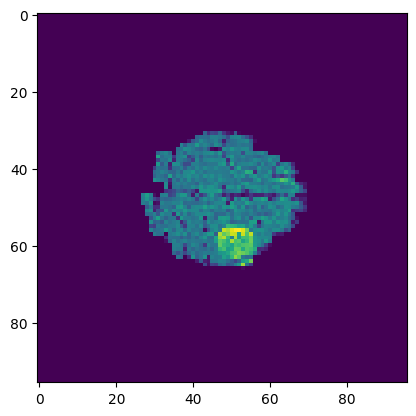

10


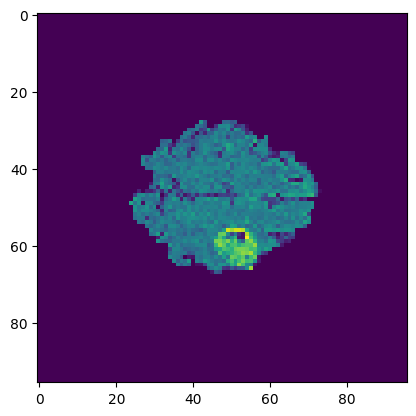

11


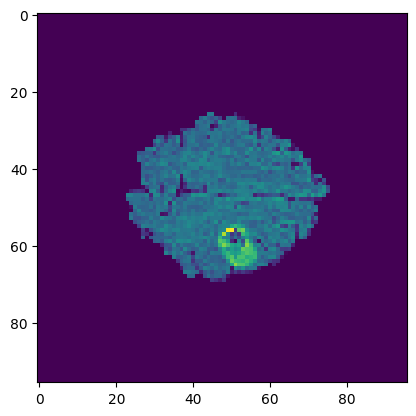

12


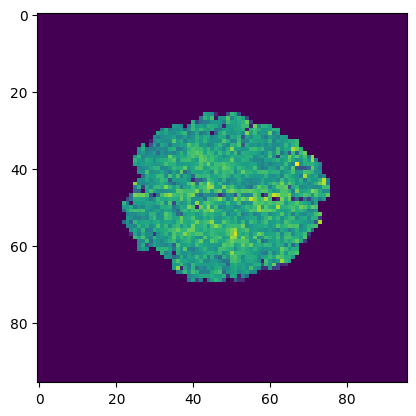

13


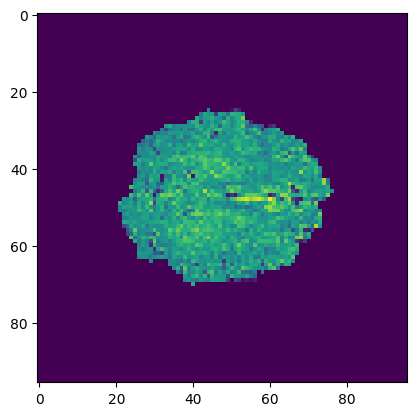

14


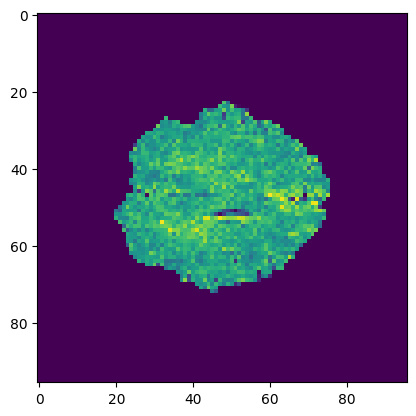

15


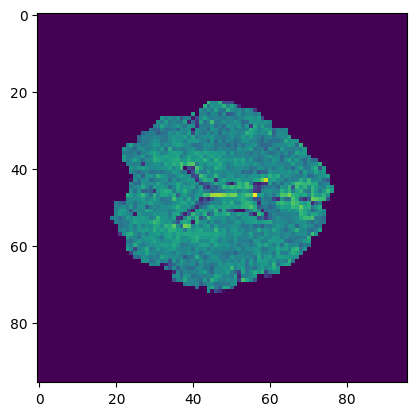

16


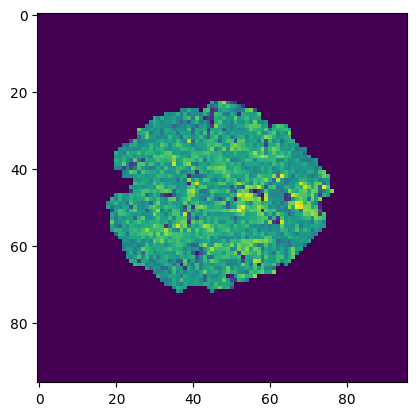

17


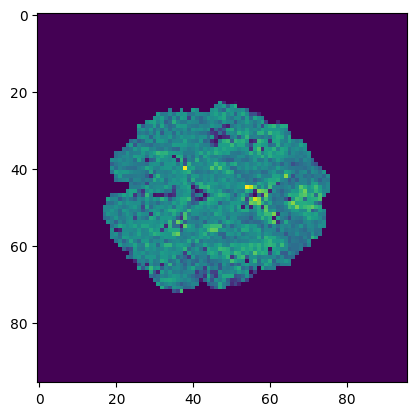

18


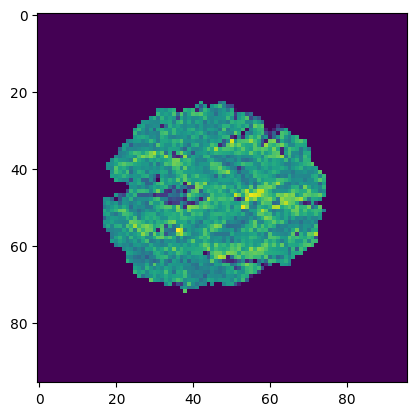

19


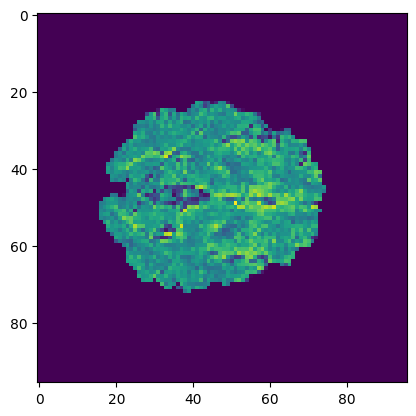

20


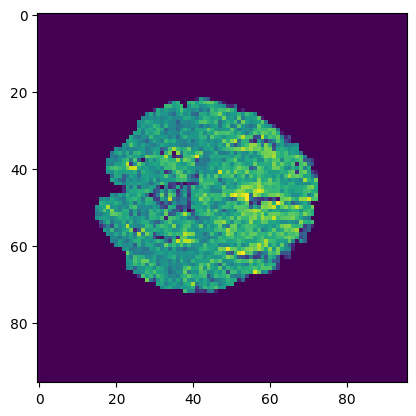

21


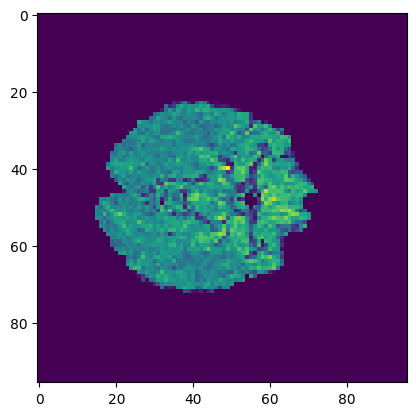

22


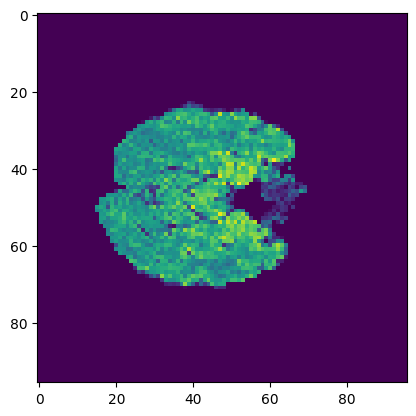

23


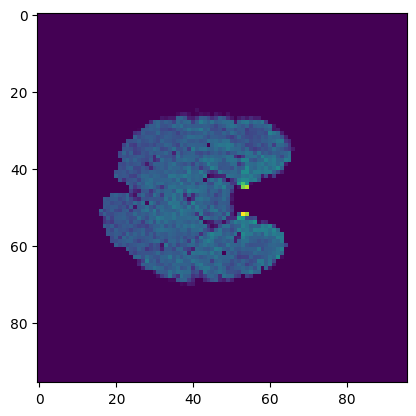

24


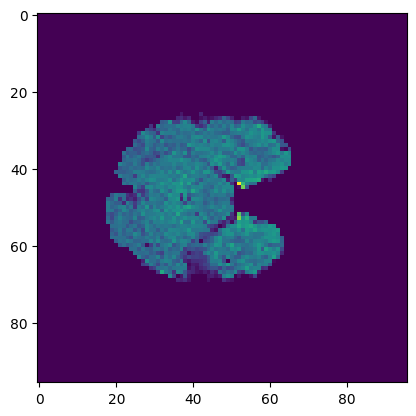

25


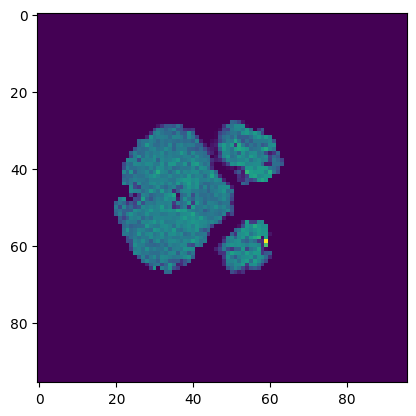

26


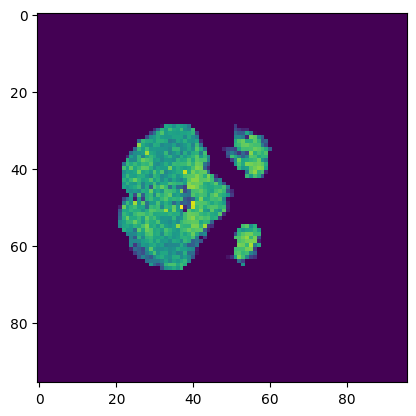

27


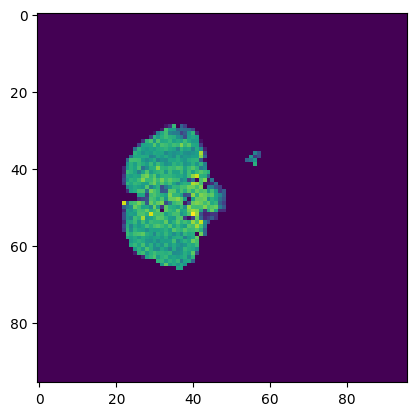

28


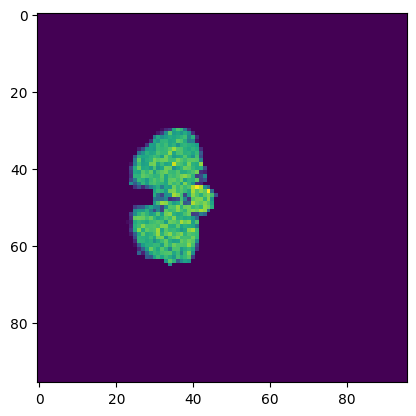

29


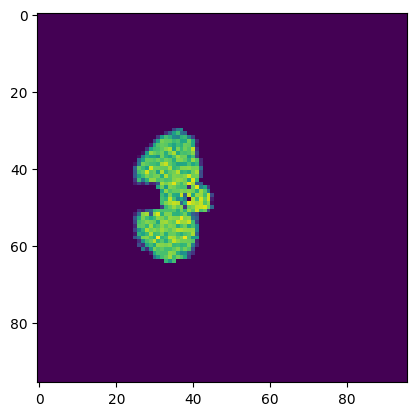

30


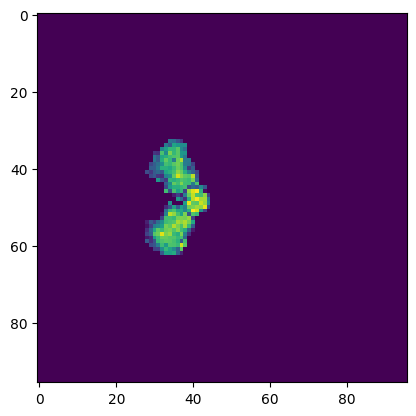

31


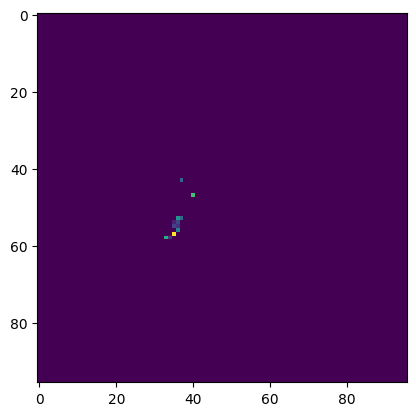

0


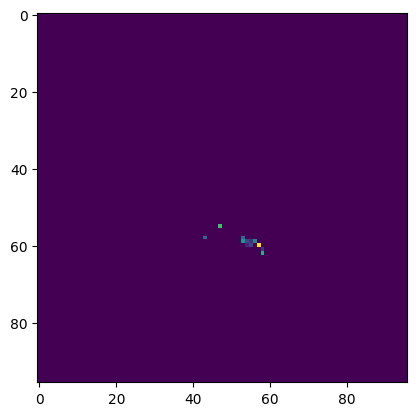

1


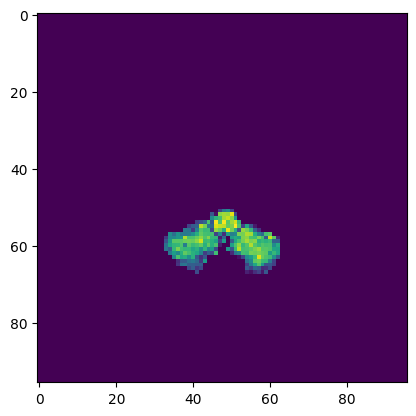

2


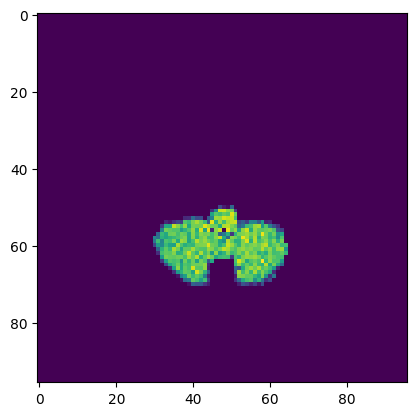

3


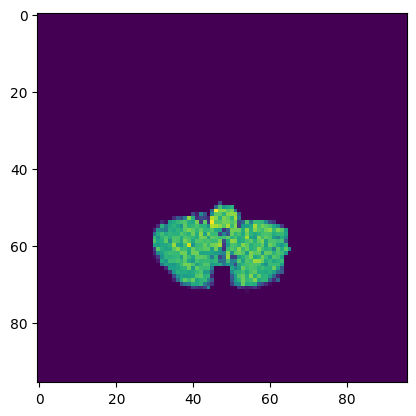

4


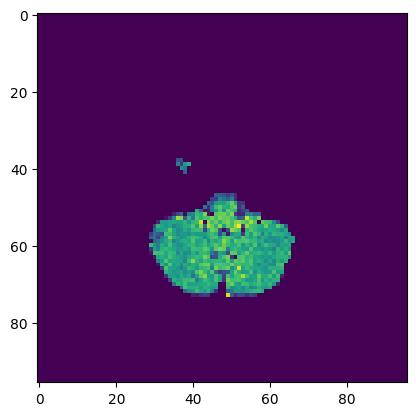

5


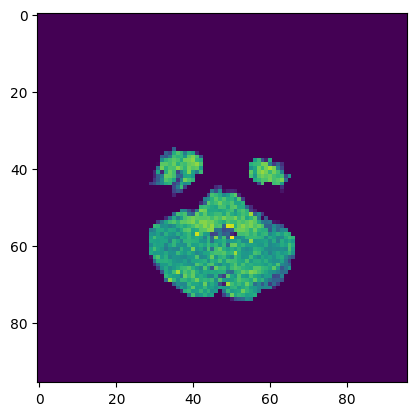

6


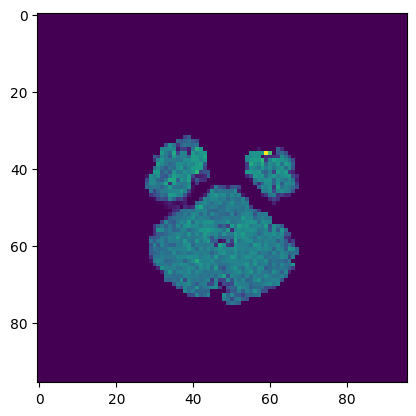

7


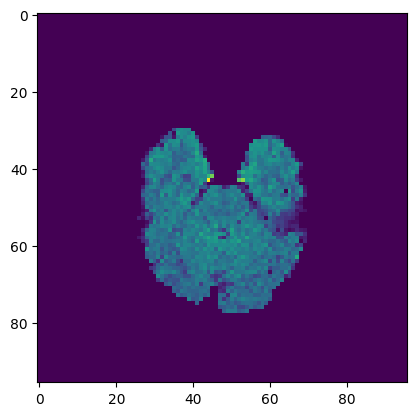

8


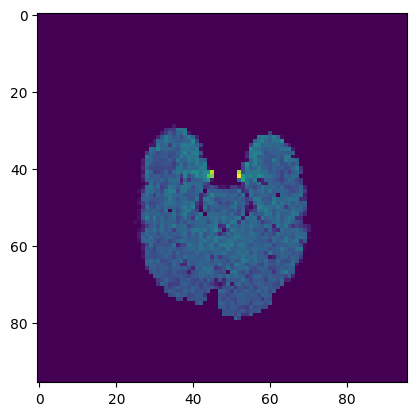

9


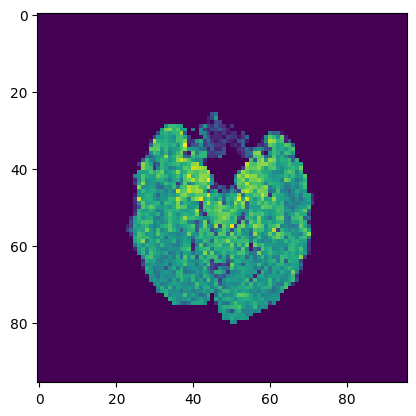

10


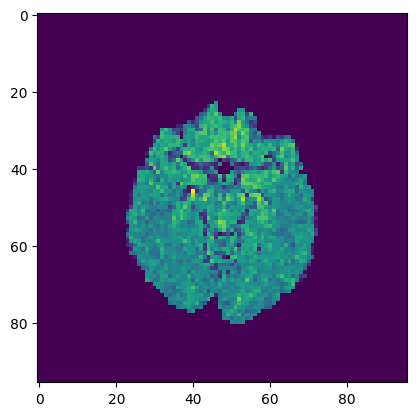

11


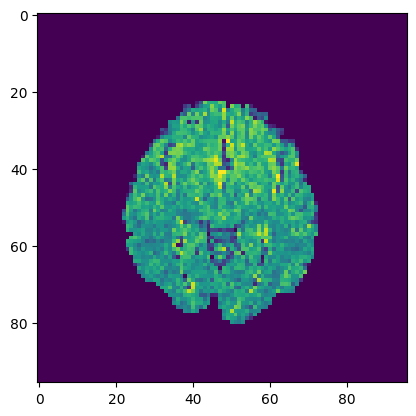

12


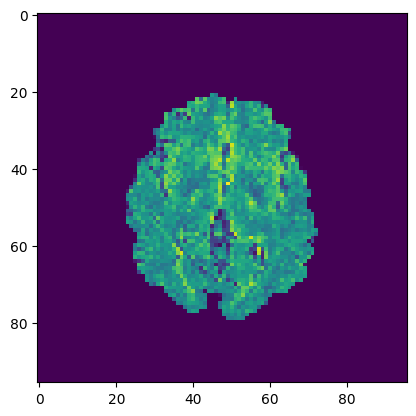

13


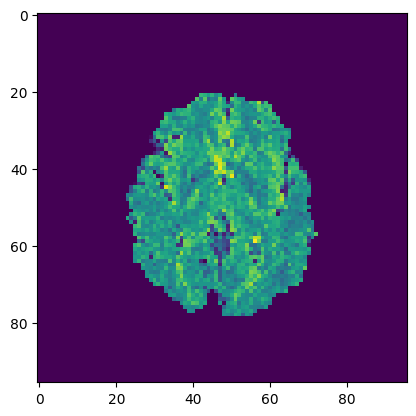

14


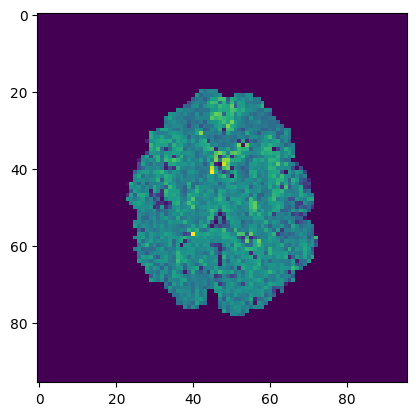

15


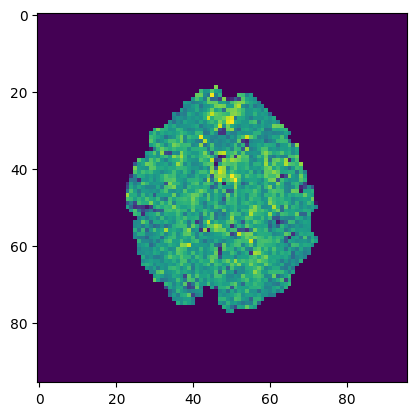

16


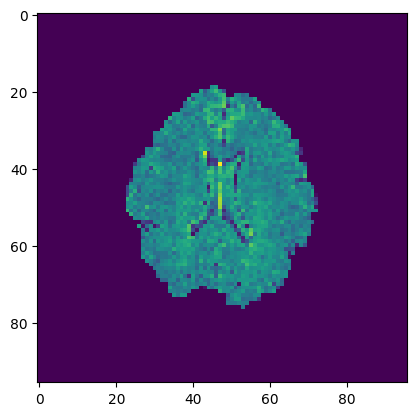

17


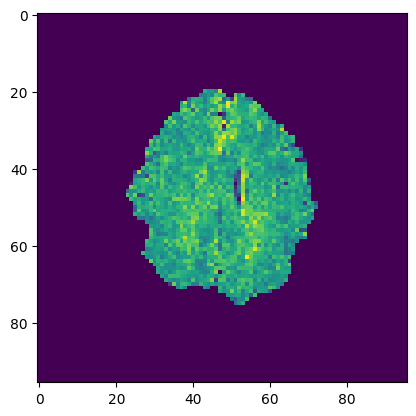

18


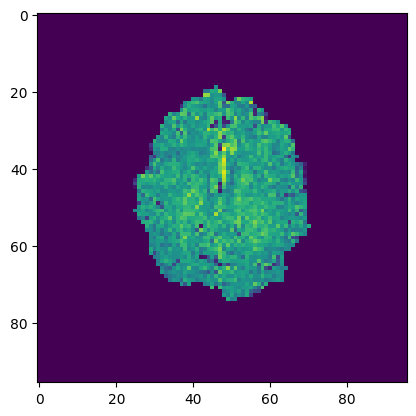

19


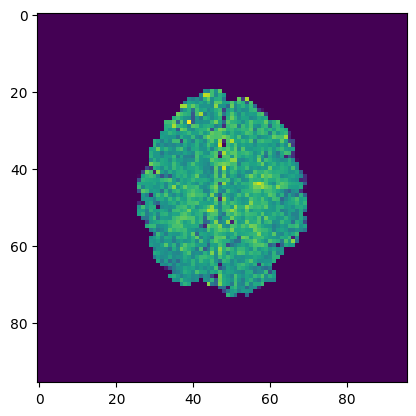

20


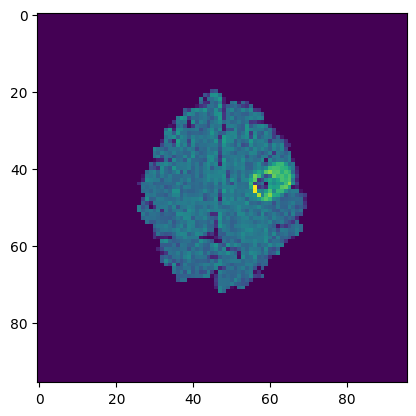

21


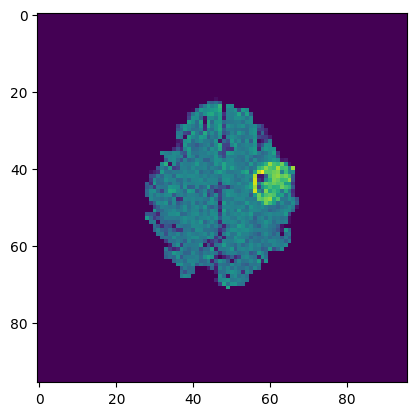

22


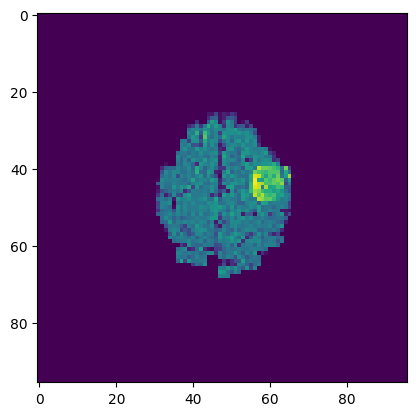

23


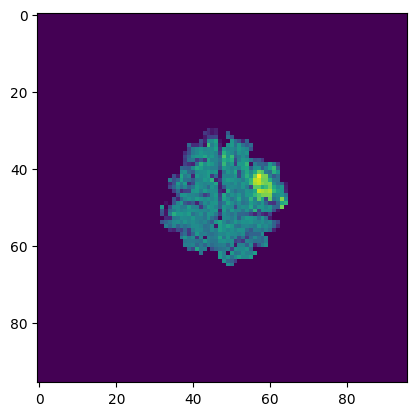

24


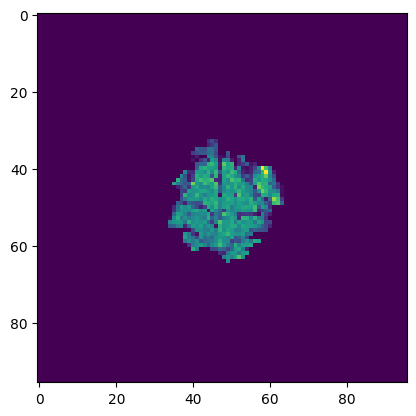

25


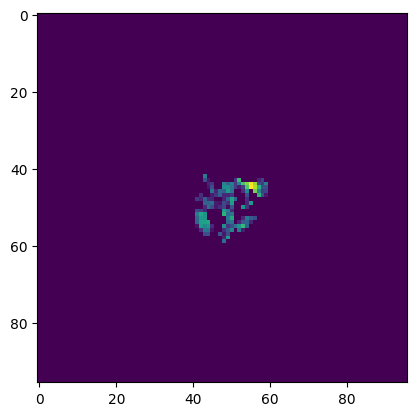

26


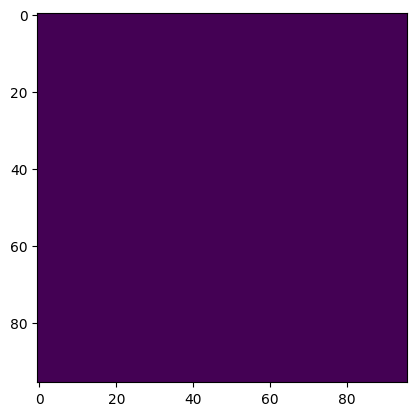

27


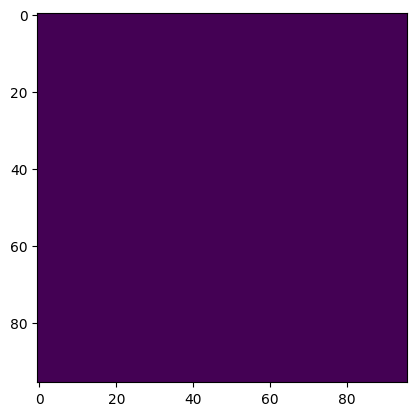

28


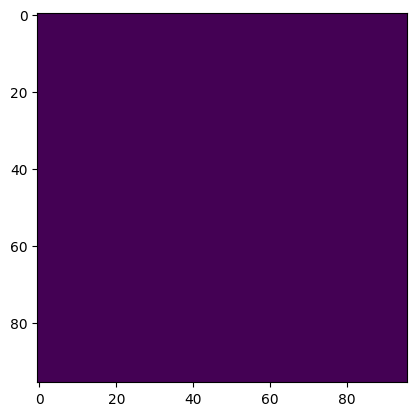

29


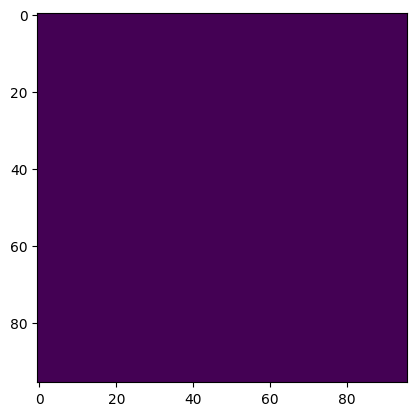

30


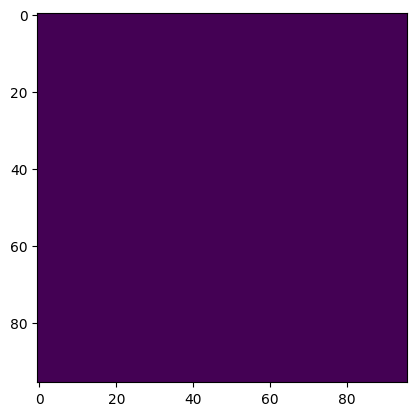

31


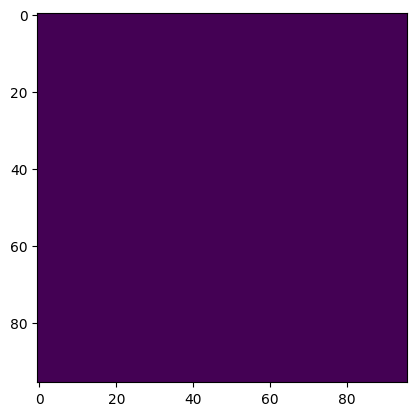

0


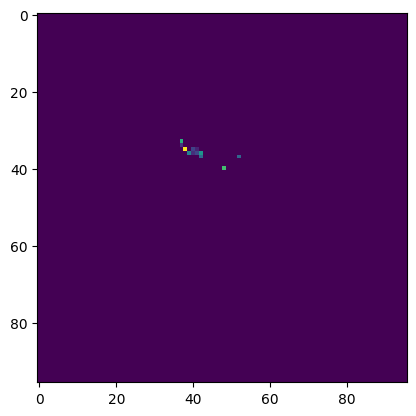

1


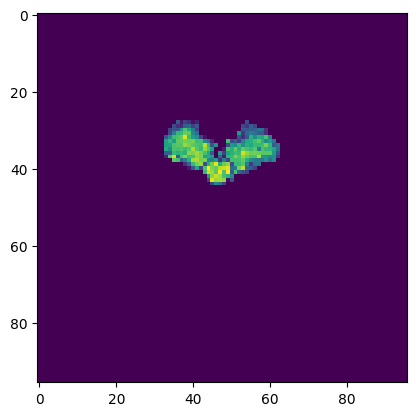

2


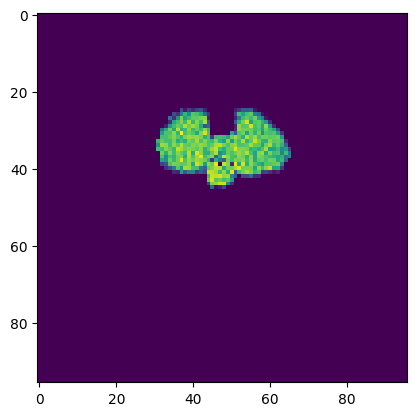

3


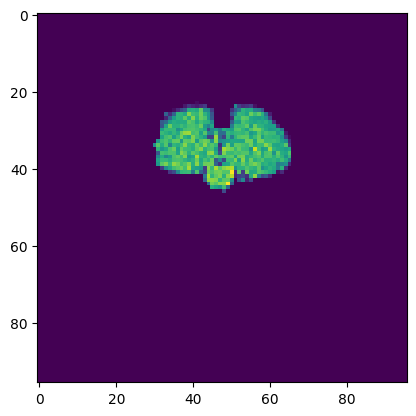

4


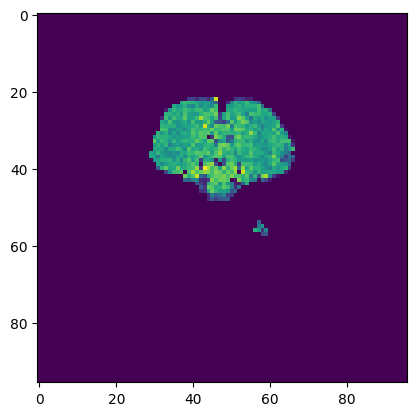

5


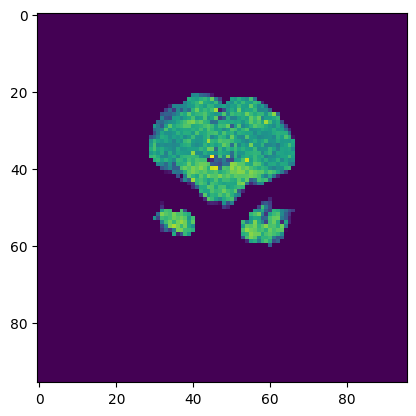

6


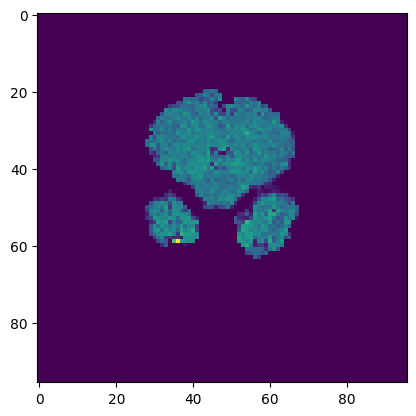

7


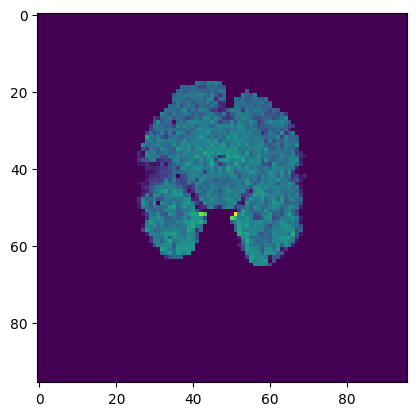

8


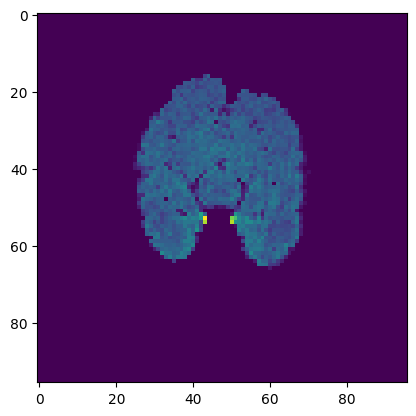

9


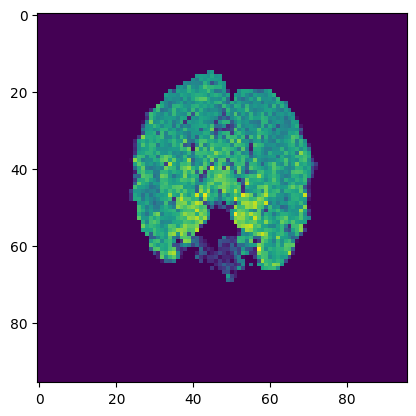

10


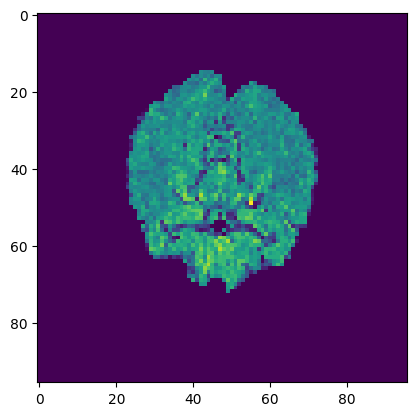

11


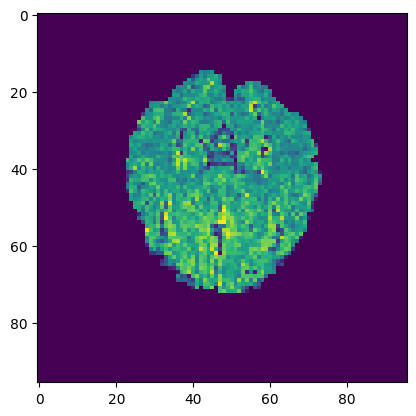

12


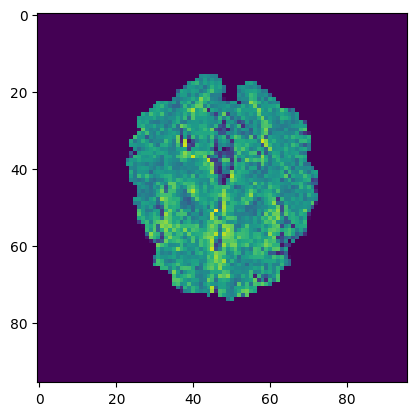

13


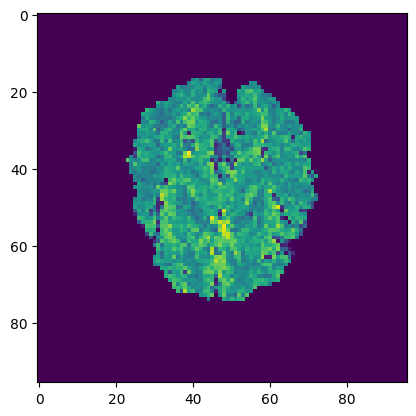

14


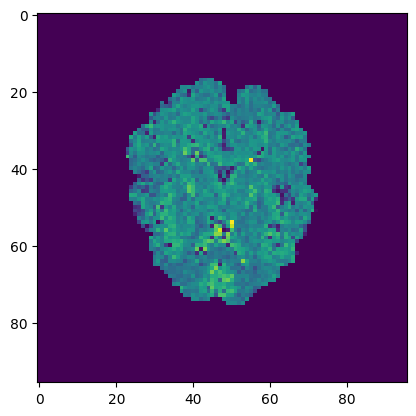

15


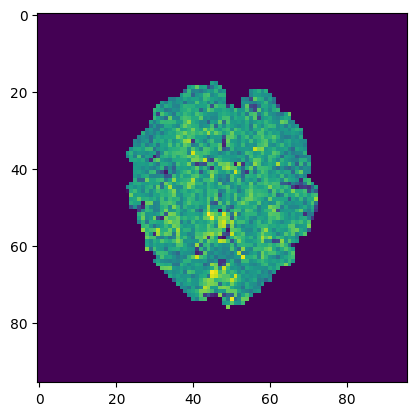

16


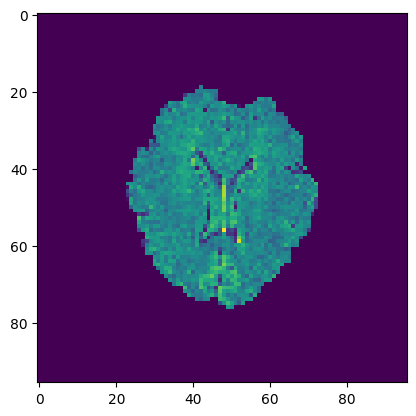

17


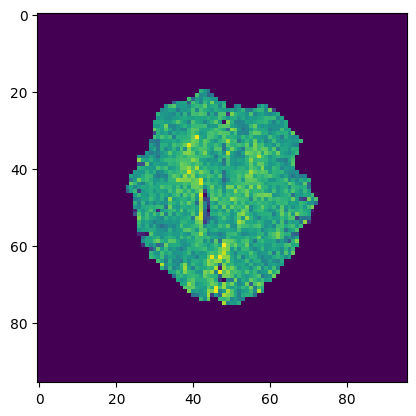

18


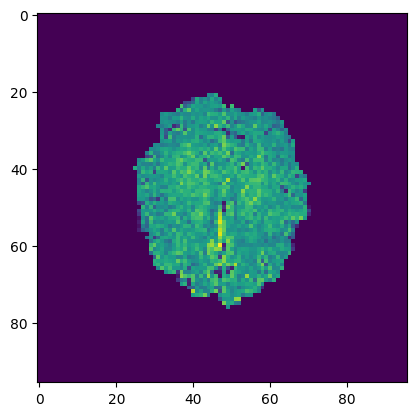

19


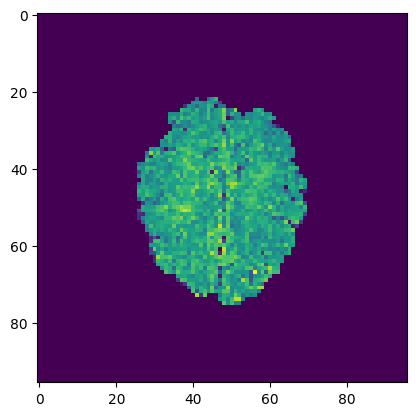

20


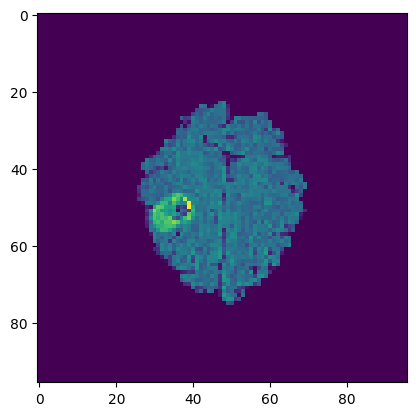

21


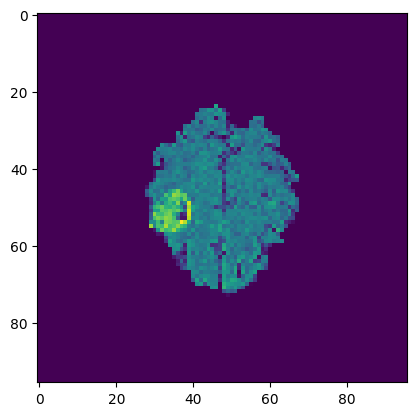

22


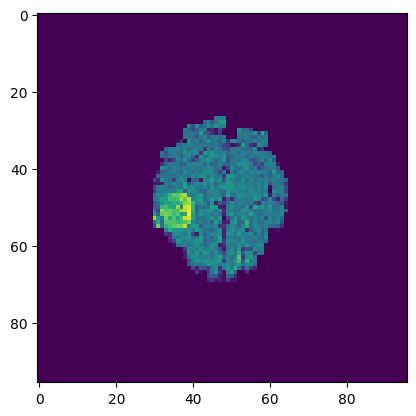

23


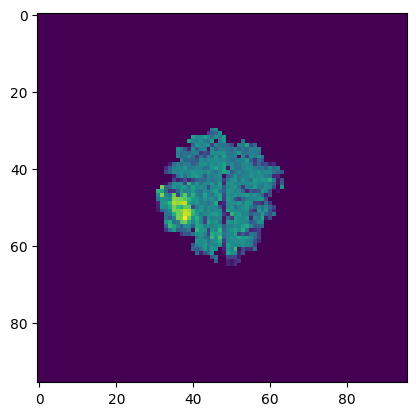

24


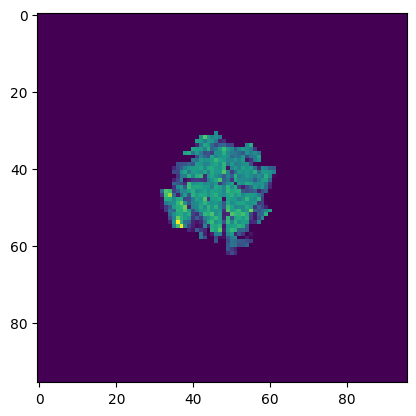

25


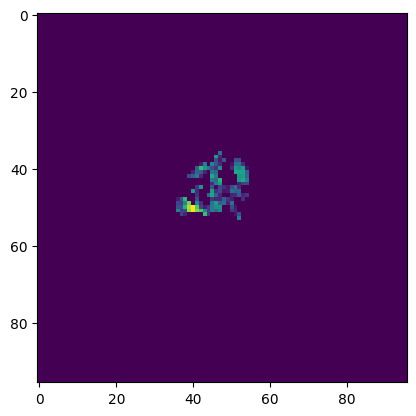

26


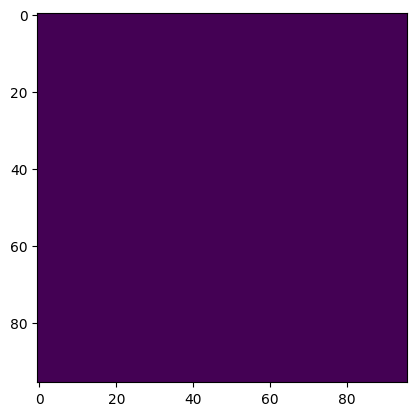

27


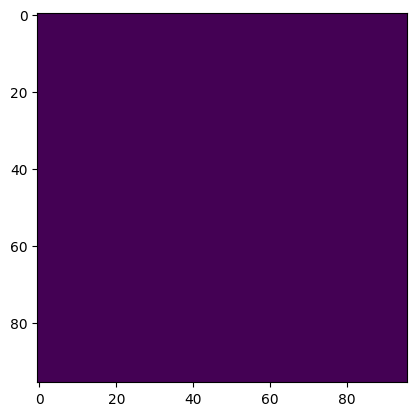

28


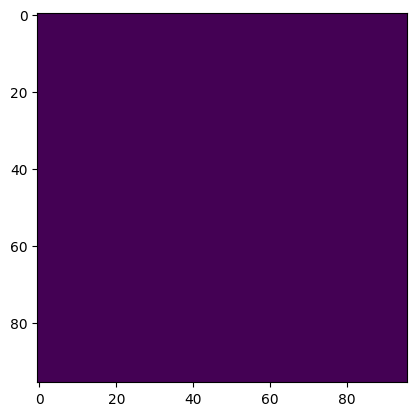

29


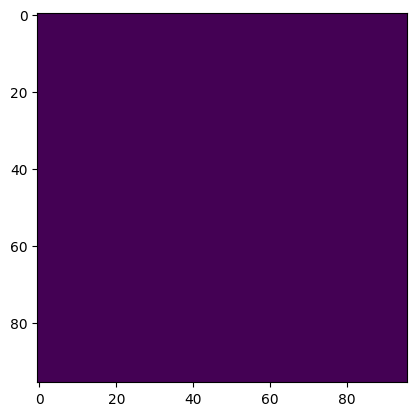

30


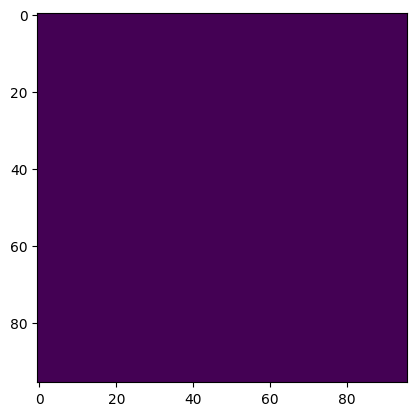

31


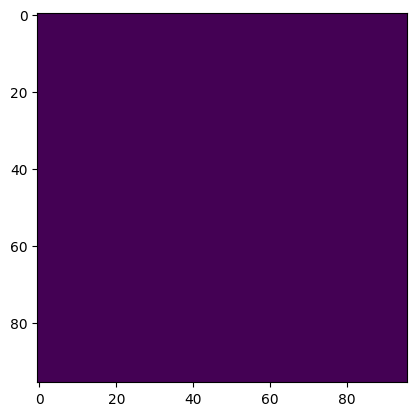

In [118]:
print(augmented_tr_labels)
for a in range(len(transformed_te_images[:5])):
  test = transformed_te_images[a]
  for i in range(test.shape[1]):
    print(i)
    brain_slice = test[:, i, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
    plt.imshow(brain_slice)
    plt.show()
    plt.close()
    continue

In [119]:
training_data = make_dataset(transformed_tr_images, augmented_tr_labels) # make training dataset
validation_data = make_dataset(transformed_v_images, augmented_v_labels) # make training dataset
testing_data = make_dataset(transformed_te_images, augmented_te_labels) # make training dataset

In [120]:
# However, for validation_batch_size and test_batch_size, you should pick the largest batch size that your hardware can handle
# without running out of memory and crashing. Finding this is usually a simple trial and error process.
# The larger your batch size at inference time, the faster it will be, since more inputs can be processed in parallel.
# https://stackoverflow.com/questions/54413160/training-validation-testing-batch-size-ratio

from torch import utils

# generate dataloaders
trainloader = torch.utils.data.DataLoader(training_data, batch_size=5, shuffle = True)

validationloader = torch.utils.data.DataLoader(validation_data, batch_size=5, shuffle = True) 

testloader = torch.utils.data.DataLoader(testing_data, batch_size=1, shuffle = True) # trying to have the highest batch size possible

### checking that dataloaders are correct 

5 5
torch.Size([32, 96, 96])
tensor([0, 0, 2, 0, 0])
96


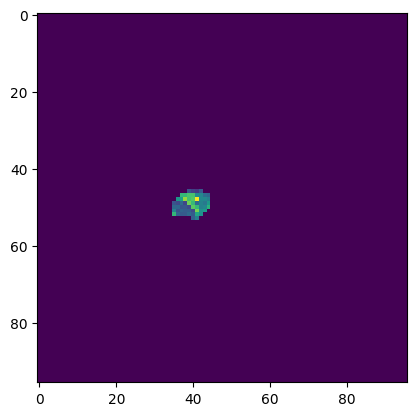

96


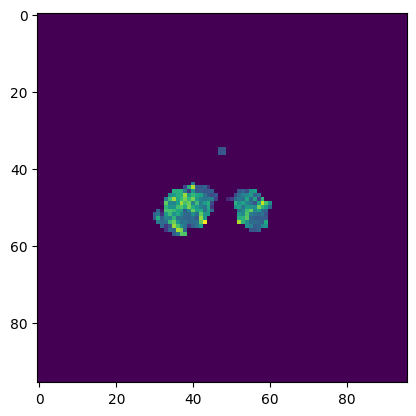

96


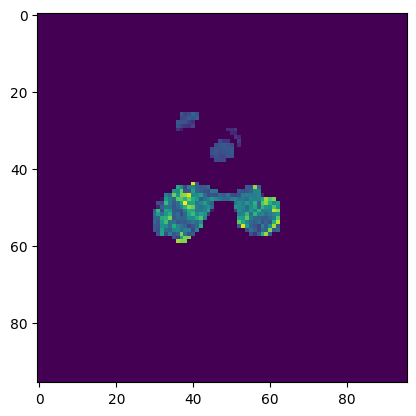

96


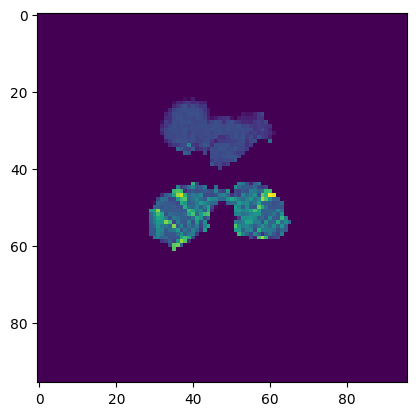

96


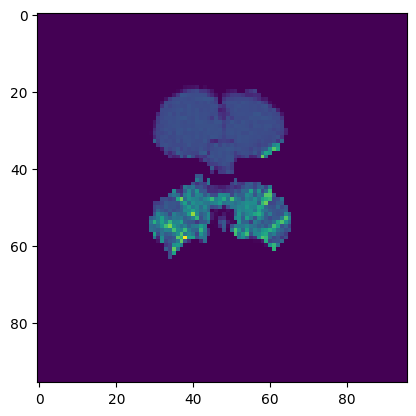

96


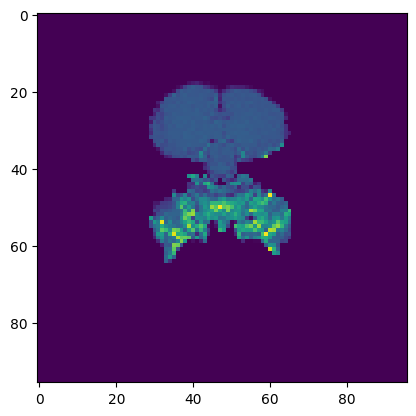

96


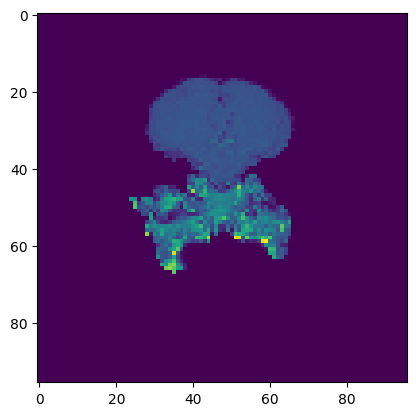

96


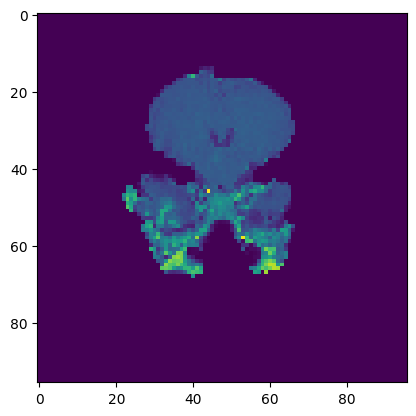

96


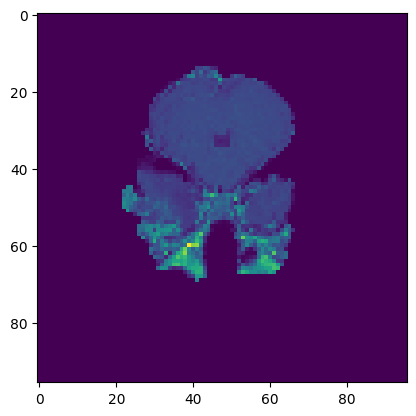

96


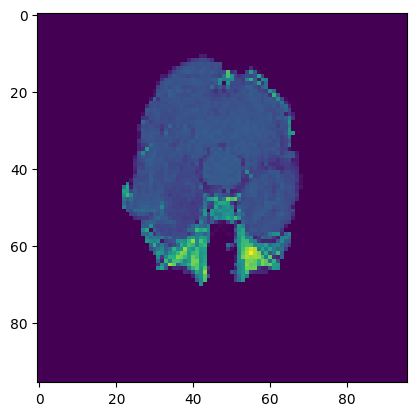

96


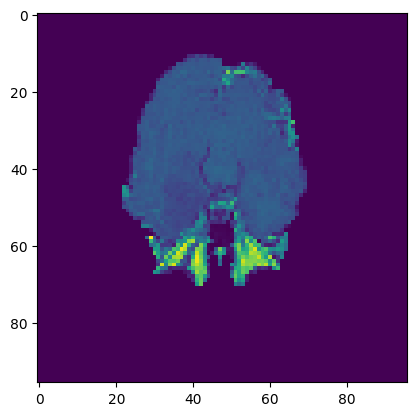

96


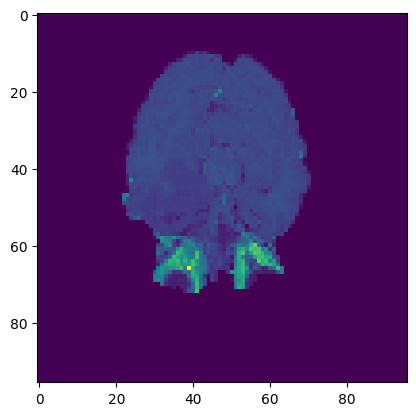

96


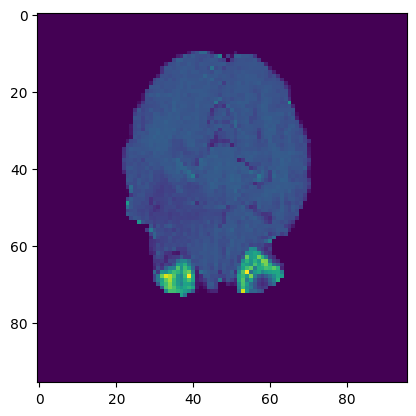

96


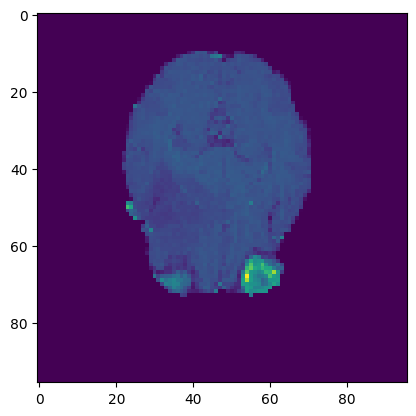

96


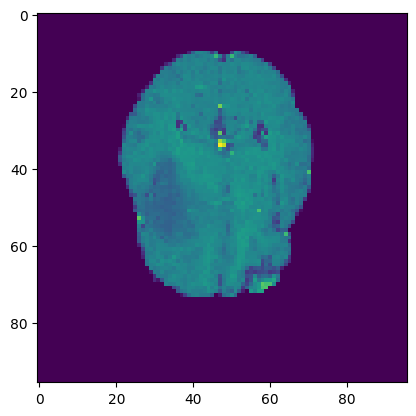

96


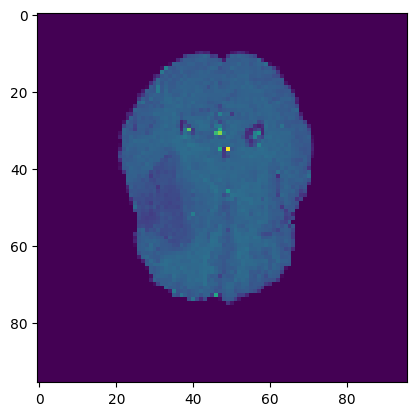

96


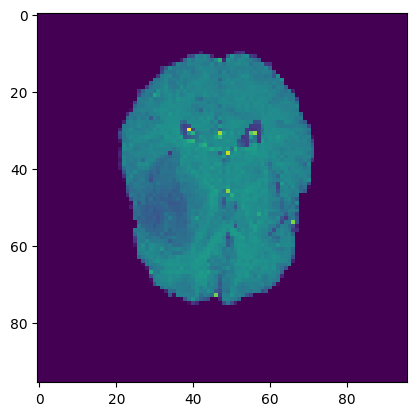

96


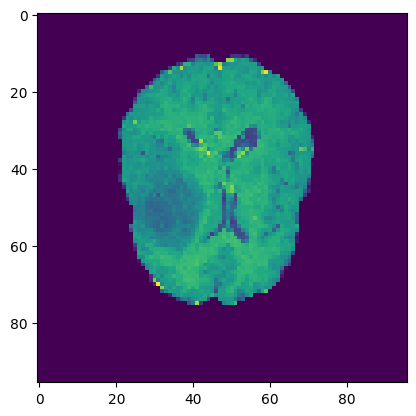

96


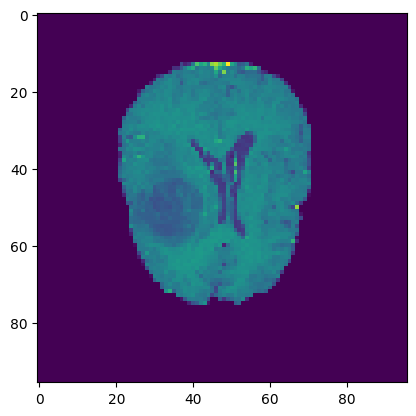

96


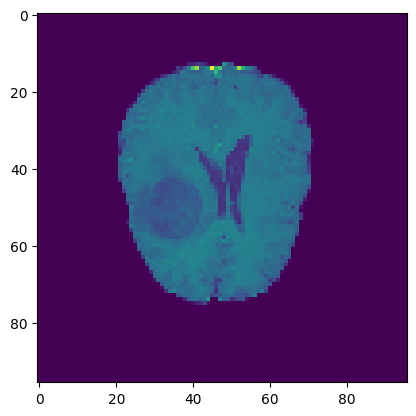

96


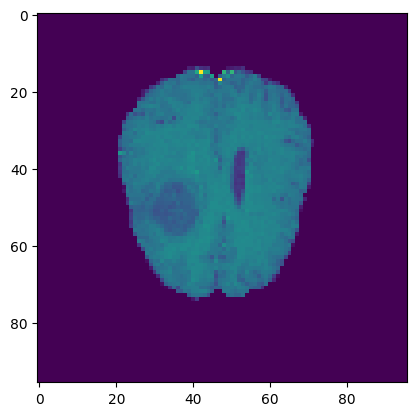

96


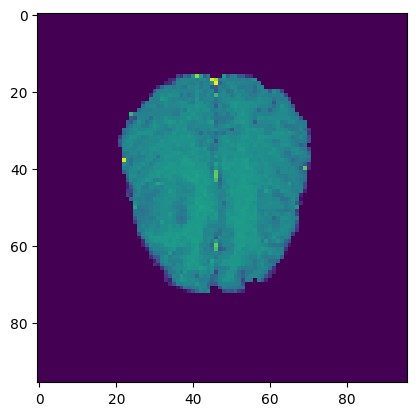

96


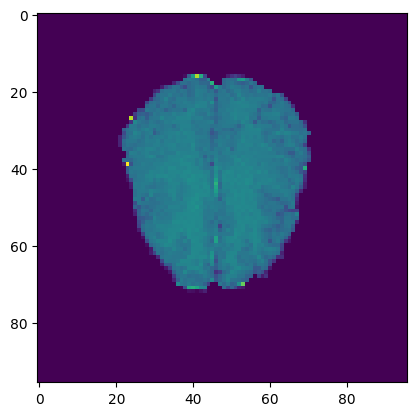

96


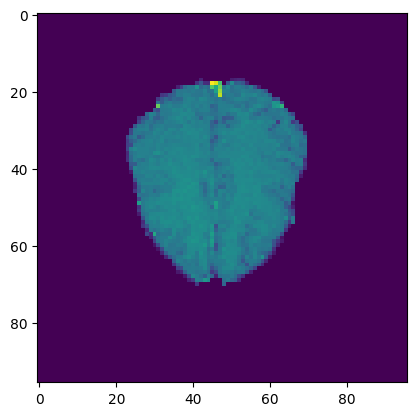

96


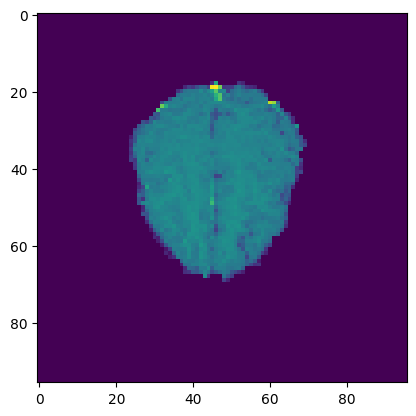

96


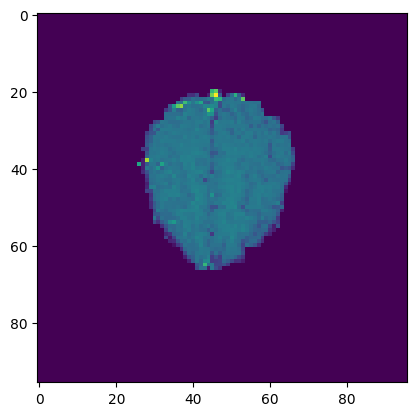

96


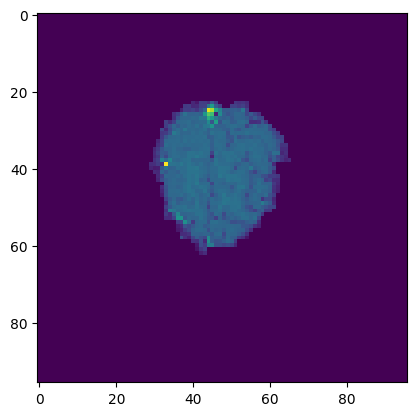

96


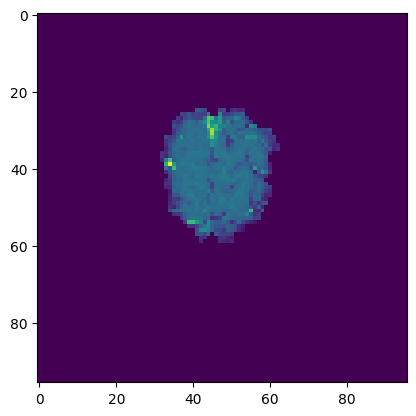

96


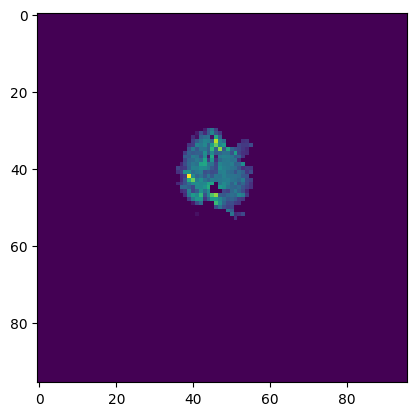

96


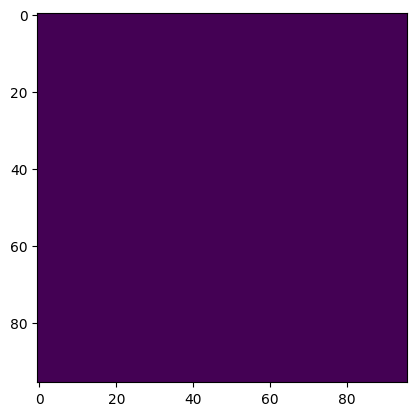

96


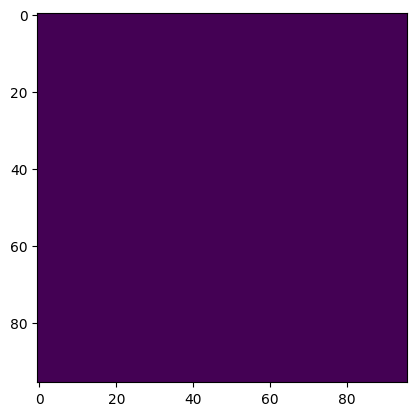

96


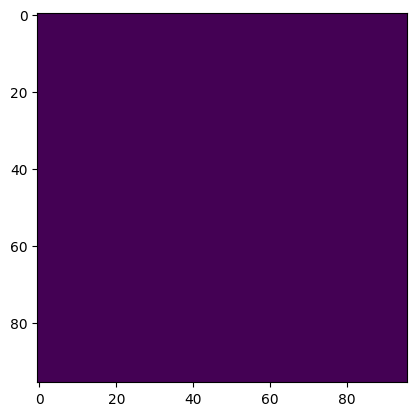

In [121]:
trimages, trlabels = next(iter(trainloader)) # every time you run this, it gives you new image and new label (since it also shuffles)
print(len(trimages), len(trlabels))

trimage = trimages[0].squeeze()
trimage = trimage.permute(1,2,0) # it should be (1,2,0) not (1,0,2) because the dimensions change when converting from numpy array to torch tensor

print(trimage.shape)
print(trlabels)

for i in range(trimage.shape[0]):
  print(trimage.shape[1])
  brain_slice = trimage[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()

torch.Size([32, 96, 96])
tensor(0)


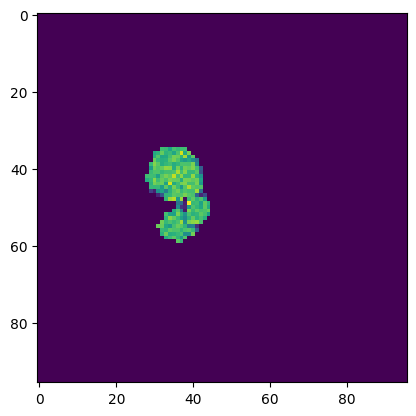

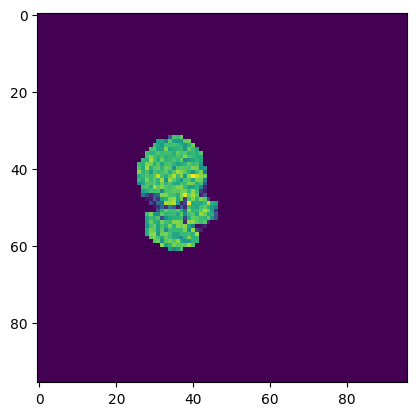

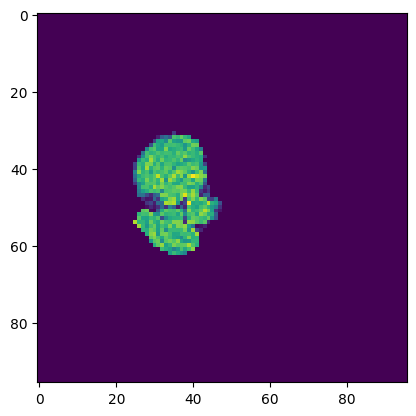

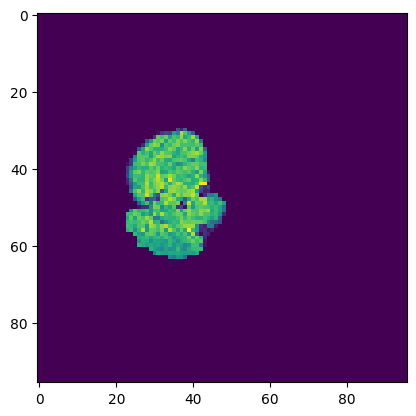

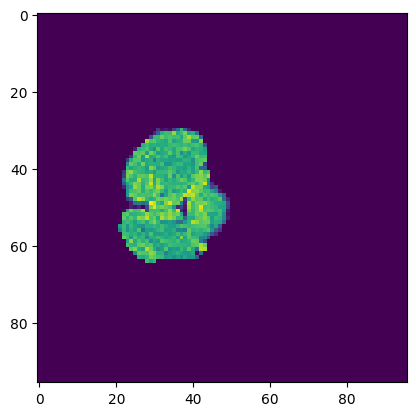

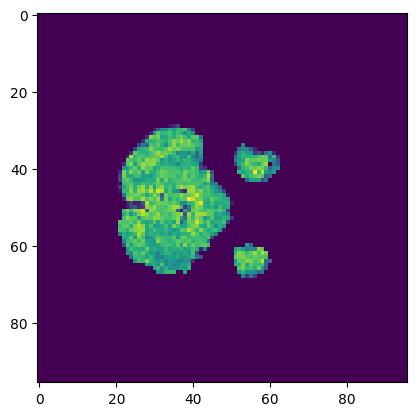

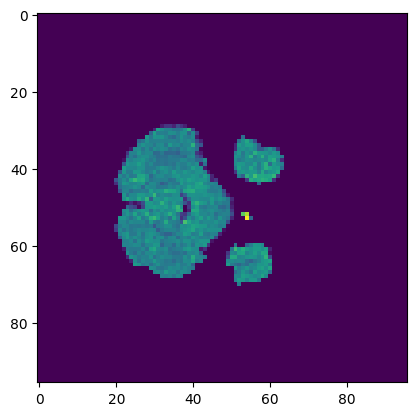

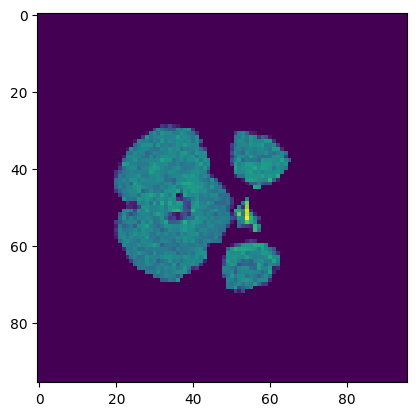

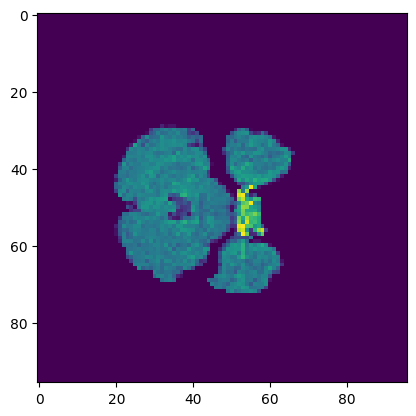

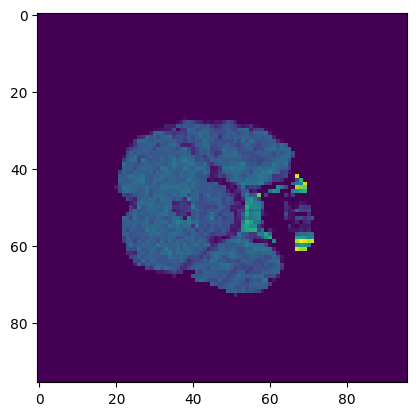

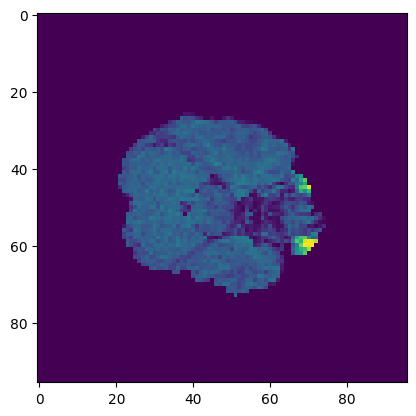

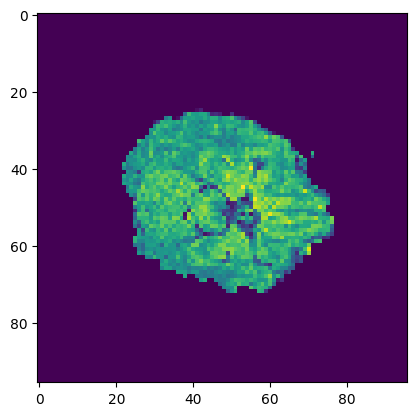

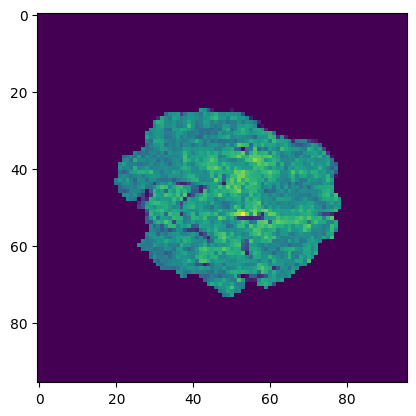

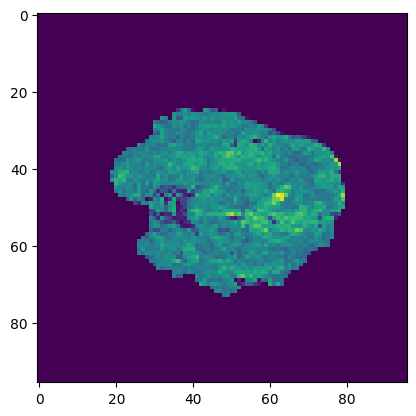

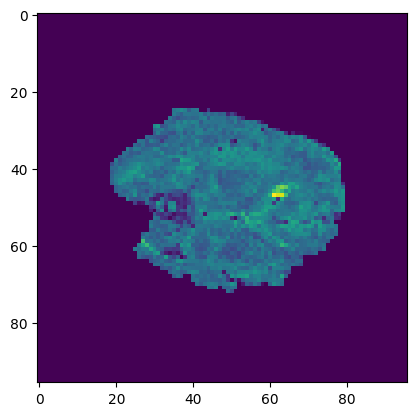

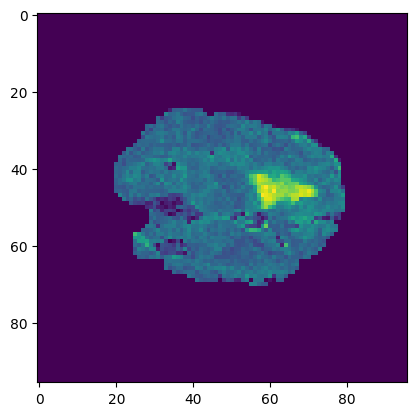

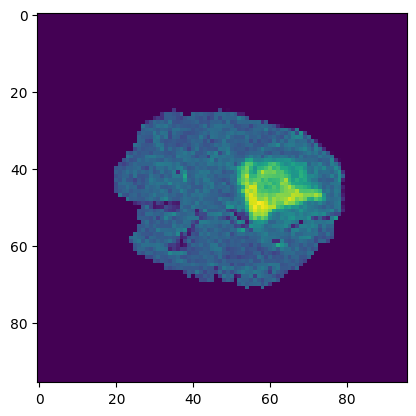

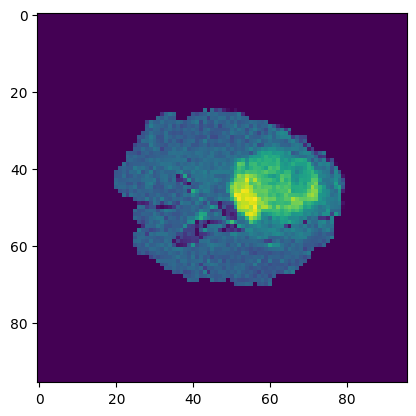

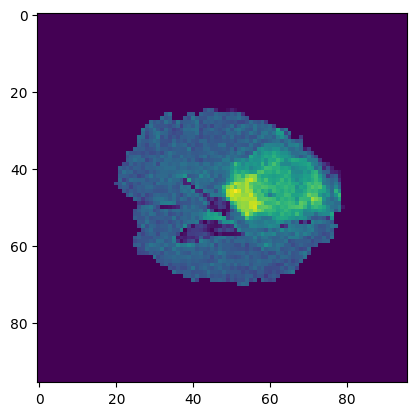

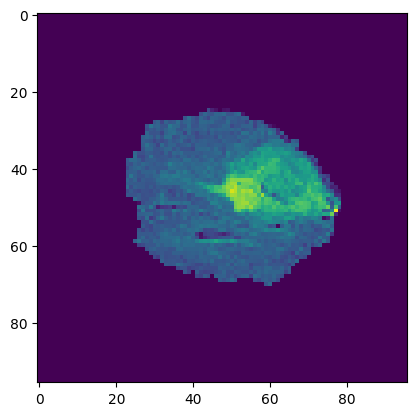

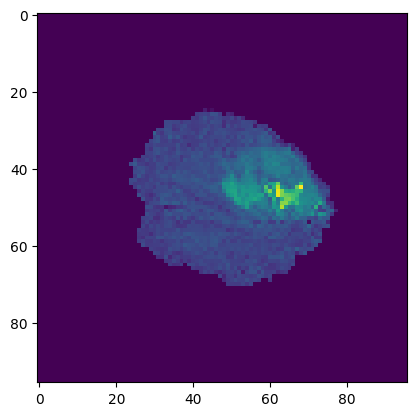

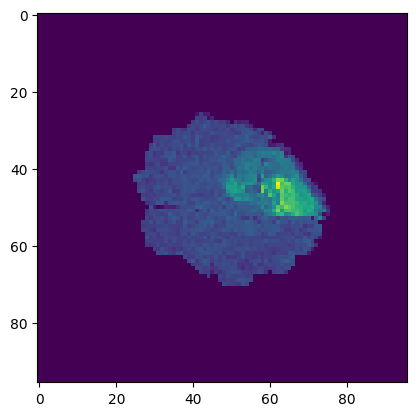

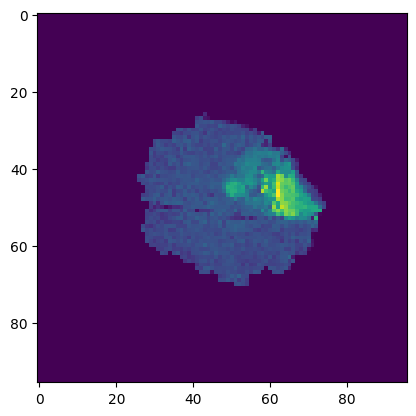

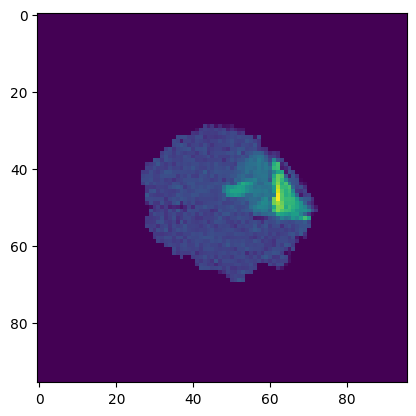

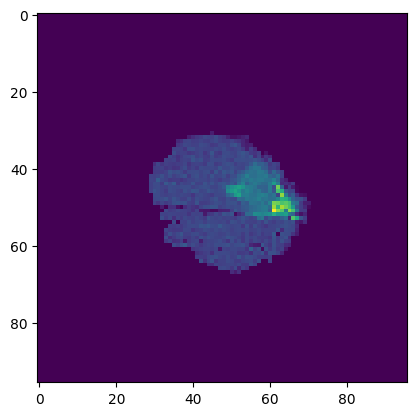

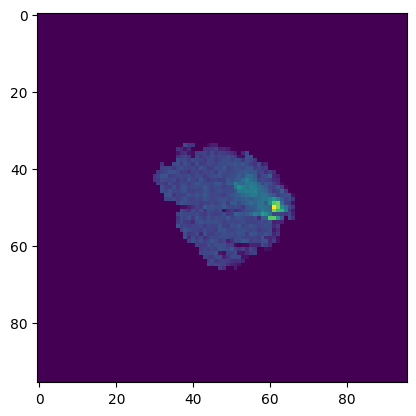

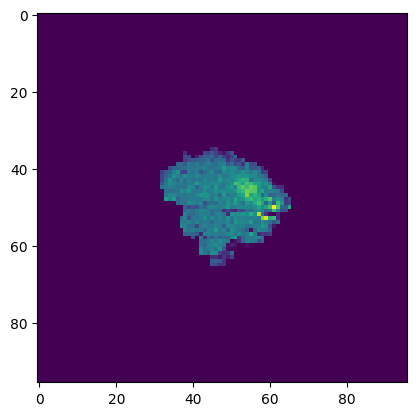

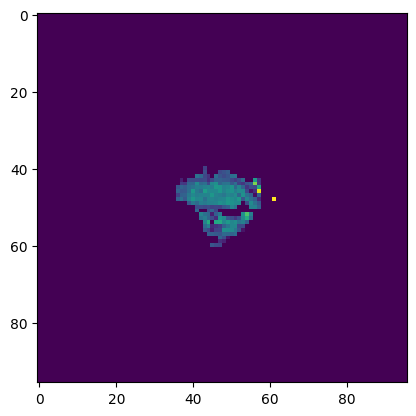

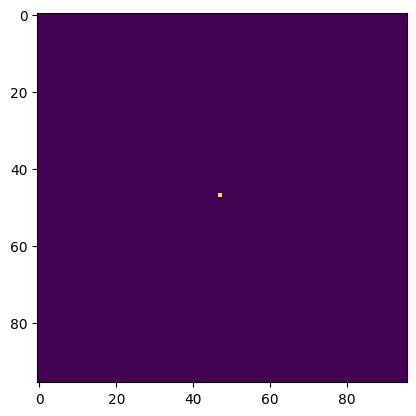

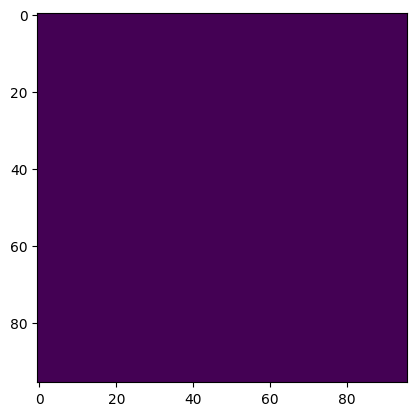

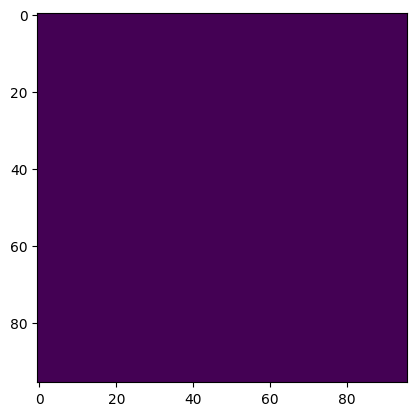

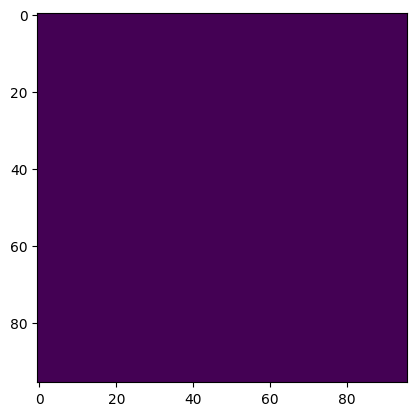

In [122]:
vimages, vlabels = next(iter(validationloader)) # every time you run this, it gives you new image and new label (since it also shuffles)

vimage = vimages[0].squeeze()
vimage = vimage.permute(1,2,0) # it should be (1,2,0) not (1,0,2) because the dimensions change when converting from numpy array to torch tensor

print(vimage.shape)
print(vlabels[0])

for i in range(vimage.shape[0]):
  brain_slice = vimage[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()

torch.Size([96, 32, 96])
torch.Size([32, 96, 96])


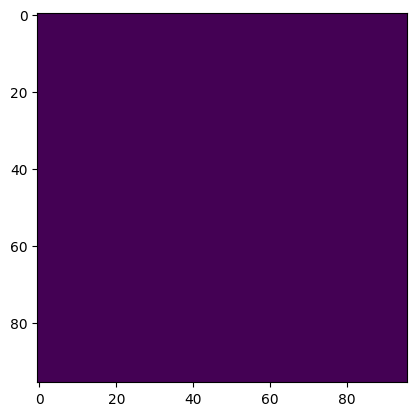

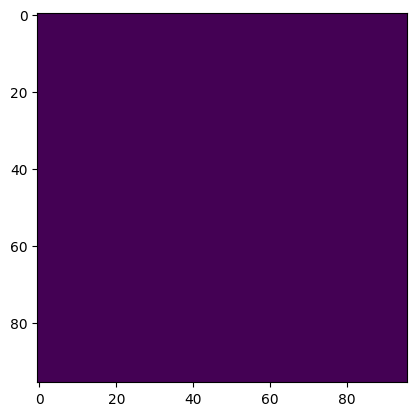

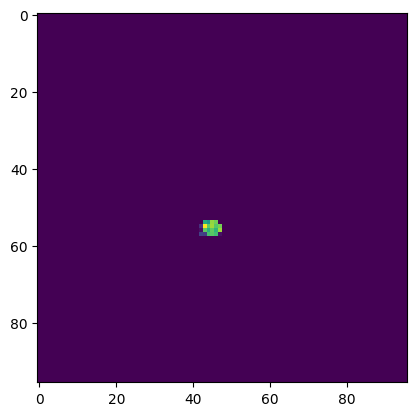

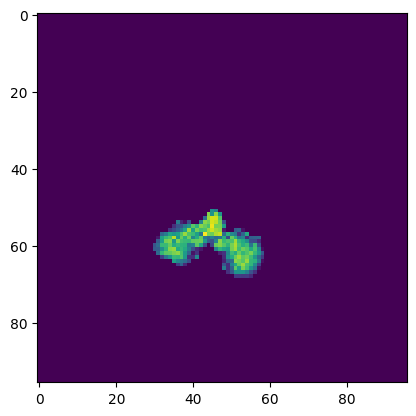

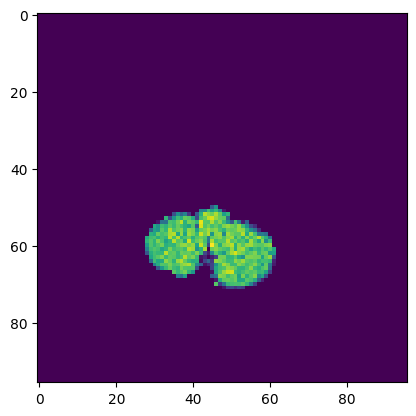

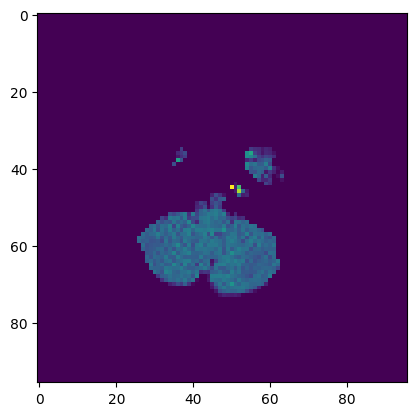

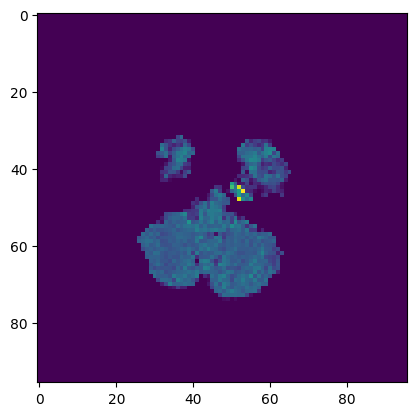

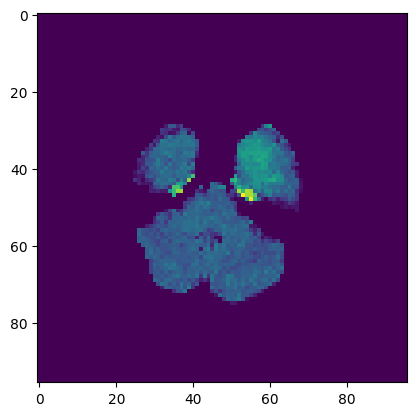

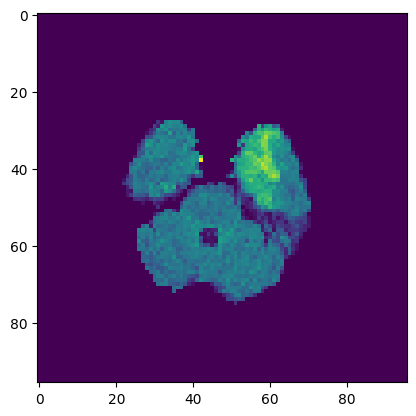

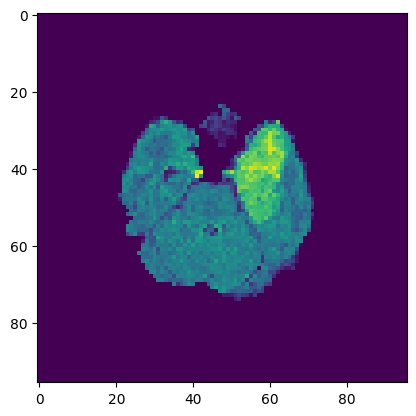

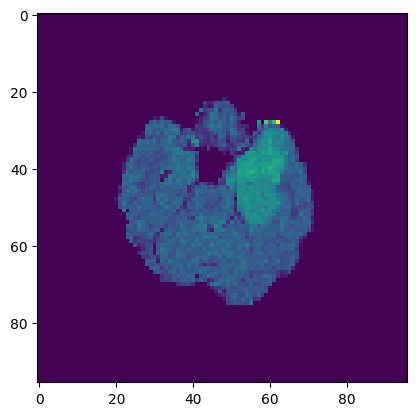

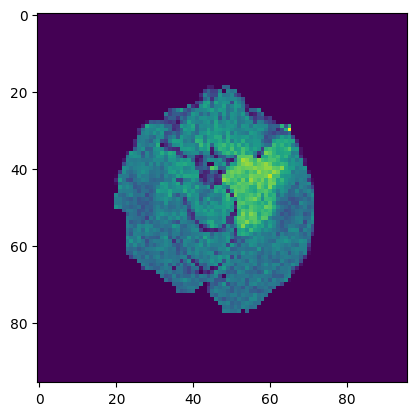

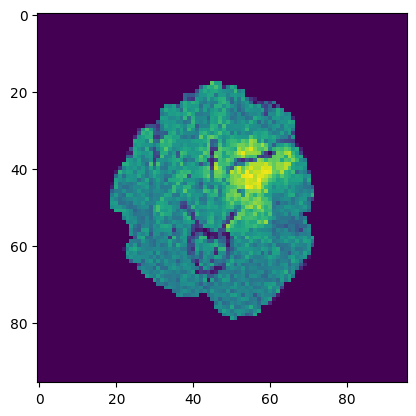

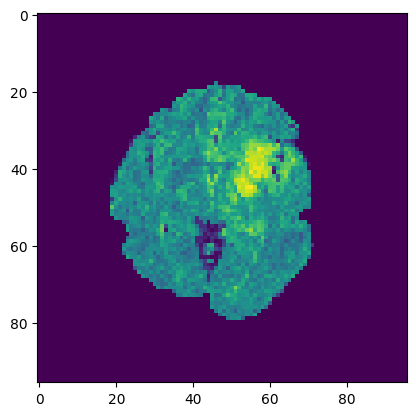

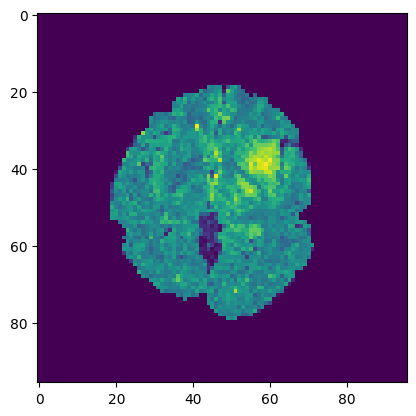

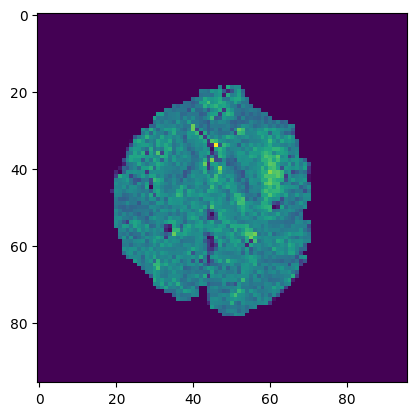

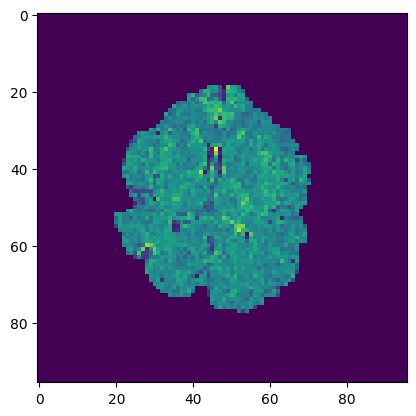

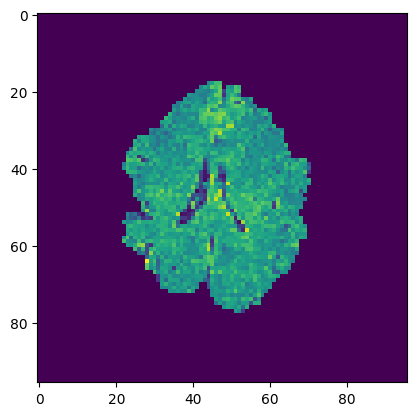

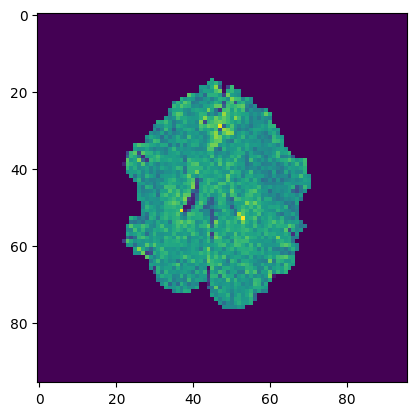

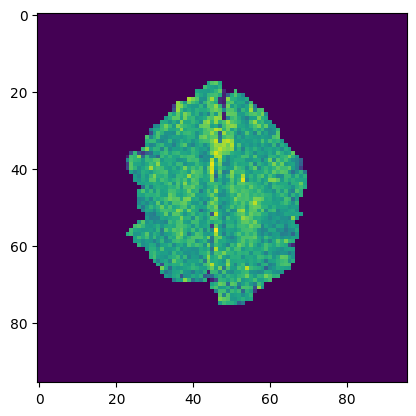

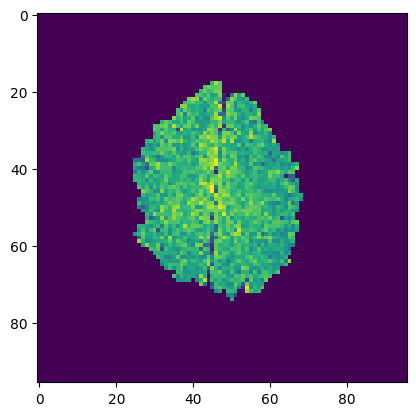

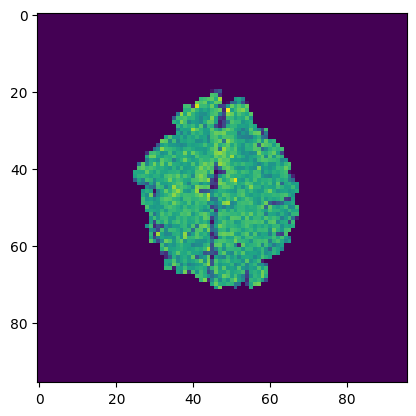

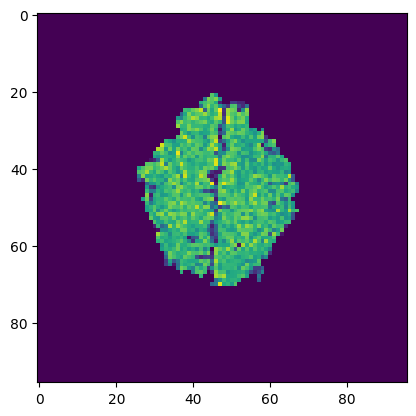

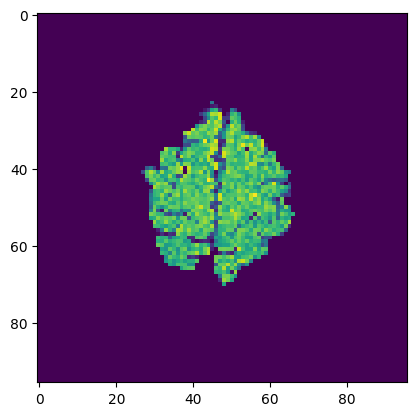

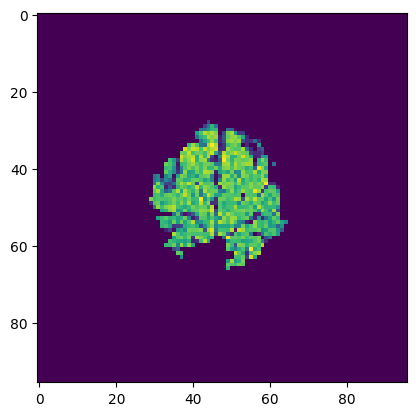

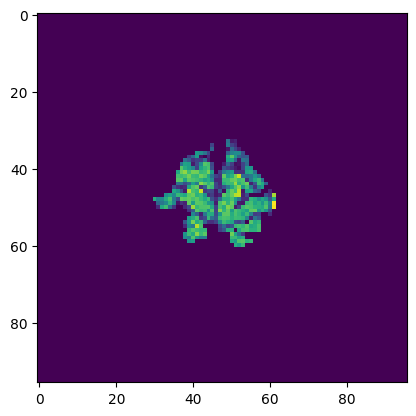

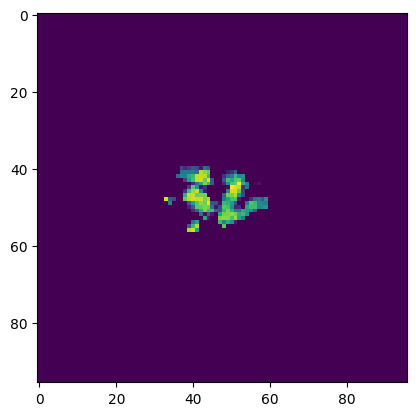

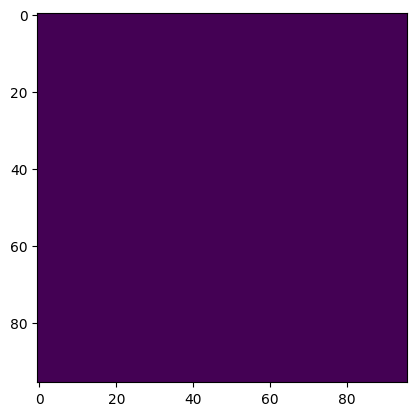

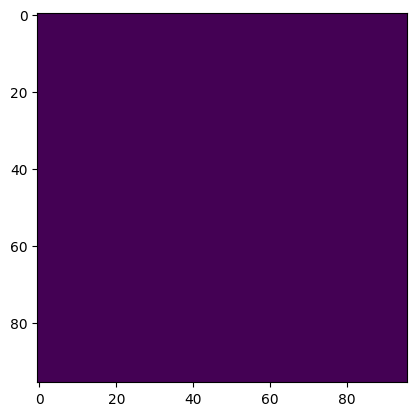

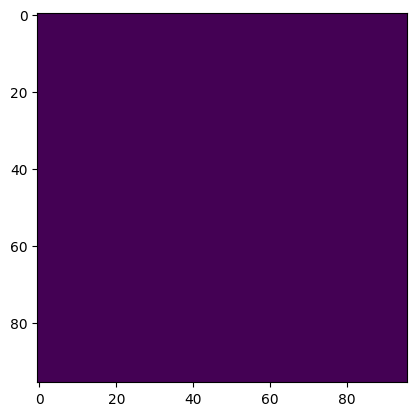

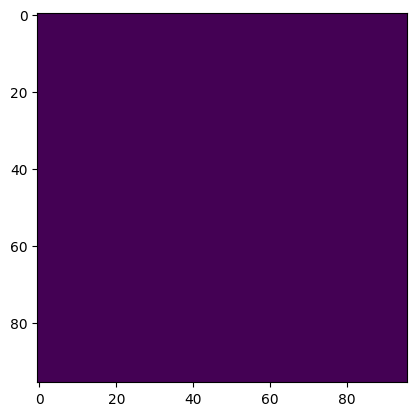

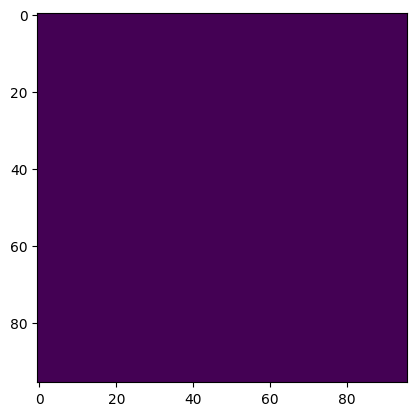

torch.Size([1, 32, 96, 96])


In [123]:
teimages, telabels = next(iter(testloader)) # every time you run this, it gives you new image and new label (since it also shuffles)

print(teimages[0].shape)
teimage = teimages[0].permute(1,2,0)
# teimage = teimage.squeeze()
# teimage = teimage.permute(1,2,0) # it should be (1,2,0) not (1,0,2) because the dimensions change when converting from numpy array to torch tensor

print(teimage.shape)
# print(telabel)

# it would just waste compute and we know it works so no need
for i in range(teimage.shape[0]):
  brain_slice = teimage[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()

teimage = teimage.unsqueeze(dim=0) # we need the one for flattening into fc layers
print(teimage.shape)

In [124]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv3d(in_channels=1, out_channels=12, kernel_size=3, stride=1, padding=0)
    self.conv2 = nn.Conv3d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=0)

    self.batchnorm1 = nn.BatchNorm3d(12)
    self.relu = nn.ReLU()
    self.resconv1 = nn.Conv3d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=0)

    self.maxpool = nn.MaxPool3d(kernel_size=2, stride=2)

    self.resconv2a = nn.Conv3d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=0)
    self.batchnorm2 = nn.BatchNorm3d(24)
    self.resconv2b = nn.Conv3d(in_channels=24, out_channels=24, kernel_size=3, stride=1, padding=0)

    self.resconv3a = nn.Conv3d(in_channels=24, out_channels=48, kernel_size=3, stride=1, padding=1)
    self.batchnorm3 = nn.BatchNorm3d(48)
    self.resconv3b = nn.Conv3d(in_channels=48, out_channels=48, kernel_size=3, stride=1, padding=1)

    self.resconv4a = nn.Conv3d(in_channels=48, out_channels=96, kernel_size=3, stride=1, padding=1)
    self.batchnorm4 = nn.BatchNorm3d(96)
    self.resconv4b = nn.Conv3d(in_channels=96, out_channels=96, kernel_size=3, stride=1, padding=1)

    # self.globalavgpooling = nn.AvgPool3d(kernel_size = 2, stride=2) # recheck dimensions
    self.flatten = nn.Flatten()

    # self.conv1x1x1a = nn.Conv3d(in_channels=96, out_channels=128, kernel_size=1, stride=1)
    # self.conv1x1x1b = nn.Conv3d(in_channels=128, out_channels=128, kernel_size=1, stride=1)

    # self.conv1x1x1b = nn.Conv3d(in_channels=128, out_channels=3, kernel_size=1, stride=1)
    self.fclayer = nn.Linear(19200, 3)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    # print(input.shape)  # 1, 32, 96, 96
    x1 = self.conv1(x) # 12, 30, 94, 94
    # print(x1.shape)
    x2 = self.relu(x1) # 12, 30, 94, 94
    # print(x2.shape)
    x3 = self.conv2(x2) # 12, 28, 92, 92
    # print(x3.shape)
    x4 = self.relu(x3) # 12, 28, 92, 92
    # print(x4.shape)
    # print()

    x5 = self.batchnorm1(x4) # 12, 28, 92, 92
    # print(x5.shape)
    x6 = self.relu(x5) # 12, 28, 92, 92
    # print(x6.shape)
    x7 = self.resconv1(x6) # 12, 26, 90, 90
    # print(x7.shape)
    x8 = self.batchnorm1(x7) # 12, 26, 90, 90
    # print(x8.shape)
    x9 = self.relu(x8) # 12, 26, 90, 90
    # print(x9.shape)
    x10 = self.resconv1(x9) # 12, 24, 88, 88
    # print(x10.shape)
    # print()

    # x9 = torch.sum(x2, x8) - doesn't work

    x11 = self.maxpool(x10) # 12, 12, 44, 44
    # print(x11.shape)
    # print()

    x12 = self.batchnorm1(x11) # 12, 12, 44, 44
    # print(x12.shape)
    x13 = self.relu(x12) # 12, 12, 44, 44
    # print(x13.shape)
    x14 = self.resconv2a(x13) # 24, 10, 42, 42
    # print(x14.shape)
    x15 = self.batchnorm2(x14)  # 24, 10, 42, 42
    # print(x15.shape)
    x16 = self.relu(x15)  # 24, 10, 42, 42
    # print(x16.shape)
    x17 = self.resconv2b(x16)  # 24, 8, 40, 40
    # print(x17.shape)
    # print()

    x18 = self.maxpool(x17) # 24, 4, 20, 20
    # print(x18.shape)
    # print()

    x19 = self.batchnorm2(x18) # 24, 4, 20, 20
    # print(x19.shape)
    x20 = self.relu(x19) # 24, 4, 20, 20
    # print(x20.shape)
    x21 = self.resconv3a(x20) # 48, 4, 20, 20
    # print(x21.shape)
    x22 = self.batchnorm3(x21) # 48, 4, 20, 20
    # print(x22.shape)
    x23 = self.relu(x22) # 48, 4, 20, 20
    # print(x23.shape)
    x24 = self.resconv3b(x23) # 48, 4, 20, 20
    # print(x24.shape)
    # print()

    x25 = self.maxpool(x24) # 48, 2, 10, 10
    # print(x25.shape)
    # print()

    x26 = self.batchnorm3(x25) # 48, 2, 10, 10
    # print(x26.shape)
    x27 = self.relu(x26) # 48, 2, 10, 10
    # print(x27.shape)
    x28 = self.resconv4a(x27) # 96, 2, 10, 10
    # print(x28.shape)
    x29 = self.batchnorm4(x28) # 96, 2, 10, 10
    # print(x29.shape)
    x30 = self.relu(x29) # 96, 2, 10, 10
    # print(x30.shape)
    x31 = self.resconv4b(x30) # 96, 2, 10, 10
    # print(x31.shape)
    # print()

    x32 = self.flatten(x31)
    # print(x32.shape)

    x33 = self.fclayer(x32)
    # print(x33.shape) # (1, 3)

    x34 = self.softmax(x33)
    # print(x34.shape)
    return x34

In [125]:
input = torch.randn(2, 1, 32, 96, 96)

model = Model()
print(model)

Model(
  (conv1): Conv3d(1, 12, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (conv2): Conv3d(12, 12, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (batchnorm1): BatchNorm3d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (resconv1): Conv3d(12, 12, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (maxpool): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (resconv2a): Conv3d(12, 24, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (batchnorm2): BatchNorm3d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (resconv2b): Conv3d(24, 24, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (resconv3a): Conv3d(24, 48, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (batchnorm3): BatchNorm3d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (resconv3b): Conv3d(48, 48, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (resconv4a): Conv3d(48, 96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padd

In [126]:
output = model(input)

### training, validation, and testing

In [127]:
from datetime import datetime
criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1) # optimizer

In [128]:
start = datetime.now()
print("fhiusdyufsdyfsdgfuysfguysdfghsuydfsd")
end = datetime.now()
print(end-start) # just to see that it works

fhiusdyufsdyfsdgfuysfguysdfghsuydfsd
0:00:00.001007


In [129]:
# uncomment when getting access to GPU

training_losses = [] # store all training losses from epochs
validation_losses = [] # store all validation losses from epochs
epochs = 55

for i in range(epochs): # for each epoch
  start = datetime.now()
  training_loss = 0 # changes per epoch
  validation_loss = 0 # changes per epoch
  optimizer.zero_grad()
  # count = 0
  for images, labels in trainloader: # one training epoch = about 13 mins?
    # print(count)
    # count += 1
    images = images.unsqueeze(dim=1)
    # print(images.shape)
    images = images.permute(0, 1, 3, 2, 4)
    # print(images.shape)
    outputs = model(images)
    # print("calculating loss")
    loss = criterion(outputs, labels)
    # print("backpropagation time")
    loss.backward()
    # print("optimization time")
    optimizer.step()
    training_loss += loss.item()
    # break
  print("\nvalidation time\n")
  for images, labels in validationloader:
    # print(images.shape)
    images = images.unsqueeze(dim=1)
    images = images.permute(0, 1, 3, 2, 4)
    # print(images.shape)
    outputs = model(images)
    # print("calculating loss")
    loss = criterion(outputs, labels)
    validation_loss += loss.item()
    # break
  
  print(training_loss)
  training_losses.append(training_loss/len(trainloader))

  # print(validation_loss)
  validation_losses.append(validation_loss/len(validationloader))
  
  end = datetime.now()

  print("Epoch {}/{}...".format(i+1, epochs),
        "Training Loss: {}...".format(training_losses[-1]),
        "Validation Loss: {}...".format(validation_losses[-1]),
        "Time: {}".format(end-start))

  # print(validation_losses[-1])
  # print(min(validation_losses))
  if (validation_losses[-1] <= min(validation_losses)):
    print("saving model")
    torch.save(model.state_dict(), "model.pth")


validation time

130.72347104549408
Epoch 1/55... Training Loss: 1.0893622587124507... Validation Loss: 1.0899061820445917... Time: 0:06:43.639645
saving model

validation time

130.97335702180862
Epoch 2/55... Training Loss: 1.0914446418484052... Validation Loss: 1.095034388395456... Time: 0:06:04.894083

validation time

130.97335702180862
Epoch 3/55... Training Loss: 1.0914446418484052... Validation Loss: 1.0899061805162675... Time: 0:06:06.218858
saving model

validation time

130.97335702180862
Epoch 4/55... Training Loss: 1.0914446418484052... Validation Loss: 1.095034380753835... Time: 0:06:09.577758

validation time

130.97335708141327
Epoch 5/55... Training Loss: 1.0914446423451105... Validation Loss: 1.0899061805162675... Time: 0:06:09.623704
saving model

validation time

131.17335611581802
Epoch 6/55... Training Loss: 1.0931113009651503... Validation Loss: 1.095034386867132... Time: 0:06:08.355138

validation time

130.57335656881332
Epoch 7/55... Training Loss: 1.08811130

KeyboardInterrupt: ignored

In [ ]:
print(training_losses)
print(validation_losses)

In [ ]:
# uncomment when getting access to GPU

# show losses in graph
plt.plot(training_losses, label="Training loss")
plt.plot(validation_losses, label="Validation loss")

In [ ]:
# uncomment when getting access to GPU

# get the saved parameters for the novel grading model
saved_model = torch.load("model.pth")
model.load_state_dict(saved_model)

In [ ]:
# this is the actual code i need to run:

testing_loss = 0

total_correct = [0, 0, 0]
total_images = [0, 0, 0]

for images, labels in testloader:
  images = images.unsqueeze(dim=1)
  # print(images.shape)
  images = images.permute(0, 1, 3, 2, 4)
  # print(images.shape)
  outputs = model(images)
  loss = criterion(outputs, labels)
  testing_loss += loss.item()

  outputs = outputs.squeeze()
  # print(outputs)
  top_value, top_class = torch.topk(outputs, 1) # getting the k (1) largest elements of the given input tensor along a given dimension
  # returns the top value and the index at which it is at
  
  print(top_class)
  print(labels)
  
  equals = top_class == labels.view(*top_class.shape) # checking if the predicted top classes are the same as the labels
  print(equals)
  equals = equals.int()
  print()


  for i in range(len(images)): # adding to correct and total based on the class
    print(labels[i])
    print(equals[i])
    total_images[labels[i]] += 1
    total_correct[labels[i]] += equals[i].item()

In [ ]:
# testing_loss = 0

# total_correct = [0, 0, 0]
# total_images = [0, 0, 0]

# for images, labels in testloader:
#   images = images[:2]
#   labels = labels[:2]
#   images = images.unsqueeze(dim=1)
#   images = images.permute(0, 1, 3, 2, 4)
#   print(images.shape)
#   outputs = model(images)
#   loss = criterion(outputs, labels)
#   testing_loss += loss.item()

#   print(outputs.shape)
#   print(outputs)
#   # outputs = outputs.squeeze()
#   # print(outputs.shape)
#   top_value, top_class = torch.topk(outputs, 1)
#   print(top_class)
#   print(top_value)
#   print(labels)
#   labels = labels.unsqueeze(dim=1)
#   print(labels)
#   print()
#   print(top_value.shape)
#   print(top_class.shape)
#   print(labels.shape)
  
#   equals = top_class == labels.view(*top_class.shape)

#   equals = equals.int()

#   for i in range(len(images)):
#     print(labels[i])
#     print(equals[i])
#     total_images[labels[i]] += 1
#     total_correct[labels[i]] += equals[i].item()

In [ ]:
print(total_correct)
print(total_images)

In [ ]:
# there will be a division by zero error for now because the number of total images for grade 3 tumours that i took is 0
print("The accuracy for grade 2 tumours is {}\n".format(total_correct[0]/total_images[0]) + 
      "The accuracy for grade 3 tumours is {}\n".format(total_correct[1]/total_images[1]) +
      "The accuracy for grade 4 tumours is {}\n".format(total_correct[2]/total_images[2]))

# print("The accuracy for grade 2 tumours is {}\n".format(total_correct[0]/total_images[0]) + 
#       "The accuracy for grade 4 tumours is {}\n".format(total_correct[2]/total_images[2]))